In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Data Import :

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/Solar-Energy-Prediction-ML-Project-NTNU/data

/content/drive/MyDrive/Solar-Energy-Prediction-ML-Project-NTNU/data


In [4]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
train_a = pd.read_parquet('A/train_targets.parquet')

X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')

X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

In [5]:
X_train_estimated_a.set_index('date_forecast', inplace = True)
X_train_observed_a.set_index('date_forecast', inplace = True)
X_test_estimated_a.set_index('date_forecast', inplace = True)

X_train_estimated_b.set_index('date_forecast', inplace = True)
X_train_observed_b.set_index('date_forecast', inplace = True)
X_test_estimated_b.set_index('date_forecast', inplace = True)

X_train_estimated_c.set_index('date_forecast', inplace = True)
X_train_observed_c.set_index('date_forecast', inplace = True)
X_test_estimated_c.set_index('date_forecast', inplace = True)


X_train_estimated_a.drop('date_calc', axis=1, inplace=True)
X_test_estimated_a.drop('date_calc', axis=1, inplace=True)

X_train_estimated_b.drop('date_calc', axis=1, inplace=True)
X_test_estimated_b.drop('date_calc', axis=1, inplace=True)

X_train_estimated_c.drop('date_calc', axis=1, inplace=True)
X_test_estimated_c.drop('date_calc', axis=1, inplace=True)


train_a.set_index('time', inplace = True)
train_b.set_index('time', inplace = True)
train_c.set_index('time', inplace = True)

train_a.dropna(inplace = True)
train_b.dropna(inplace = True)
train_c.dropna(inplace = True)

In [6]:
X_train_estimated_a = X_train_estimated_a.loc[X_train_estimated_a.index[::4]]
X_train_observed_a = X_train_observed_a.loc[X_train_observed_a.index[::4]]
X_test_estimated_a = X_test_estimated_a.loc[X_test_estimated_a.index[::4]]


X_train_estimated_b = X_train_estimated_b.loc[X_train_estimated_b.index[::4]]
X_train_observed_b = X_train_observed_b.loc[X_train_observed_b.index[::4]]
X_test_estimated_b = X_test_estimated_b.loc[X_test_estimated_b.index[::4]]

X_train_estimated_c = X_train_estimated_c.loc[X_train_estimated_c.index[::4]]
X_train_observed_c = X_train_observed_c.loc[X_train_observed_c.index[::4]]
X_test_estimated_c = X_test_estimated_c.loc[X_test_estimated_c.index[::4]]

In [7]:
#We match the sizes of X and Y
#We keep the measurements from every hour only
intersection_index_estimated_a = X_train_estimated_a.index.intersection(train_a.index)
intersection_index_estimated_b = X_train_estimated_b.index.intersection(train_b.index)
intersection_index_estimated_c = X_train_estimated_c.index.intersection(train_c.index)

intersection_index_observed_a = X_train_observed_a.index.intersection(train_a.index)
intersection_index_observed_b = X_train_observed_b.index.intersection(train_b.index)
intersection_index_observed_c = X_train_observed_c.index.intersection(train_c.index)


X_train_estimated_a = X_train_estimated_a.loc[intersection_index_estimated_a]
X_train_estimated_b = X_train_estimated_b.loc[intersection_index_estimated_b]
X_train_estimated_c = X_train_estimated_c.loc[intersection_index_estimated_c]


X_train_observed_a = X_train_observed_a.loc[intersection_index_observed_a]
X_train_observed_b = X_train_observed_b.loc[intersection_index_observed_b]
X_train_observed_c = X_train_observed_c.loc[intersection_index_observed_c]


train_a_estimated = train_a.loc[intersection_index_estimated_a]
train_b_estimated = train_b.loc[intersection_index_estimated_b]
train_c_estimated = train_c.loc[intersection_index_estimated_c]

train_a_observed = train_a.loc[intersection_index_observed_a]
train_b_observed = train_b.loc[intersection_index_observed_b]
train_c_observed = train_c.loc[intersection_index_observed_c]

In [8]:
#We change the Time that is a string, to a variable in seconds
timestamp_s_observed_a = X_train_observed_a.index.map(pd.Timestamp.timestamp)
timestamp_s_observed_b = X_train_observed_b.index.map(pd.Timestamp.timestamp)
timestamp_s_observed_c = X_train_observed_c.index.map(pd.Timestamp.timestamp)

timestamp_s_estimated_a = X_train_estimated_a.index.map(pd.Timestamp.timestamp)
timestamp_s_estimated_b = X_train_estimated_b.index.map(pd.Timestamp.timestamp)
timestamp_s_estimated_c = X_train_estimated_c.index.map(pd.Timestamp.timestamp)

timestamp_s_test_a = X_test_estimated_a.index.map(pd.Timestamp.timestamp)
timestamp_s_test_b = X_test_estimated_b.index.map(pd.Timestamp.timestamp)
timestamp_s_test_c = X_test_estimated_c.index.map(pd.Timestamp.timestamp)

#Then, we incorporate the periodicity
day = 24*60*60
year = (365.2425)*day

X_train_observed_a['Day sin'] = np.sin(timestamp_s_observed_a * (2 * np.pi / day))
X_train_observed_a['Day cos'] = np.cos(timestamp_s_observed_a * (2 * np.pi / day))
X_train_observed_a['Year sin'] = np.sin(timestamp_s_observed_a * (2 * np.pi / year))
X_train_observed_a['Year cos'] = np.cos(timestamp_s_observed_a * (2 * np.pi / year))

X_train_observed_b['Day sin'] = np.sin(timestamp_s_observed_b * (2 * np.pi / day))
X_train_observed_b['Day cos'] = np.cos(timestamp_s_observed_b * (2 * np.pi / day))
X_train_observed_b['Year sin'] = np.sin(timestamp_s_observed_b * (2 * np.pi / year))
X_train_observed_b['Year cos'] = np.cos(timestamp_s_observed_b * (2 * np.pi / year))

X_train_observed_c['Day sin'] = np.sin(timestamp_s_observed_c * (2 * np.pi / day))
X_train_observed_c['Day cos'] = np.cos(timestamp_s_observed_c * (2 * np.pi / day))
X_train_observed_c['Year sin'] = np.sin(timestamp_s_observed_c * (2 * np.pi / year))
X_train_observed_c['Year cos'] = np.cos(timestamp_s_observed_c * (2 * np.pi / year))


X_train_estimated_a['Day sin'] = np.sin(timestamp_s_estimated_a * (2 * np.pi / day))
X_train_estimated_a['Day cos'] = np.cos(timestamp_s_estimated_a * (2 * np.pi / day))
X_train_estimated_a['Year sin'] = np.sin(timestamp_s_estimated_a * (2 * np.pi / year))
X_train_estimated_a['Year cos'] = np.cos(timestamp_s_estimated_a * (2 * np.pi / year))

X_train_estimated_b['Day sin'] = np.sin(timestamp_s_estimated_b * (2 * np.pi / day))
X_train_estimated_b['Day cos'] = np.cos(timestamp_s_estimated_b * (2 * np.pi / day))
X_train_estimated_b['Year sin'] = np.sin(timestamp_s_estimated_b * (2 * np.pi / year))
X_train_estimated_b['Year cos'] = np.cos(timestamp_s_estimated_b * (2 * np.pi / year))

X_train_estimated_c['Day sin'] = np.sin(timestamp_s_estimated_c * (2 * np.pi / day))
X_train_estimated_c['Day cos'] = np.cos(timestamp_s_estimated_c * (2 * np.pi / day))
X_train_estimated_c['Year sin'] = np.sin(timestamp_s_estimated_c * (2 * np.pi / year))
X_train_estimated_c['Year cos'] = np.cos(timestamp_s_estimated_c * (2 * np.pi / year))


X_test_estimated_a['Day sin'] = np.sin(timestamp_s_test_a * (2 * np.pi / day))
X_test_estimated_a['Day cos'] = np.cos(timestamp_s_test_a * (2 * np.pi / day))
X_test_estimated_a['Year sin'] = np.sin(timestamp_s_test_a * (2 * np.pi / year))
X_test_estimated_a['Year cos'] = np.cos(timestamp_s_test_a * (2 * np.pi / year))

X_test_estimated_b['Day sin'] = np.sin(timestamp_s_test_b * (2 * np.pi / day))
X_test_estimated_b['Day cos'] = np.cos(timestamp_s_test_b * (2 * np.pi / day))
X_test_estimated_b['Year sin'] = np.sin(timestamp_s_test_b * (2 * np.pi / year))
X_test_estimated_b['Year cos'] = np.cos(timestamp_s_test_b * (2 * np.pi / year))

X_test_estimated_c['Day sin'] = np.sin(timestamp_s_test_c * (2 * np.pi / day))
X_test_estimated_c['Day cos'] = np.cos(timestamp_s_test_c * (2 * np.pi / day))
X_test_estimated_c['Year sin'] = np.sin(timestamp_s_test_c * (2 * np.pi / year))
X_test_estimated_c['Year cos'] = np.cos(timestamp_s_test_c * (2 * np.pi / year))


In [9]:
#We change the sun_azimuth variable, because an angle in degree is not really comprehensible for the machine (0 and 360 should be the same)
#therefore, we introduce the sinus and cosinus features
X_train_observed_a['sun_azimuth_cos:'] = np.cos(X_train_observed_a['sun_azimuth:d'])
X_train_observed_a['sun_azimuth_sin:'] = np.sin(X_train_observed_a['sun_azimuth:d'])
X_train_estimated_a['sun_azimuth_cos:'] = np.cos(X_train_estimated_a['sun_azimuth:d'])
X_train_estimated_a['sun_azimuth_sin:'] = np.sin(X_train_estimated_a['sun_azimuth:d'])
X_test_estimated_a['sun_azimuth_cos:'] = np.cos(X_test_estimated_a['sun_azimuth:d'])
X_test_estimated_a['sun_azimuth_sin:'] = np.sin(X_test_estimated_a['sun_azimuth:d'])
X_train_observed_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)


X_train_observed_b['sun_azimuth_cos:'] = np.cos(X_train_observed_b['sun_azimuth:d'])
X_train_observed_b['sun_azimuth_sin:'] = np.sin(X_train_observed_b['sun_azimuth:d'])
X_train_estimated_b['sun_azimuth_cos:'] = np.cos(X_train_estimated_b['sun_azimuth:d'])
X_train_estimated_b['sun_azimuth_sin:'] = np.sin(X_train_estimated_b['sun_azimuth:d'])
X_test_estimated_b['sun_azimuth_cos:'] = np.cos(X_test_estimated_b['sun_azimuth:d'])
X_test_estimated_b['sun_azimuth_sin:'] = np.sin(X_test_estimated_b['sun_azimuth:d'])
X_train_observed_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)

X_train_observed_c['sun_azimuth_cos:'] = np.cos(X_train_observed_c['sun_azimuth:d'])
X_train_observed_c['sun_azimuth_sin:'] = np.sin(X_train_observed_c['sun_azimuth:d'])
X_train_estimated_c['sun_azimuth_cos:'] = np.cos(X_train_estimated_c['sun_azimuth:d'])
X_train_estimated_c['sun_azimuth_sin:'] = np.sin(X_train_estimated_c['sun_azimuth:d'])
X_test_estimated_c['sun_azimuth_cos:'] = np.cos(X_test_estimated_c['sun_azimuth:d'])
X_test_estimated_c['sun_azimuth_sin:'] = np.sin(X_test_estimated_c['sun_azimuth:d'])
X_train_observed_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)

In [ ]:
X_train_observed_a.columns

In [11]:
to_square = [ 'clear_sky_rad:W',
       'cloud_base_agl:m',
 'dew_point_2m:K',
       'diffuse_rad:W',
 'direct_rad:W',
       'effective_cloud_cover:p',
       'fresh_snow_6h:cm',
       'msl_pressure:hPa',
 'precip_5min:mm',
 'pressure_50m:hPa',
       'rain_water:kgm2',
 'sfc_pressure:hPa',
 't_1000hPa:K',
 'wind_speed_10m:ms']

In [12]:
for feature in to_square:
    X_train_observed_a[f'{feature}^2'] = X_train_observed_a[feature].apply(lambda x: x**2)
    X_train_observed_b[f'{feature}^2'] = X_train_observed_b[feature].apply(lambda x: x**2)
    X_train_observed_c[f'{feature}^2'] = X_train_observed_c[feature].apply(lambda x: x**2)

    X_train_estimated_a[f'{feature}^2'] = X_train_estimated_a[feature].apply(lambda x: x**2)
    X_train_estimated_b[f'{feature}^2'] = X_train_estimated_b[feature].apply(lambda x: x**2)
    X_train_estimated_c[f'{feature}^2'] = X_train_estimated_c[feature].apply(lambda x: x**2)

    X_test_estimated_a[f'{feature}^2'] = X_test_estimated_a[feature].apply(lambda x: x**2)
    X_test_estimated_b[f'{feature}^2'] = X_test_estimated_b[feature].apply(lambda x: x**2)
    X_test_estimated_c[f'{feature}^2'] = X_test_estimated_c[feature].apply(lambda x: x**2)

In [13]:
X_train_observed_a = pd.concat([X_train_observed_a, train_a_observed], axis = 1)
X_train_estimated_a = pd.concat([X_train_estimated_a, train_a_estimated], axis = 1)

X_train_observed_b = pd.concat([X_train_observed_b, train_b_observed], axis = 1)
X_train_estimated_b = pd.concat([X_train_estimated_b, train_b_estimated], axis = 1)

X_train_observed_c = pd.concat([X_train_observed_c, train_c_observed], axis = 1)
X_train_estimated_c = pd.concat([X_train_estimated_c, train_c_estimated], axis = 1)

In [14]:
X_train_a = pd.concat([X_train_observed_a, X_train_estimated_a], axis = 0)
X_train_b = pd.concat([X_train_observed_b, X_train_estimated_b], axis = 0)
X_train_c = pd.concat([X_train_observed_c, X_train_estimated_c], axis = 0)

In [27]:
def pos(x):
    if  x < 0:
        return 0
    else:
        return x

## H2O

In [15]:
pip install -q h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [16]:
# Import and init h2o lib. Running on java
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbv_e56zi
  JVM stdout: /tmp/tmpbv_e56zi/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbv_e56zi/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.4
H2O_cluster_version_age:    10 days
H2O_cluster_name:           H2O_from_python_unknownUser_rnyp5p
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

# Prédiction pour A

In [ ]:
# Reading csv to h2o dataframe file
df_train_a = h2o.H2OFrame(X_train_a)
df_test_a = h2o.H2OFrame(X_test_estimated_a)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Setting features as factor
df_train_a['dew_or_rime:idx'] = df_train_a['dew_or_rime:idx'].asfactor()
df_train_a['is_day:idx'] = df_train_a['is_day:idx'].asfactor()
df_train_a['is_in_shadow:idx'] = df_train_a['is_in_shadow:idx'].asfactor()
df_train_a['precip_type_5min:idx'] = df_train_a['precip_type_5min:idx'].asfactor()
df_train_a['snow_drift:idx'] = df_train_a['snow_drift:idx'].asfactor()

In [ ]:
df_test_a['dew_or_rime:idx'] = df_test_a['dew_or_rime:idx'].asfactor()
df_test_a['is_day:idx'] = df_test_a['is_day:idx'].asfactor()
df_test_a['is_in_shadow:idx'] = df_test_a['is_in_shadow:idx'].asfactor()
df_test_a['precip_type_5min:idx'] = df_test_a['precip_type_5min:idx'].asfactor()
df_test_a['snow_drift:idx'] = df_test_a['snow_drift:idx'].asfactor()

In [ ]:
# Removing labels from train set
y = "pv_measurement"
x = df_train_a.columns
x.remove(y)

In [ ]:
h2o.estimators.xgboost.H2OXGBoostEstimator.available()

True

In [ ]:
# Running fit/training on train set with cross validation n=5
aml = H2OAutoML(max_models = 10, seed = 1, sort_metric='MAE')
aml.train(x = x, y = y, training_frame = df_train_a)

AutoML progress: |
17:37:04.377: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██
17:37:48.867: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

████████
17:38:03.549: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

███████
17:40:10.217: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██
17:40:31.521: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

███████████████████
17:45:08.318: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

███
17:46:52.39: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

█████
17:48:58.601: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

████
17:51:25.828: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

█
17:51:57.513: _train param, Dropping bad and constant columns: [snow_drift:i

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20231013_173703


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  6/10
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      0/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 33592.421545055025
RMSE: 183.28235470185072
MAE: 87.69145397327685
RMSLE: NaN
Mean Residual Deviance: 33592.421545055025
R^2: 0.9756010221476794
Null degrees of freedom: 10047
Residual degrees of freedom: 10041
Null deviance: 13834157988.202923
Residual deviance: 337536651.6847129
AIC: 133251.80515287066

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 154888.7941292392
RMSE: 393.55913676249367
MAE: 177.25734506021507
RMSLE: NaN
Mean Residual Deviance: 154888.7941292392
R^2: 0.8861109007903263
Null degrees of freedom: 34060
Residual degrees of freedom: 34054
Null deviance: 46328024763.76841
Residual deviance: 5275667216.836016
AIC: 503721.64014247246

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     177.77       6.28709      171.934       180.043       171.484       178.766       186.624
mean_residual_deviance  154910       10187.6      147073        158491        143625        155869        169492
mse                     154910       10187.6      147073        158491        143625        155869        169492
null_deviance           9.2656e+09   3.6465e+08   9.28727e+09   8.787e+09     9.21084e+09   9.23126e+09   9.81165e+09
r2                      0.886077     0.00600264   0.892203      0.878267      0.891856      0.885415      0.882646
residual_deviance       1.05489e+09  6.26863e+07  1.00083e+09   1.0695e+09    9.96037e+08   1.05773e+09   1.15034e+09
rmse                    393.417      12.8917      383.501       398.11        378.978       394.802       411.694
rmsle                   nan          0            nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
lb = aml.leaderboard

In [ ]:
# Showing best perforimg models
lb.head()

model_id                                                     mae     rmse     mse       rmsle    mean_residual_deviance
-------------------------------------------------------  -------  -------  ------  ----------  ------------------------
StackedEnsemble_AllModels_1_AutoML_1_20231013_173703     177.257  393.559  154889  nan                           154889
GBM_4_AutoML_1_20231013_173703                           179.696  401.747  161401  nan                           161401
StackedEnsemble_BestOfFamily_1_AutoML_1_20231013_173703  180.169  397.654  158128  nan                           158128
GBM_3_AutoML_1_20231013_173703                           182.596  404.833  163890  nan                           163890
GBM_2_AutoML_1_20231013_173703                           184.528  406.337  165109  nan                           165109
DRF_1_AutoML_1_20231013_173703                           188.233  419.496  175977    0.636551                    175977
XRT_1_AutoML_1_20231013_173703                           188.399  419.115  175658    0.632963                    175658
GBM_1_AutoML_1_20231013_173703                           189.167  418.004  174727  nan                           174727
XGBoost_3_AutoML_1_20231013_173703                       196.179  416.979  173871  nan                           173871
XGBoost_2_AutoML_1_20231013_173703                       197.724  436.083  190169  nan                           190169
[10 rows x 6 columns]

In [ ]:
df_pred_a = aml.predict(df_test_a)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
df_pred_a = h2o.as_list(df_pred_a)

In [ ]:
df_pred_a['time'] = X_test_estimated_a.index
df_pred_a['location'] = ['A' for i in df_pred_a.index]
df_pred_a.reset_index(inplace = True)
df_pred_a = df_pred_a[['index', 'time', 'predict', 'location']]
df_pred_a.columns = ['id', 'time', 'prediction', 'location']
df_pred_a

id                time  prediction location
0      0 2023-05-01 00:00:00   -4.662141        A
1      1 2023-05-01 01:00:00   -5.244506        A
2      2 2023-05-01 02:00:00   -4.191486        A
3      3 2023-05-01 03:00:00   31.445436        A
4      4 2023-05-01 04:00:00  368.841479        A
..   ...                 ...         ...      ...
715  715 2023-07-03 19:00:00  188.161317        A
716  716 2023-07-03 20:00:00   70.432411        A
717  717 2023-07-03 21:00:00    5.081728        A
718  718 2023-07-03 22:00:00    4.715866        A
719  719 2023-07-03 23:00:00    6.181081        A

[720 rows x 4 columns]

In [ ]:
df_pred_a['prediction'] = df_pred_a['prediction'].apply(lambda x: pos(x))

<Axes: >

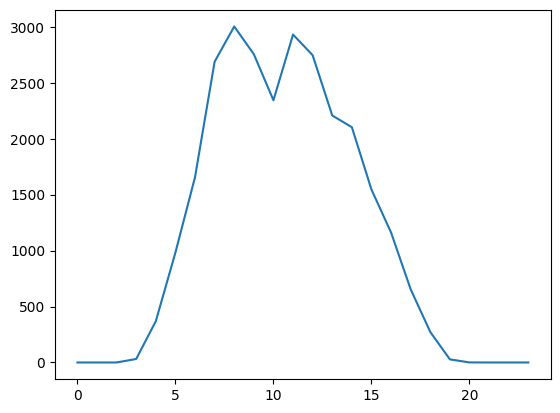

In [ ]:
df_pred_a.prediction[0:24].plot()

In [ ]:
df_pred_a_to_plot = df_pred_a['prediction']
df_pred_a_to_plot = pd.DataFrame(df_pred_a_to_plot)
df_pred_a_to_plot.set_index(df_pred_a['time'], inplace = True)

<Axes: xlabel='time'>

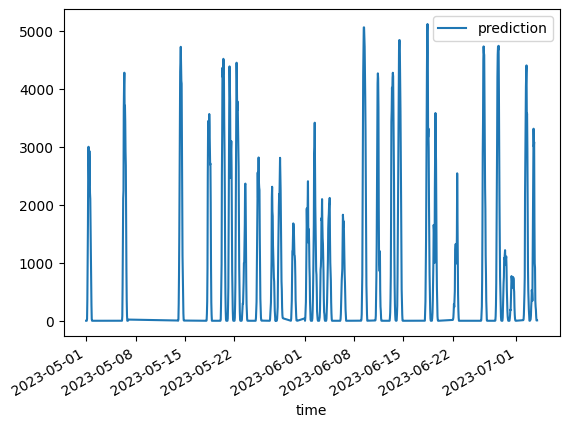

In [ ]:
df_pred_a_to_plot.plot()

In [ ]:
df_pred_a

id                time  prediction location
0      0 2023-05-01 00:00:00    0.000000        A
1      1 2023-05-01 01:00:00    0.000000        A
2      2 2023-05-01 02:00:00    0.000000        A
3      3 2023-05-01 03:00:00   31.445436        A
4      4 2023-05-01 04:00:00  368.841479        A
..   ...                 ...         ...      ...
715  715 2023-07-03 19:00:00  188.161317        A
716  716 2023-07-03 20:00:00   70.432411        A
717  717 2023-07-03 21:00:00    5.081728        A
718  718 2023-07-03 22:00:00    4.715866        A
719  719 2023-07-03 23:00:00    6.181081        A

[720 rows x 4 columns]

# Prediction pour B

In [ ]:
# Reading csv to h2o dataframe file
df_train_b = h2o.H2OFrame(X_train_b)
df_test_b = h2o.H2OFrame(X_test_estimated_b)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Setting features as factor
df_train_b['dew_or_rime:idx'] = df_train_b['dew_or_rime:idx'].asfactor()
df_train_b['is_day:idx'] = df_train_b['is_day:idx'].asfactor()
df_train_b['is_in_shadow:idx'] = df_train_b['is_in_shadow:idx'].asfactor()
df_train_b['precip_type_5min:idx'] = df_train_b['precip_type_5min:idx'].asfactor()
df_train_b['snow_drift:idx'] = df_train_b['snow_drift:idx'].asfactor()

In [ ]:
df_test_b['dew_or_rime:idx'] = df_test_b['dew_or_rime:idx'].asfactor()
df_test_b['is_day:idx'] = df_test_b['is_day:idx'].asfactor()
df_test_b['is_in_shadow:idx'] = df_test_b['is_in_shadow:idx'].asfactor()
df_test_b['precip_type_5min:idx'] = df_test_b['precip_type_5min:idx'].asfactor()
df_test_b['snow_drift:idx'] = df_test_b['snow_drift:idx'].asfactor()

In [ ]:
# Removing labels from train set
y = "pv_measurement"
x = df_train_b.columns
x.remove(y)

In [ ]:
# Running fit/training on train set with cross validation n=5
aml = H2OAutoML(max_models = 10, seed = 1, sort_metric='MAE')
aml.train(x = x, y = y, training_frame = df_train_b)

AutoML progress: |
19:31:53.984: _train param, Dropping bad and constant columns: [elevation:m]

██
19:34:42.822: _train param, Dropping bad and constant columns: [elevation:m]

███████████
19:34:54.599: _train param, Dropping bad and constant columns: [elevation:m]

██████████████████████
19:39:39.321: _train param, Dropping bad and constant columns: [elevation:m]

█████████
19:41:52.621: _train param, Dropping bad and constant columns: [elevation:m]

██████████
19:47:21.83: _train param, Dropping bad and constant columns: [elevation:m]

███
19:51:20.549: _train param, Dropping bad and constant columns: [elevation:m]

███
19:55:24.725: _train param, Dropping bad and constant columns: [elevation:m]

█
19:59:00.279: _train param, Dropping bad and constant columns: [elevation:m]


20:01:39.906: _train param, Dropping bad and constant columns: [elevation:m]

█
20:08:04.961: _train param, Dropping unused columns: [elevation:m]


20:08:10.130: _train param, Dropping unused columns: [elevati

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_3_20231013_193153


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  3/5
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  1/1
# DRF base models (used / total)      1/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 408.38985254148605
RMSE: 20.208657860963605
MAE: 11.11514390337896
RMSLE: NaN
Mean Residual Deviance: 408.38985254148605
R^2: 0.9890132101239508
Null degrees of freedom: 10082
Residual degrees of freedom: 10079
Null deviance: 374798225.2563109
Residual deviance: 4117794.883175804
AIC: 89245.5512976488

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 4161.559351137328
RMSE: 64.51014921031673
MAE: 29.46303892831983
RMSLE: NaN
Mean Residual Deviance: 4161.559351137328
R^2: 0.8894273861450968
Null degrees of freedom: 32818
Residual degrees of freedom: 32815
Null deviance: 1235216652.528134
Residual deviance: 136578216.34497598
AIC: 366648.18686688744

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     29.457       0.722639     30.3126       29.4067       28.3613       29.8384       29.3661
mean_residual_deviance  4162.88      198.116      4186.05       4244.47       3825.55       4346.12       4212.23
mse                     4162.88      198.116      4186.05       4244.47       3825.55       4346.12       4212.23
null_deviance           2.47043e+08  4.82612e+06  2.51591e+08   2.46213e+08   2.4563e+08    2.40097e+08   2.51686e+08
r2                      0.889383     0.00518392   0.890665      0.887946      0.896017      0.88174       0.890546
residual_deviance       2.73144e+07  1.0583e+06   2.75023e+07   2.75891e+07   2.55394e+07   2.83932e+07   2.7548e+07
rmse                    64.5054      1.55493      64.6997       65.1496       61.851        65.9251       64.9017
rmsle                   nan          0            nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
lb = aml.leaderboard

In [ ]:
# Showing best perforimg models
lb.head()

model_id                                                     mae     rmse      mse      rmsle    mean_residual_deviance
-------------------------------------------------------  -------  -------  -------  ---------  ------------------------
StackedEnsemble_BestOfFamily_1_AutoML_3_20231013_193153  29.463   64.5101  4161.56  nan                         4161.56
StackedEnsemble_AllModels_1_AutoML_3_20231013_193153     29.4819  63.8382  4075.32  nan                         4075.32
GBM_4_AutoML_3_20231013_193153                           29.8084  64.9276  4215.59  nan                         4215.59
GBM_3_AutoML_3_20231013_193153                           31.1556  65.7289  4320.29  nan                         4320.29
DRF_1_AutoML_3_20231013_193153                           31.6249  69.96    4894.4     1.10422                   4894.4
XRT_1_AutoML_3_20231013_193153                           31.6933  70.2031  4928.48    1.10954                   4928.48
GBM_2_AutoML_3_20231013_193153                           32.1961  66.9649  4484.29  nan                         4484.29
XGBoost_1_AutoML_3_20231013_193153                       33.2255  72.6603  5279.52  nan                         5279.52
XGBoost_2_AutoML_3_20231013_193153                       33.5968  72.8217  5303     nan                         5303
GBM_1_AutoML_3_20231013_193153                           34.5806  72.7154  5287.52  nan                         5287.52
[10 rows x 6 columns]

In [ ]:
df_pred_b = aml.predict(df_test_b)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
df_pred_b = h2o.as_list(df_pred_b)

In [ ]:
df_pred_b['time'] = X_test_estimated_b.index
df_pred_b['location'] = ['B' for i in df_pred_b.index]
df_pred_b.reset_index(inplace = True)
df_pred_b = df_pred_b[['index', 'time', 'predict', 'location']]
df_pred_b.columns = ['id', 'time', 'prediction', 'location']
df_pred_b

id                time  prediction location
0      0 2023-05-01 00:00:00   29.796601        B
1      1 2023-05-01 01:00:00   37.179016        B
2      2 2023-05-01 02:00:00   25.572722        B
3      3 2023-05-01 03:00:00   21.414333        B
4      4 2023-05-01 04:00:00   90.450405        B
..   ...                 ...         ...      ...
715  715 2023-07-03 19:00:00   28.774434        B
716  716 2023-07-03 20:00:00    4.355221        B
717  717 2023-07-03 21:00:00   -3.647102        B
718  718 2023-07-03 22:00:00    6.003020        B
719  719 2023-07-03 23:00:00    7.730826        B

[720 rows x 4 columns]

In [ ]:
df_pred_b['prediction'] = df_pred_b['prediction'].apply(lambda x: pos(x))

<Axes: >

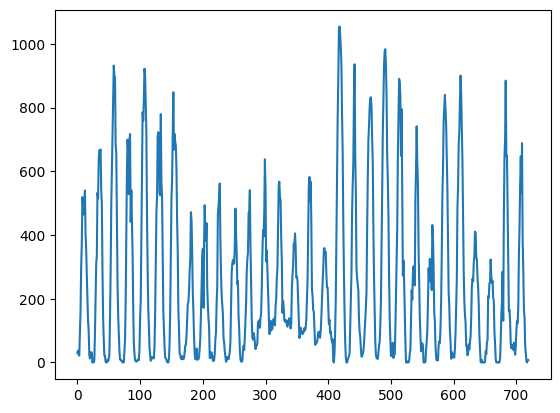

In [ ]:
df_pred_b.prediction.plot()

In [ ]:
df_pred_b_to_plot = pd.DataFrame(df_pred_b['prediction'])
df_pred_b_to_plot.set_index(df_pred_b['time'], inplace = True)

<Axes: xlabel='time'>

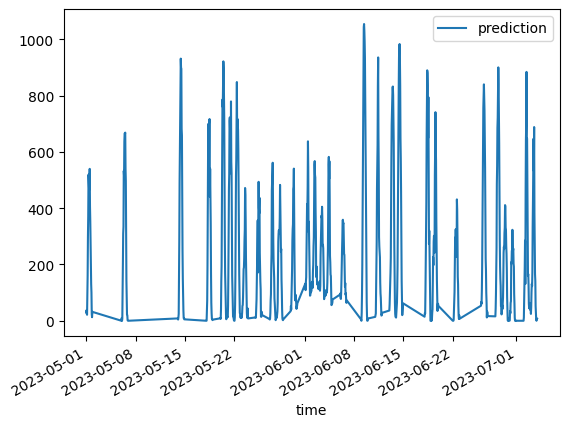

In [ ]:
df_pred_b_to_plot.plot()

In [ ]:
df_pred_b.to_csv('B.csv')

# Prediction pour C

In [17]:
# Reading csv to h2o dataframe file
df_train_c = h2o.H2OFrame(X_train_c)
df_test_c = h2o.H2OFrame(X_test_estimated_c)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [18]:
# Setting features as factor
df_train_c['dew_or_rime:idx'] = df_train_c['dew_or_rime:idx'].asfactor()
df_train_c['is_day:idx'] = df_train_c['is_day:idx'].asfactor()
df_train_c['is_in_shadow:idx'] = df_train_c['is_in_shadow:idx'].asfactor()
df_train_c['precip_type_5min:idx'] = df_train_c['precip_type_5min:idx'].asfactor()
df_train_c['snow_drift:idx'] = df_train_c['snow_drift:idx'].asfactor()

In [19]:
df_test_c['dew_or_rime:idx'] = df_test_c['dew_or_rime:idx'].asfactor()
df_test_c['is_day:idx'] = df_test_c['is_day:idx'].asfactor()
df_test_c['is_in_shadow:idx'] = df_test_c['is_in_shadow:idx'].asfactor()
df_test_c['precip_type_5min:idx'] = df_test_c['precip_type_5min:idx'].asfactor()
df_test_c['snow_drift:idx'] = df_test_c['snow_drift:idx'].asfactor()

In [20]:
# Removing labels from train set
y = "pv_measurement"
x = df_train_c.columns
x.remove(y)

In [21]:
# Running fit/training on train set with cross validation n=5
aml = H2OAutoML(max_models = 10, seed = 1, sort_metric='MAE')
aml.train(x = x, y = y, training_frame = df_train_c)

AutoML progress: |
09:39:52.699: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██
09:41:48.73: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

█████████
09:42:03.334: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

█████████
09:44:24.672: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

█████
09:45:19.52: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██████████
09:48:40.540: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

███
09:50:01.313: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

████
09:51:58.389: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

███
09:53:44.375: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██
09:54:36.649: _train param, Dropping bad and constant columns: [snow_drift:idx, e

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20231014_93951


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  6/10
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      0/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 483.06432700374256
RMSE: 21.978724417120812
MAE: 9.616691832399349
RMSLE: NaN
Mean Residual Deviance: 483.06432700374256
R^2: 0.9823240097080005
Null degrees of freedom: 10030
Residual degrees of freedom: 10024
Null deviance: 274143380.901875
Residual deviance: 4845618.264174541
AIC: 90475.8277676585

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 2328.803959700515
RMSE: 48.25768290853297
MAE: 19.511767577220162
RMSLE: NaN
Mean Residual Deviance: 2328.803959700515
R^2: 0.915360222155092
Null degrees of freedom: 26070
Residual degrees of freedom: 26064
Null deviance: 717346563.5905157
Residual deviance: 60714248.03335212
AIC: 276133.62622638984

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     19.5181      0.732389     19.5998       19.4824       19.3816       18.5349       20.5916
mean_residual_deviance  2328.78      175.869      2466.9        2285.63       2249.89       2101.16       2540.32
mse                     2328.78      175.869      2466.9        2285.63       2249.89       2101.16       2540.32
null_deviance           1.43469e+08  3.33903e+06  1.40358e+08   1.46601e+08   1.42438e+08   1.47405e+08   1.40544e+08
r2                      0.915224     0.0081147    0.908519      0.919792      0.917073      0.925219      0.905516
residual_deviance       1.21416e+07  906213       1.28377e+07   1.17573e+07   1.18119e+07   1.10227e+07   1.32782e+07
rmse                    48.2298      1.82454      49.6679       47.8083       47.433        45.8384       50.4016
rmsle                   nan          0            nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [22]:
lb = aml.leaderboard

In [23]:
# Showing best perforimg models
lb.head()

model_id                                                    mae     rmse      mse       rmsle    mean_residual_deviance
------------------------------------------------------  -------  -------  -------  ----------  ------------------------
StackedEnsemble_AllModels_1_AutoML_1_20231014_93951     19.5118  48.2577  2328.8   nan                          2328.8
StackedEnsemble_BestOfFamily_1_AutoML_1_20231014_93951  19.6876  48.8815  2389.4   nan                          2389.4
GBM_4_AutoML_1_20231014_93951                           19.8404  49.2173  2422.34  nan                          2422.34
GBM_3_AutoML_1_20231014_93951                           20.0413  49.0641  2407.29  nan                          2407.29
GBM_2_AutoML_1_20231014_93951                           20.4163  49.7647  2476.53  nan                          2476.53
XRT_1_AutoML_1_20231014_93951                           20.8101  51.4927  2651.5     0.775883                   2651.5
DRF_1_AutoML_1_20231014_93951                           20.8769  51.6132  2663.92    0.77367                    2663.92
GBM_1_AutoML_1_20231014_93951                           21.6214  52.3174  2737.12  nan                          2737.12
XGBoost_2_AutoML_1_20231014_93951                       21.7012  53.6577  2879.15  nan                          2879.15
XGBoost_1_AutoML_1_20231014_93951                       21.8425  53.6417  2877.43  nan                          2877.43
[10 rows x 6 columns]

In [32]:
df_pred_c = aml.predict(df_test_c)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [33]:
df_pred_c = h2o.as_list(df_pred_c)

In [34]:
df_pred_c

predict
0     0.349159
1     1.520173
2     0.505008
3     5.410844
4    29.232406
..         ...
715  39.004312
716  10.720481
717  -0.183539
718   0.094295
719   0.125787

[720 rows x 1 columns]

In [ ]:
df_pred_b['time'] = X_test_estimated_b.index
df_pred_b['location'] = ['B' for i in df_pred_b.index]
df_pred_b.reset_index(inplace = True)
df_pred_b = df_pred_b[['index', 'time', 'predict', 'location']]
df_pred_b.columns = ['id', 'time', 'prediction', 'location']
df_pred_b

In [35]:
df_pred_c['time'] = X_test_estimated_c.index
df_pred_c['location'] = ['C' for i in df_pred_c.index]
df_pred_c.reset_index(inplace = True)
df_pred_c = df_pred_c[['index', 'time', 'predict', 'location']]
df_pred_c.columns = ['id', 'time', 'prediction', 'location']
df_pred_c

df_pred_c['prediction'] = df_pred_c['prediction'].apply(lambda x: pos(x))

<Axes: >

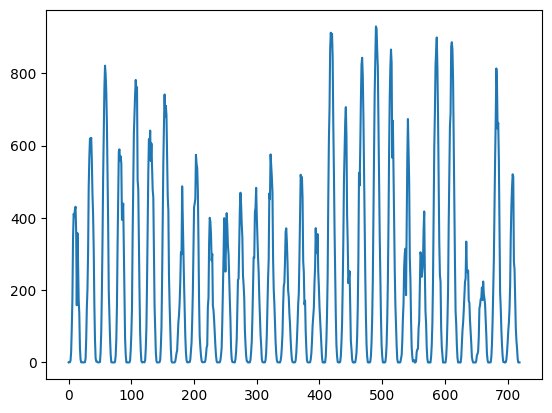

In [36]:
df_pred_c.prediction.plot()

In [37]:
df_pred_c.to_csv('C.csv')

In [40]:
#aml.train(x = x, y = y, training_frame = df_train_c)

aml.explain(df_train_c)

Output hidden; open in https://colab.research.google.com to view.

/usr/local/lib/python3.10/dist-packages/h2o/explanation/_explain.py:3401: UserWarning: No model with variable importance. Selecting all features to explain.
  warnings.warn("No model with variable importance. Selecting all features to explain.")


# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

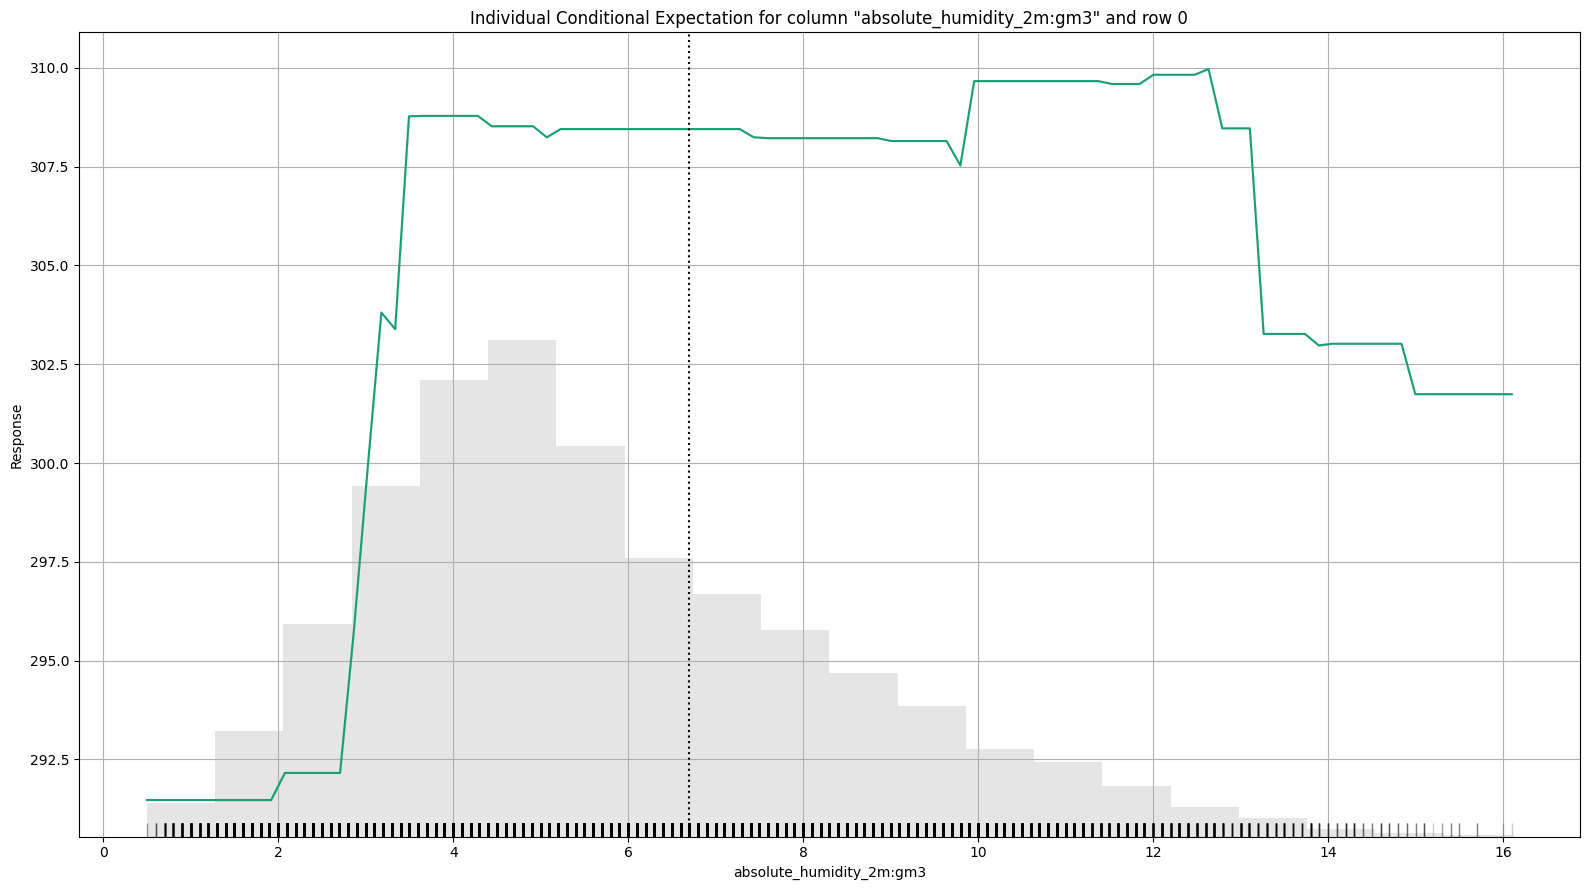

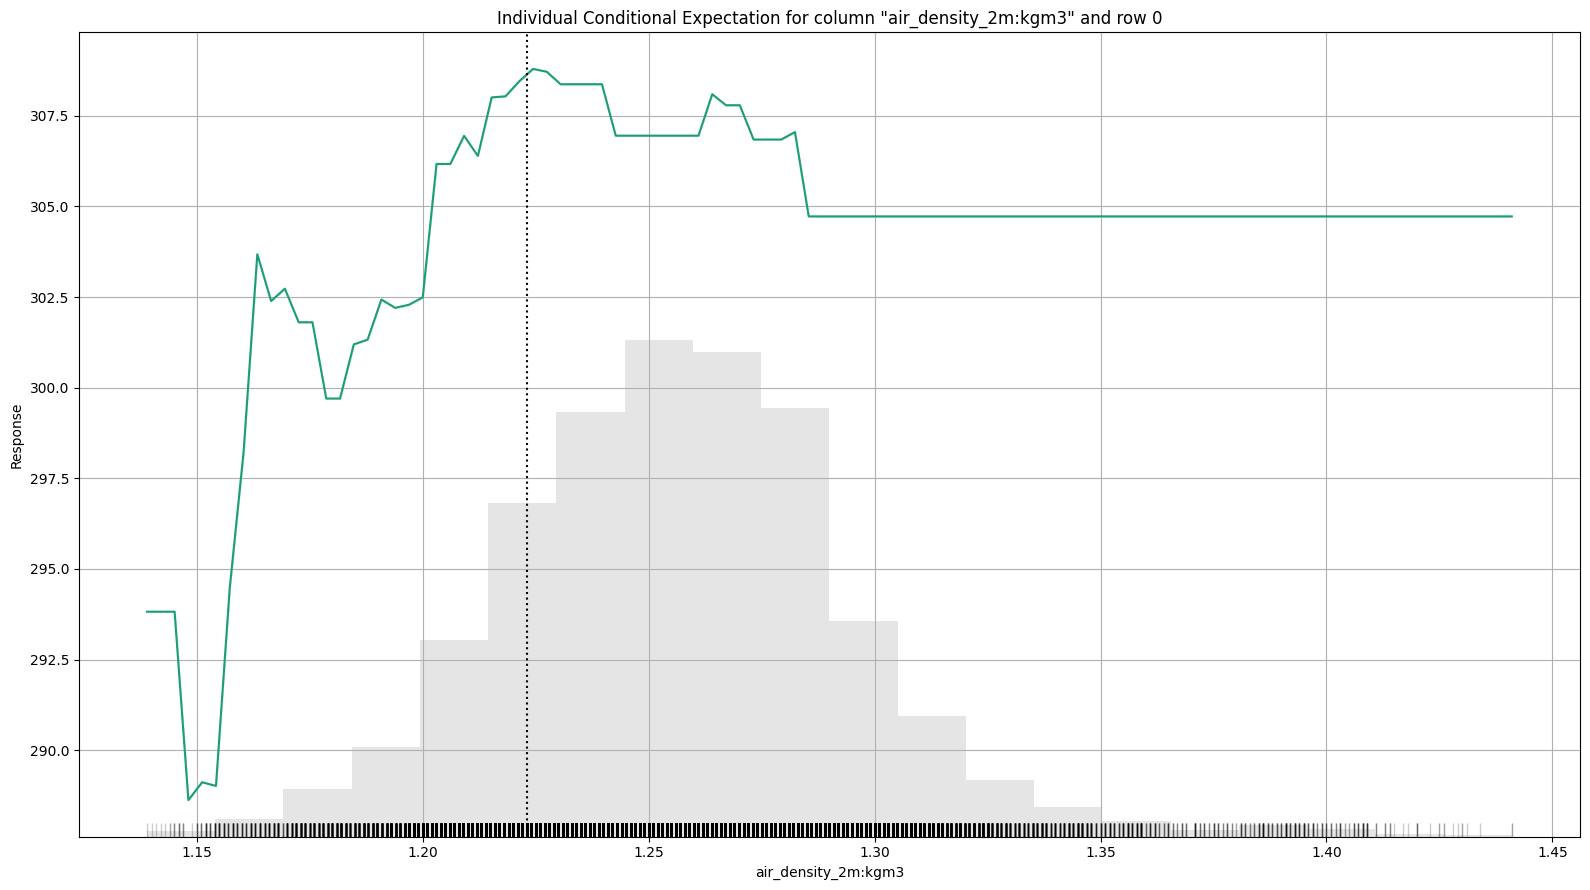

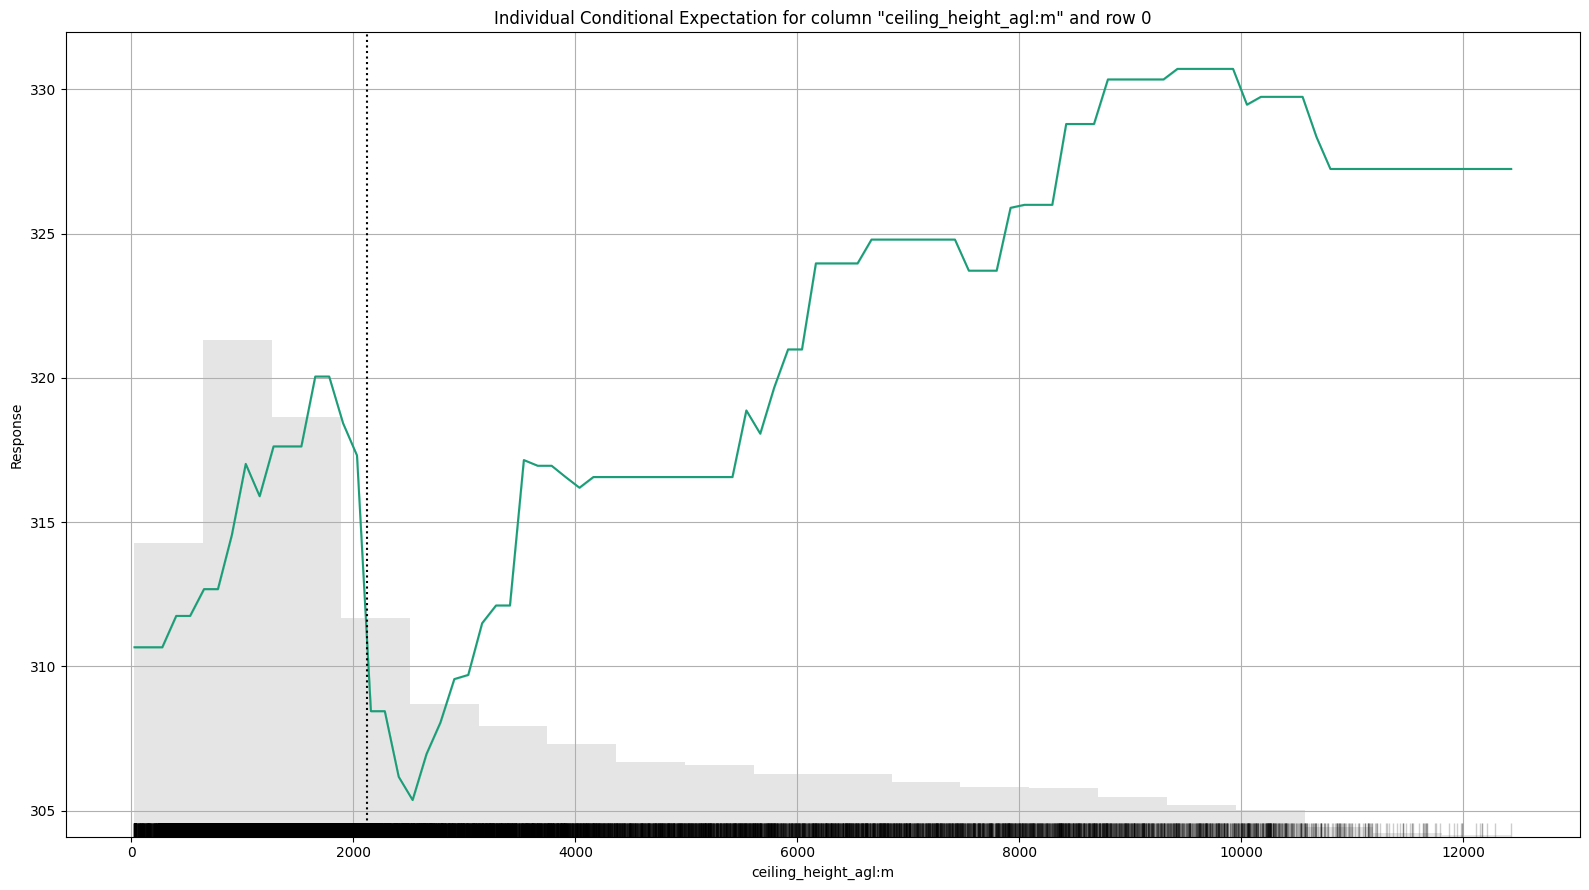

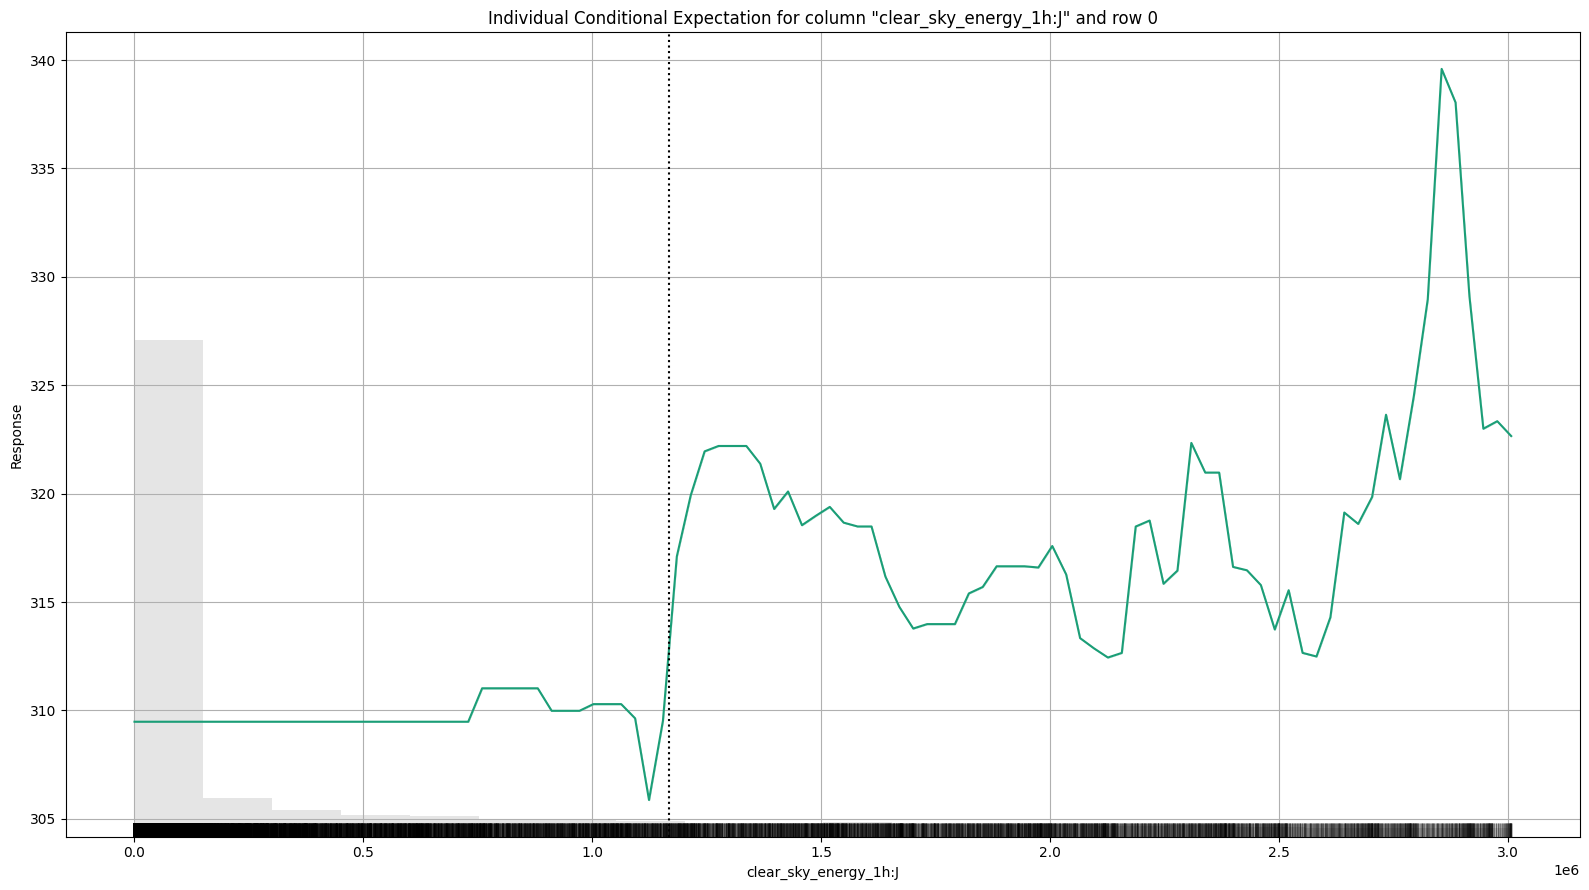

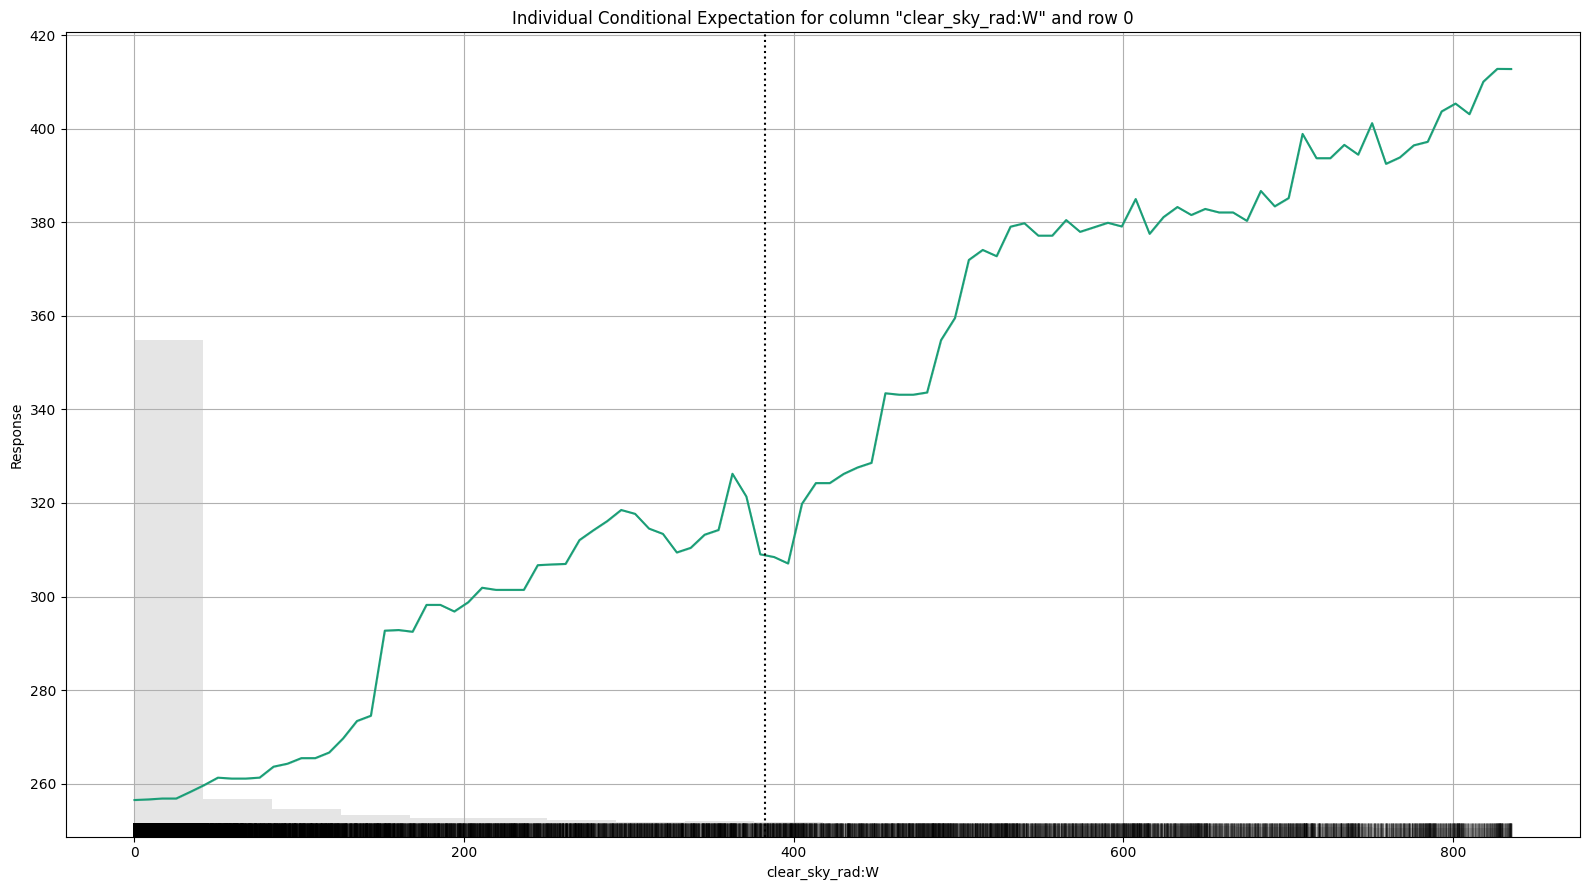

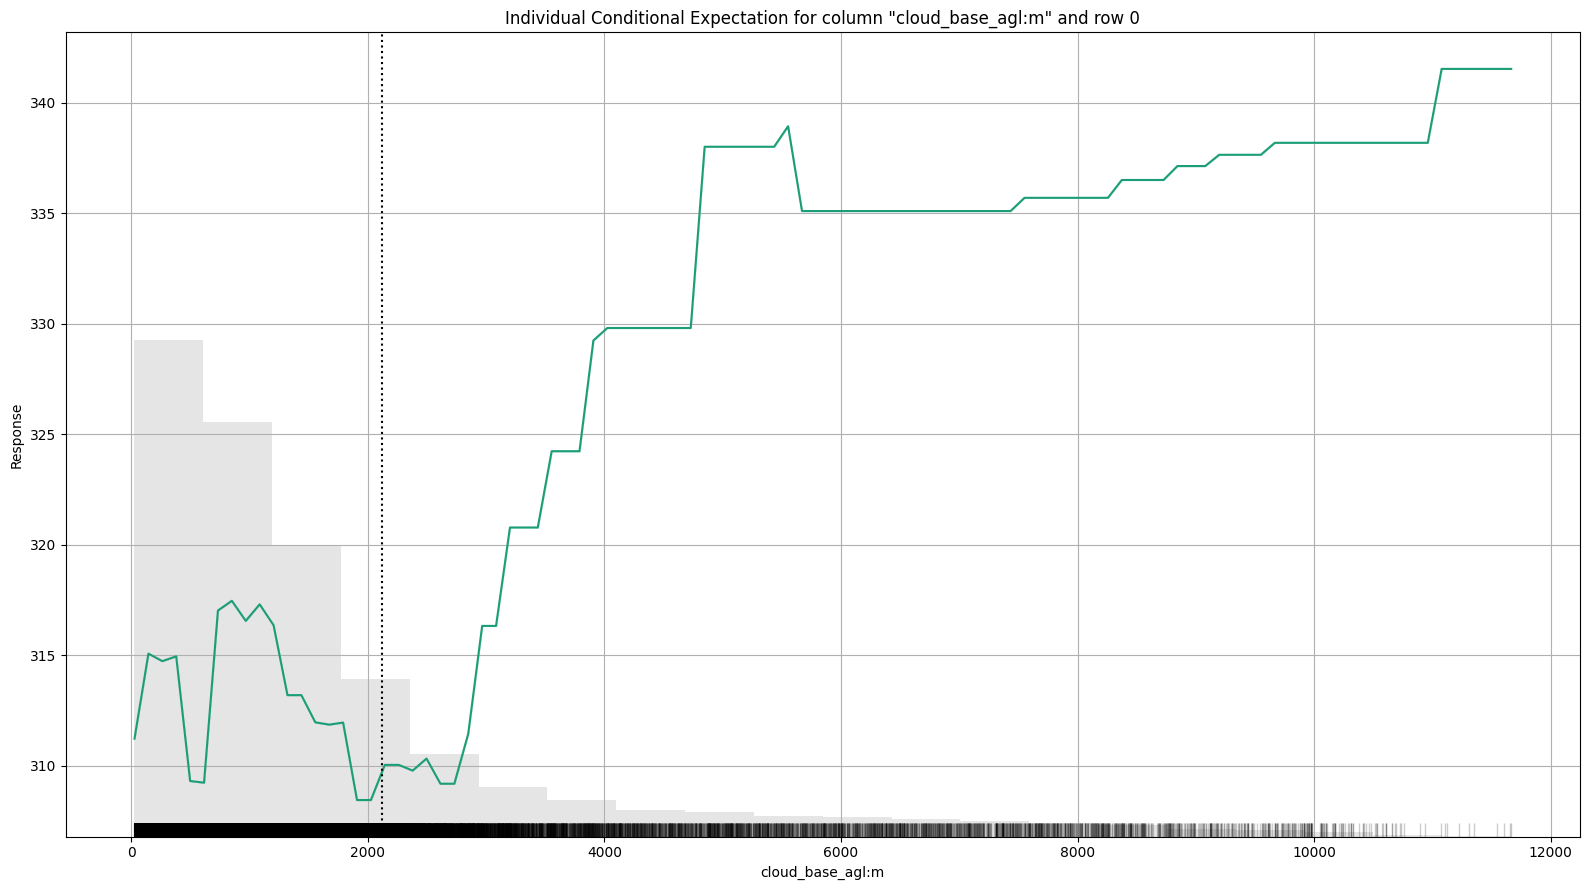

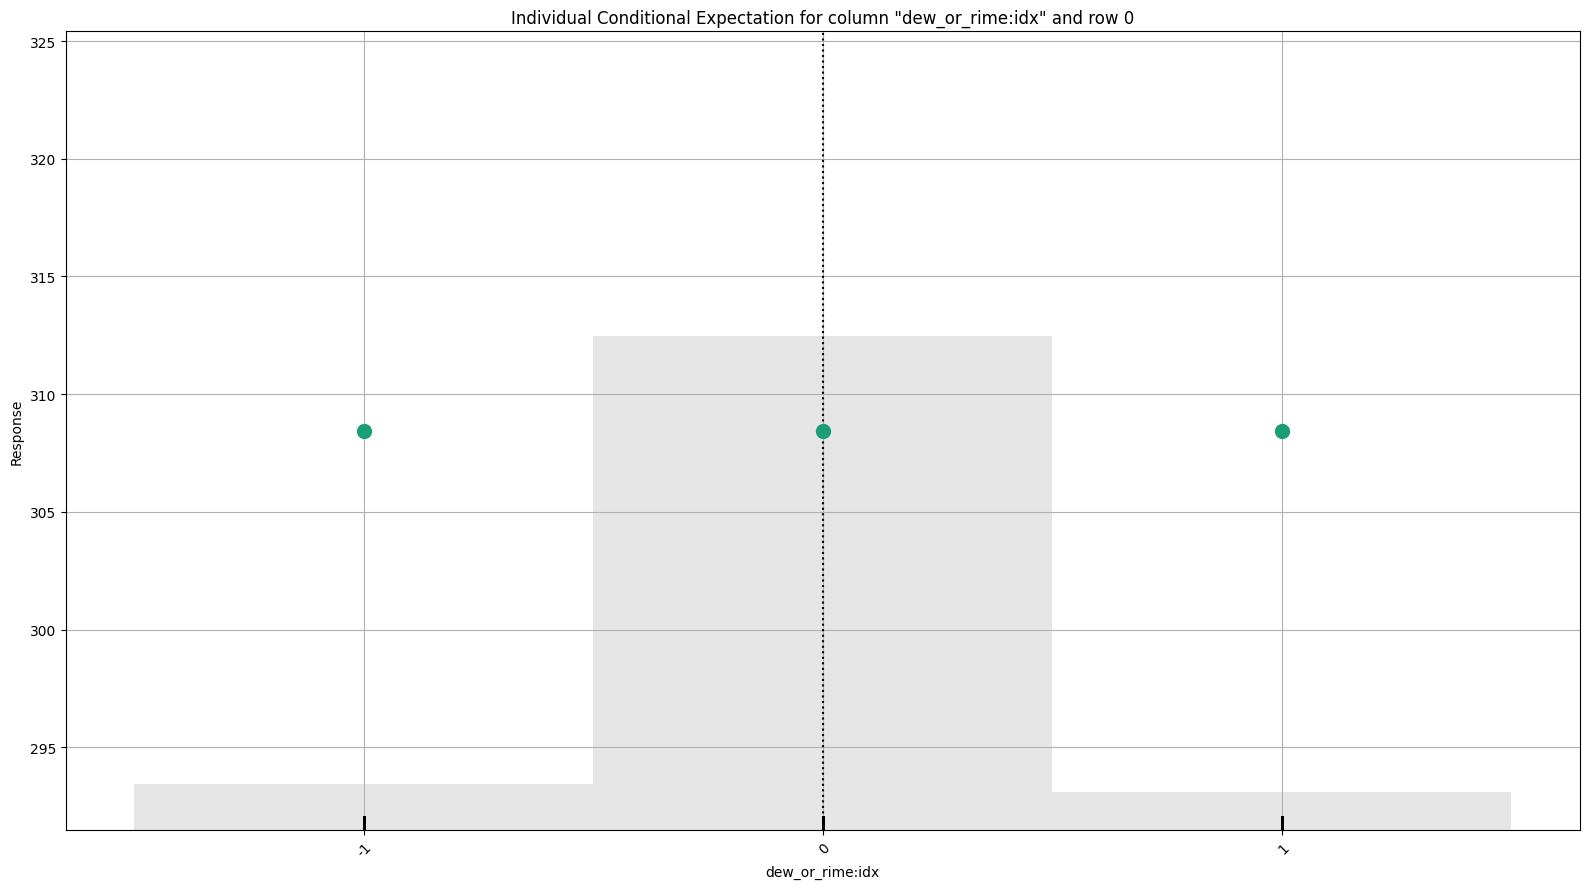

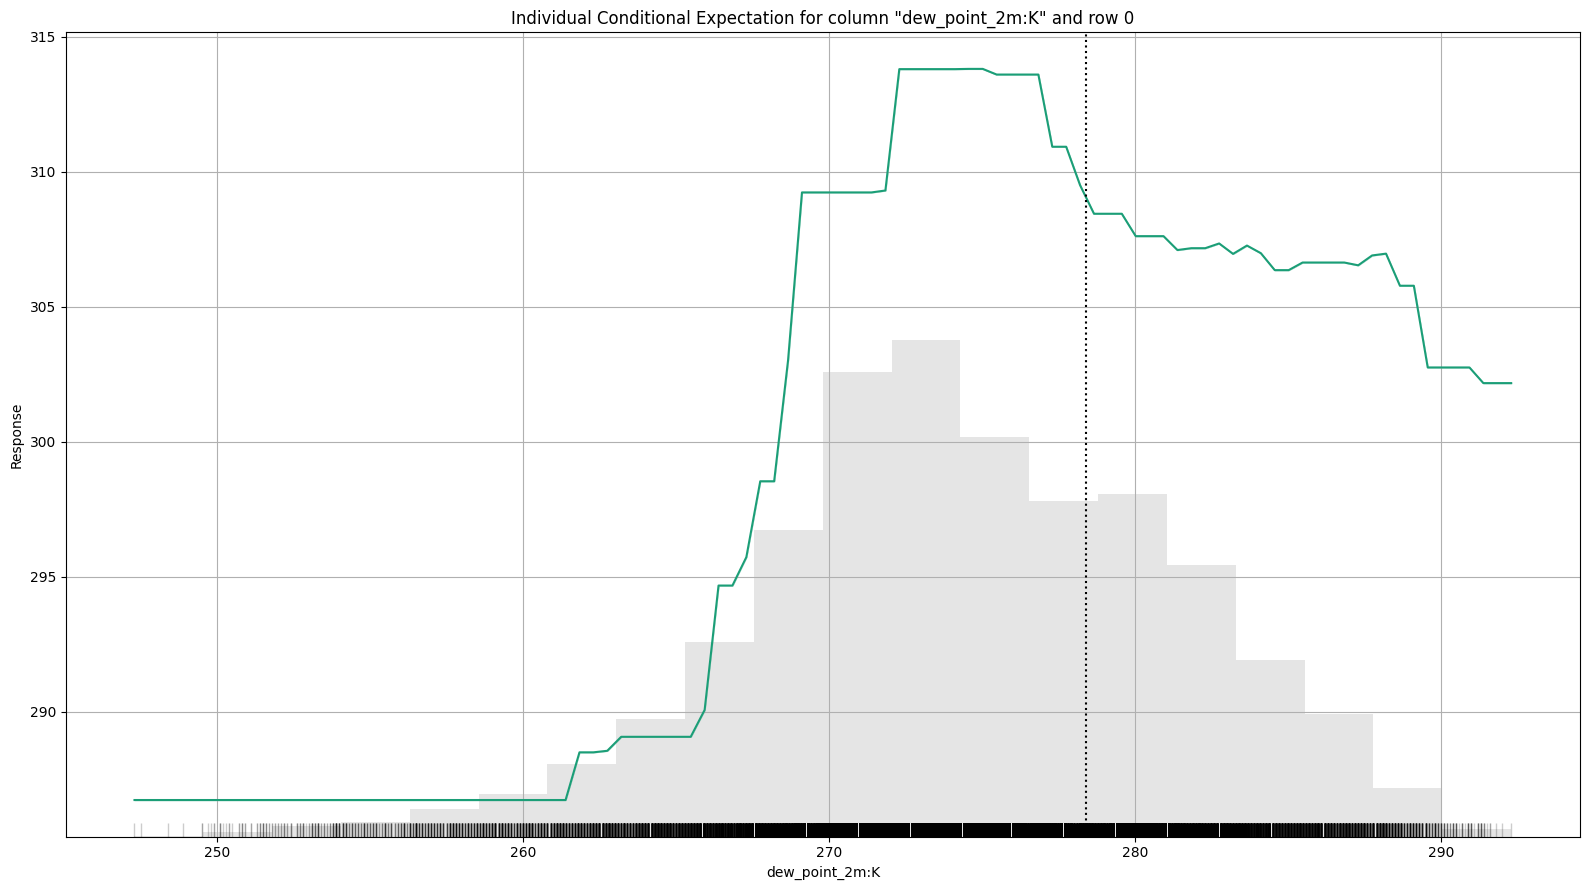

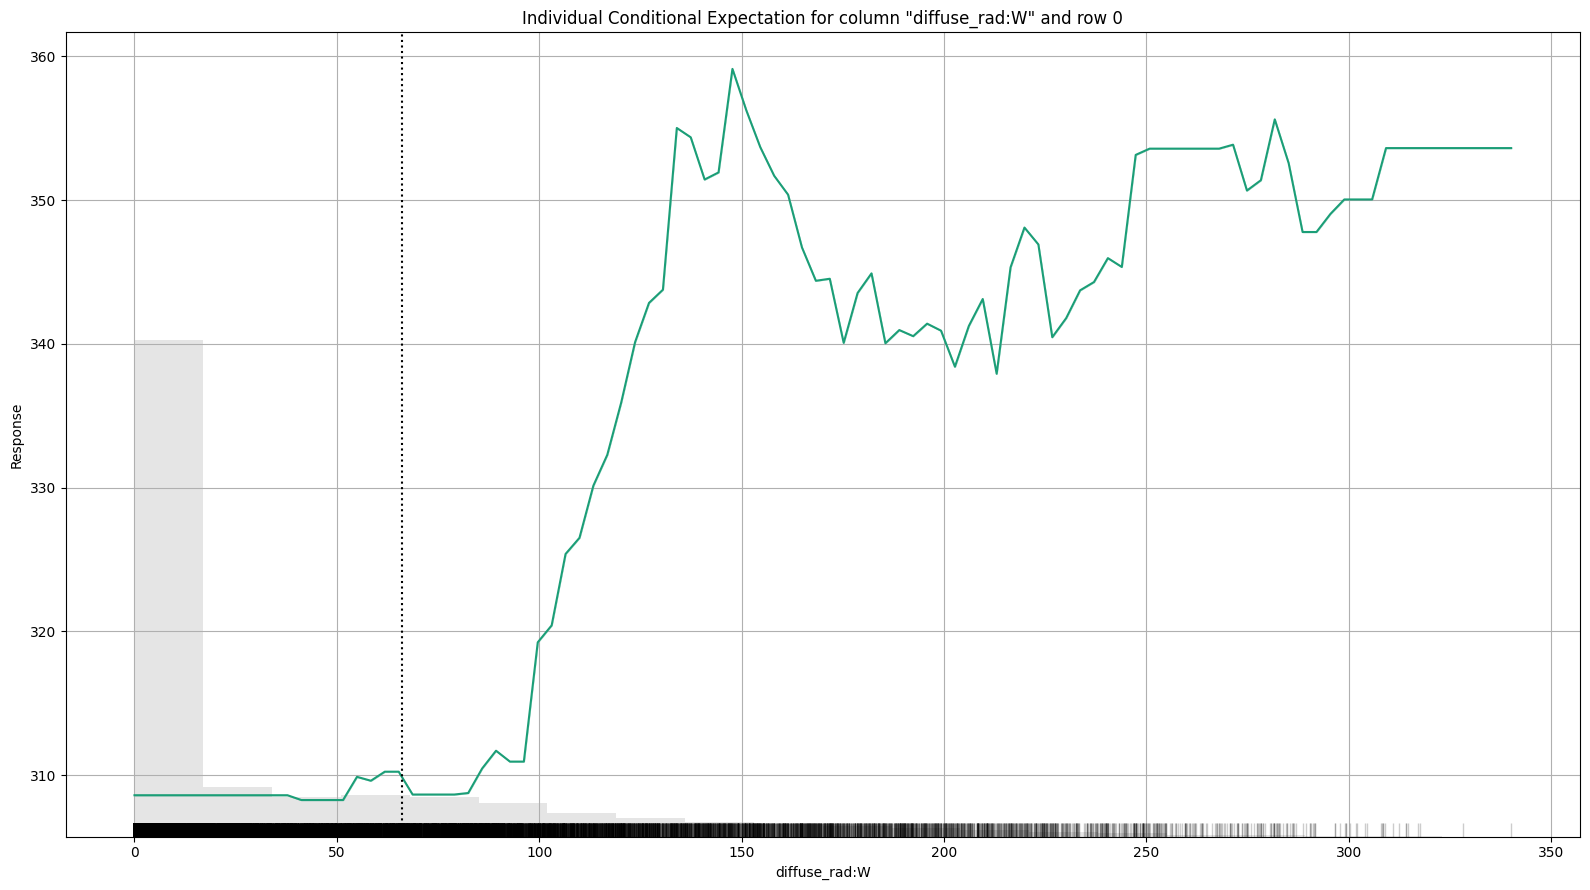

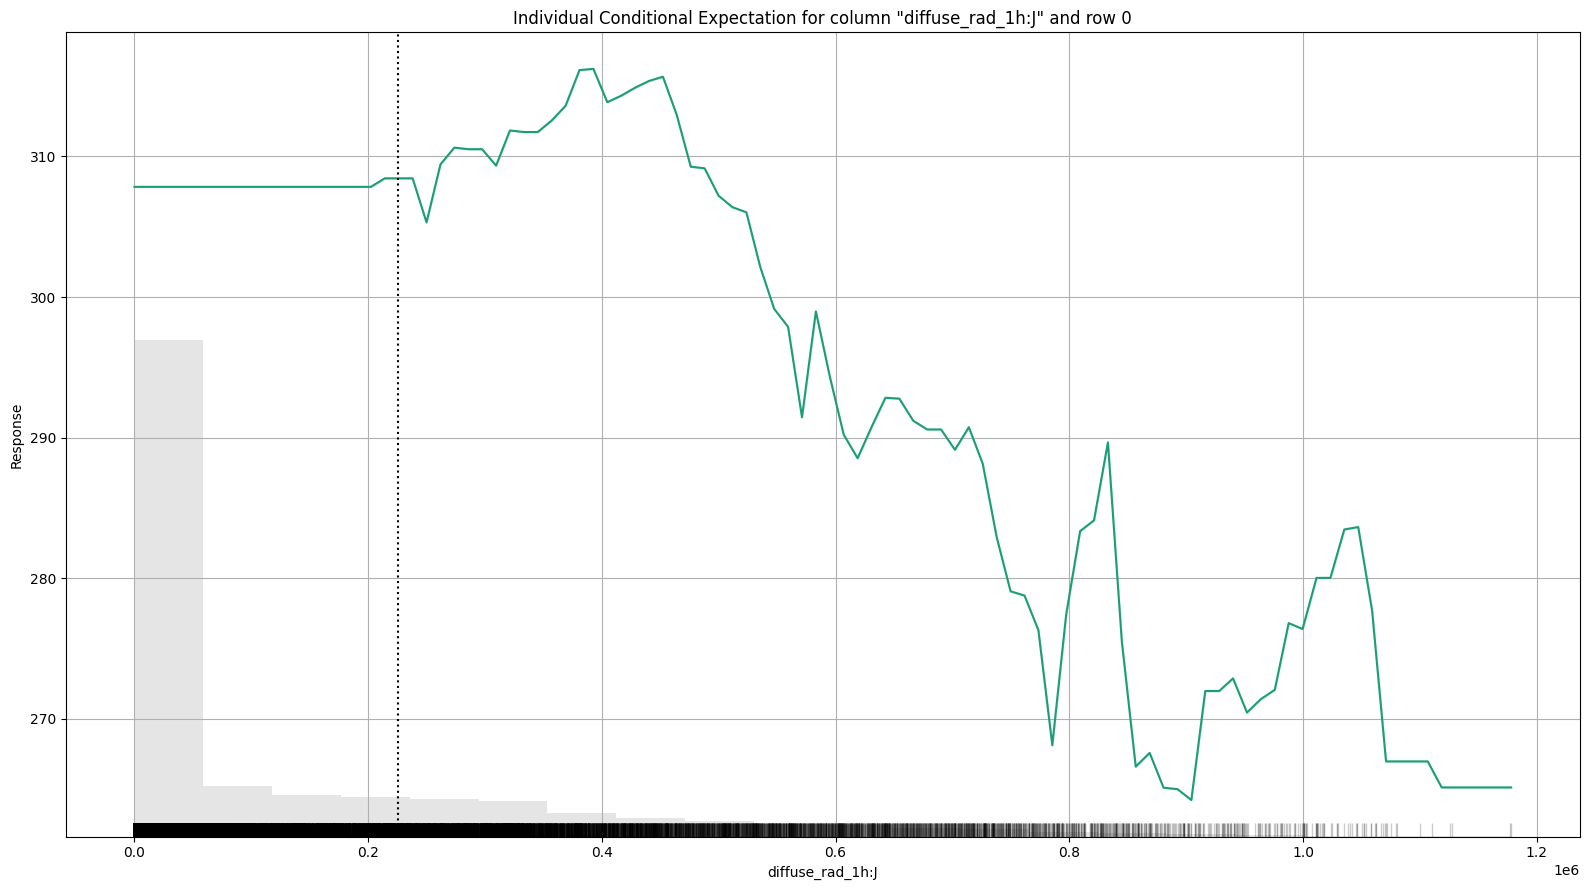

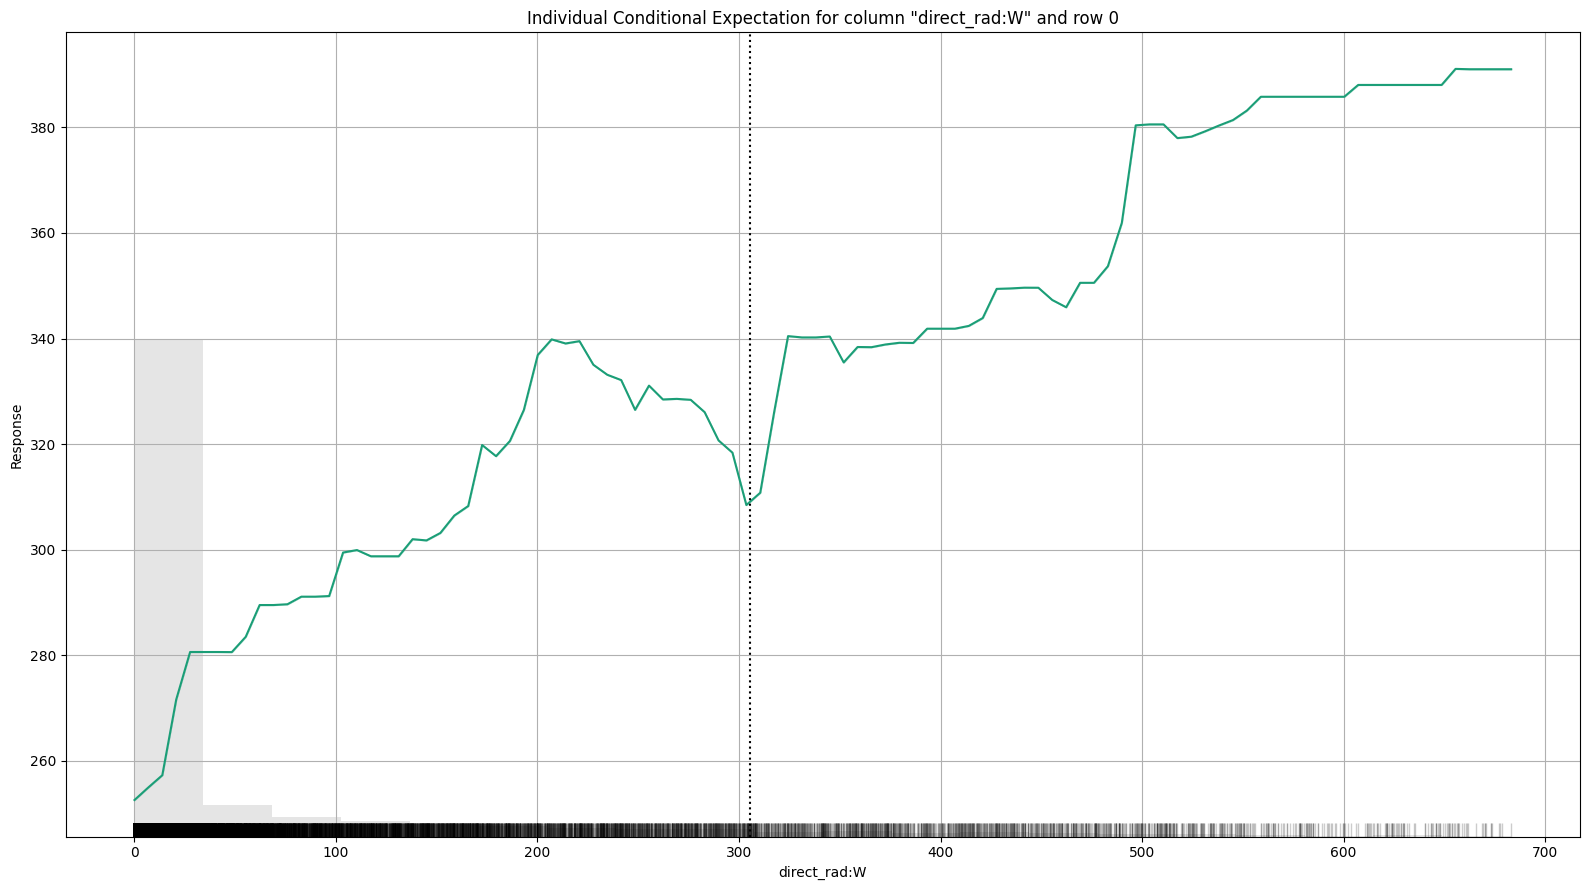

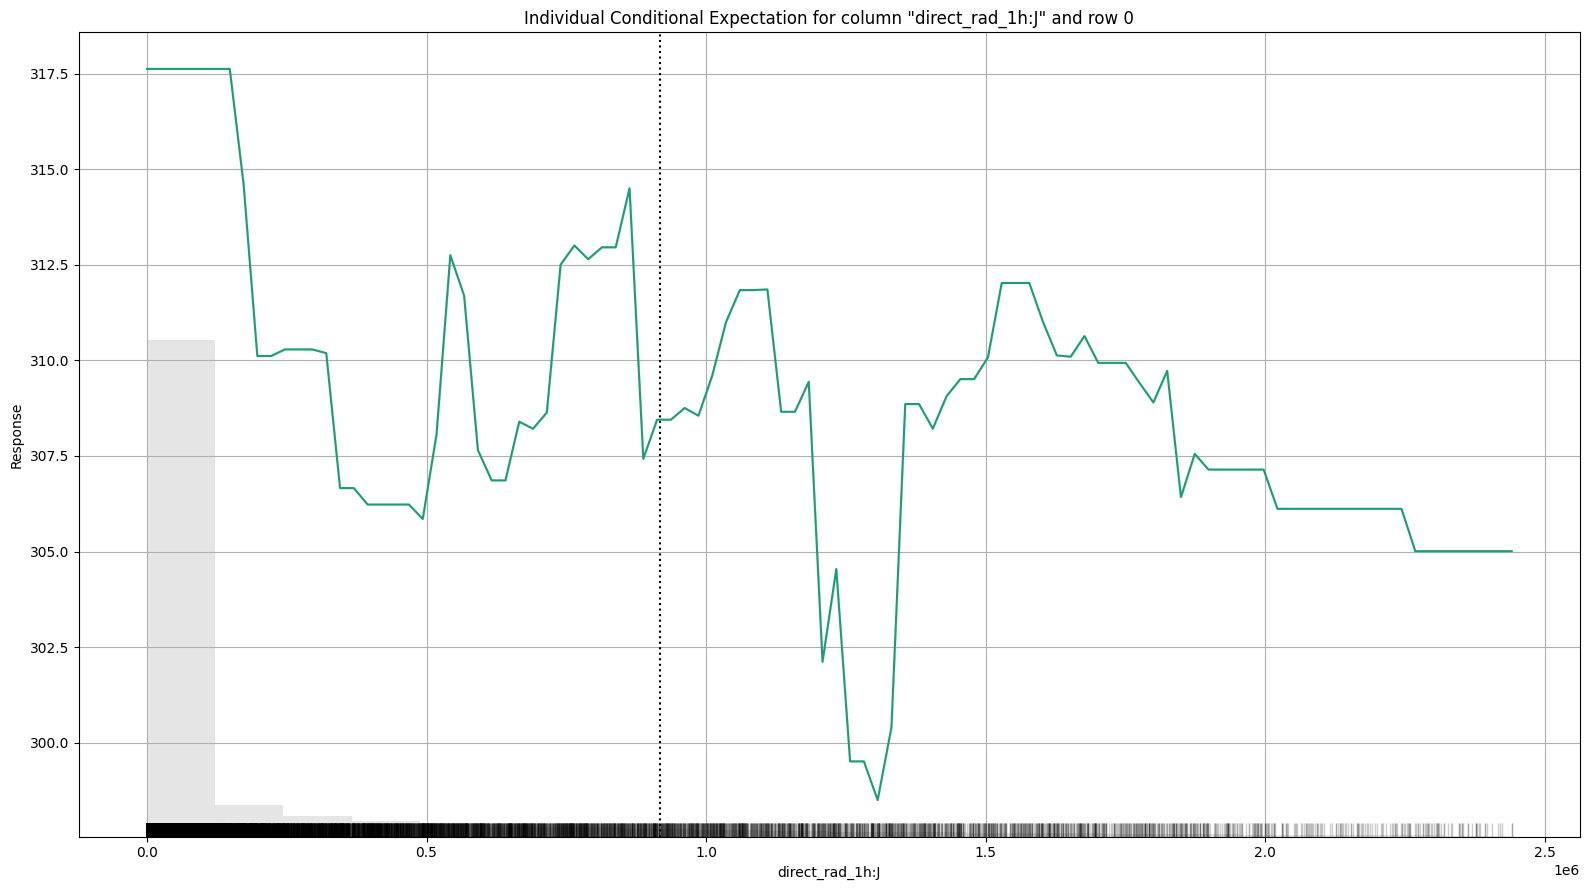

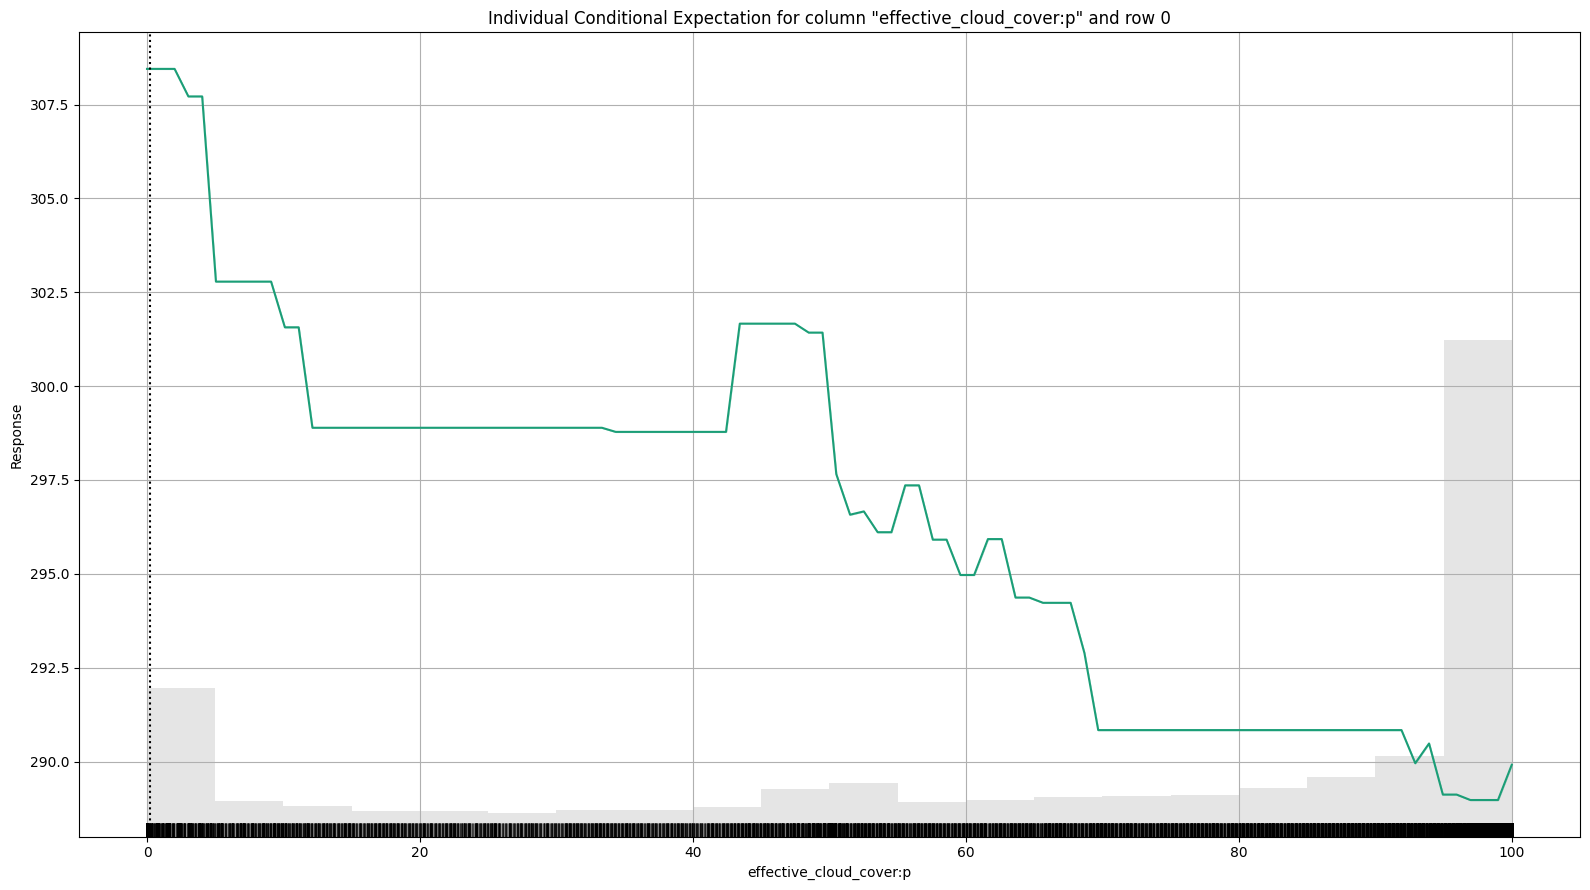

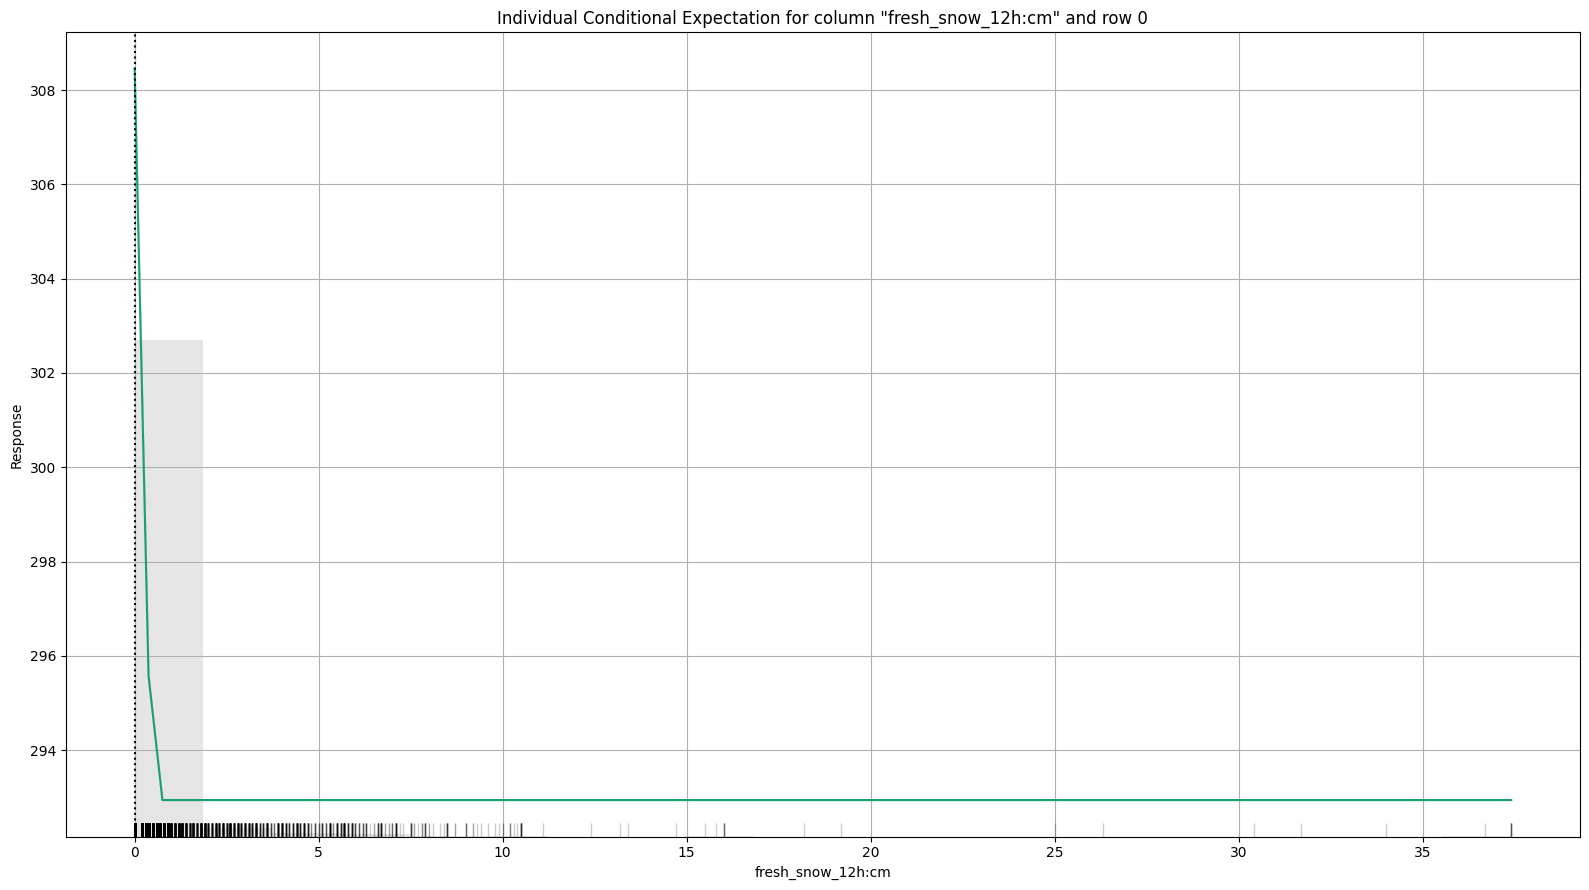

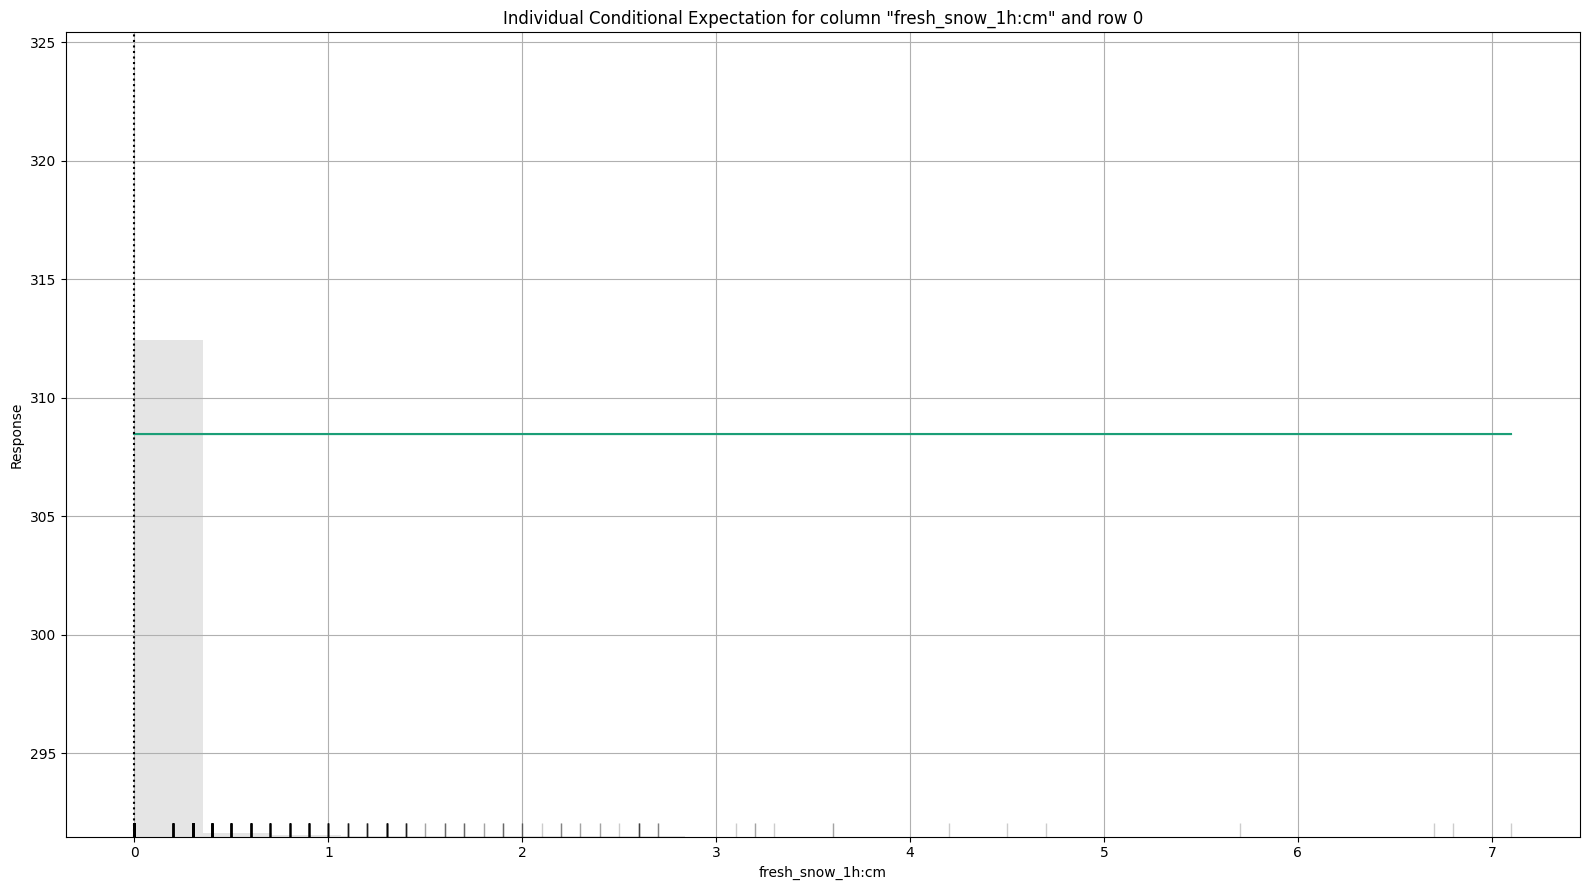

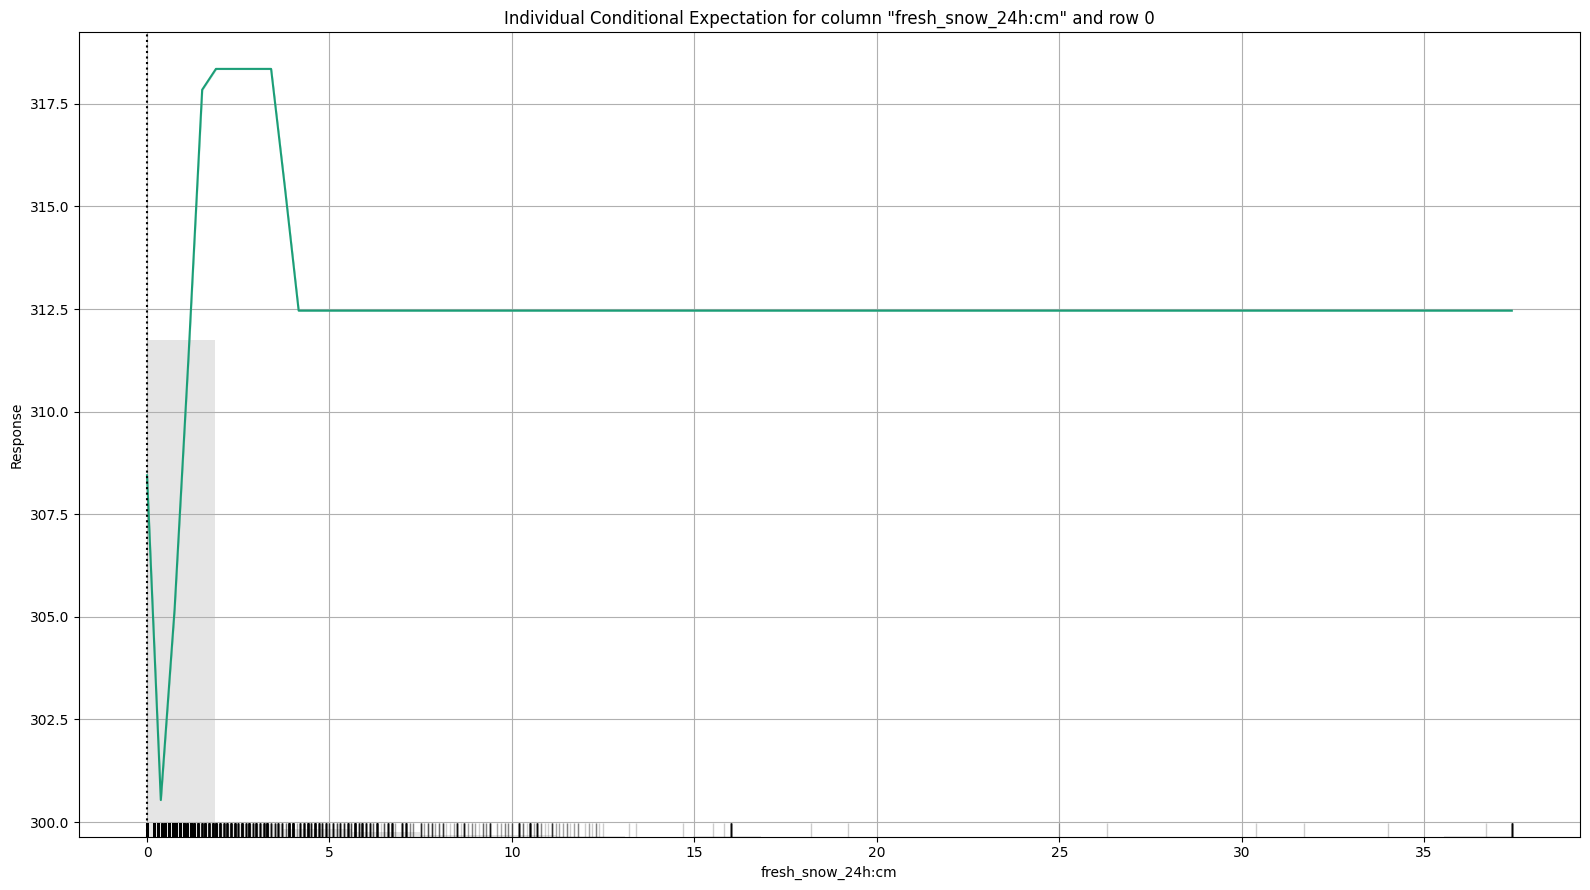

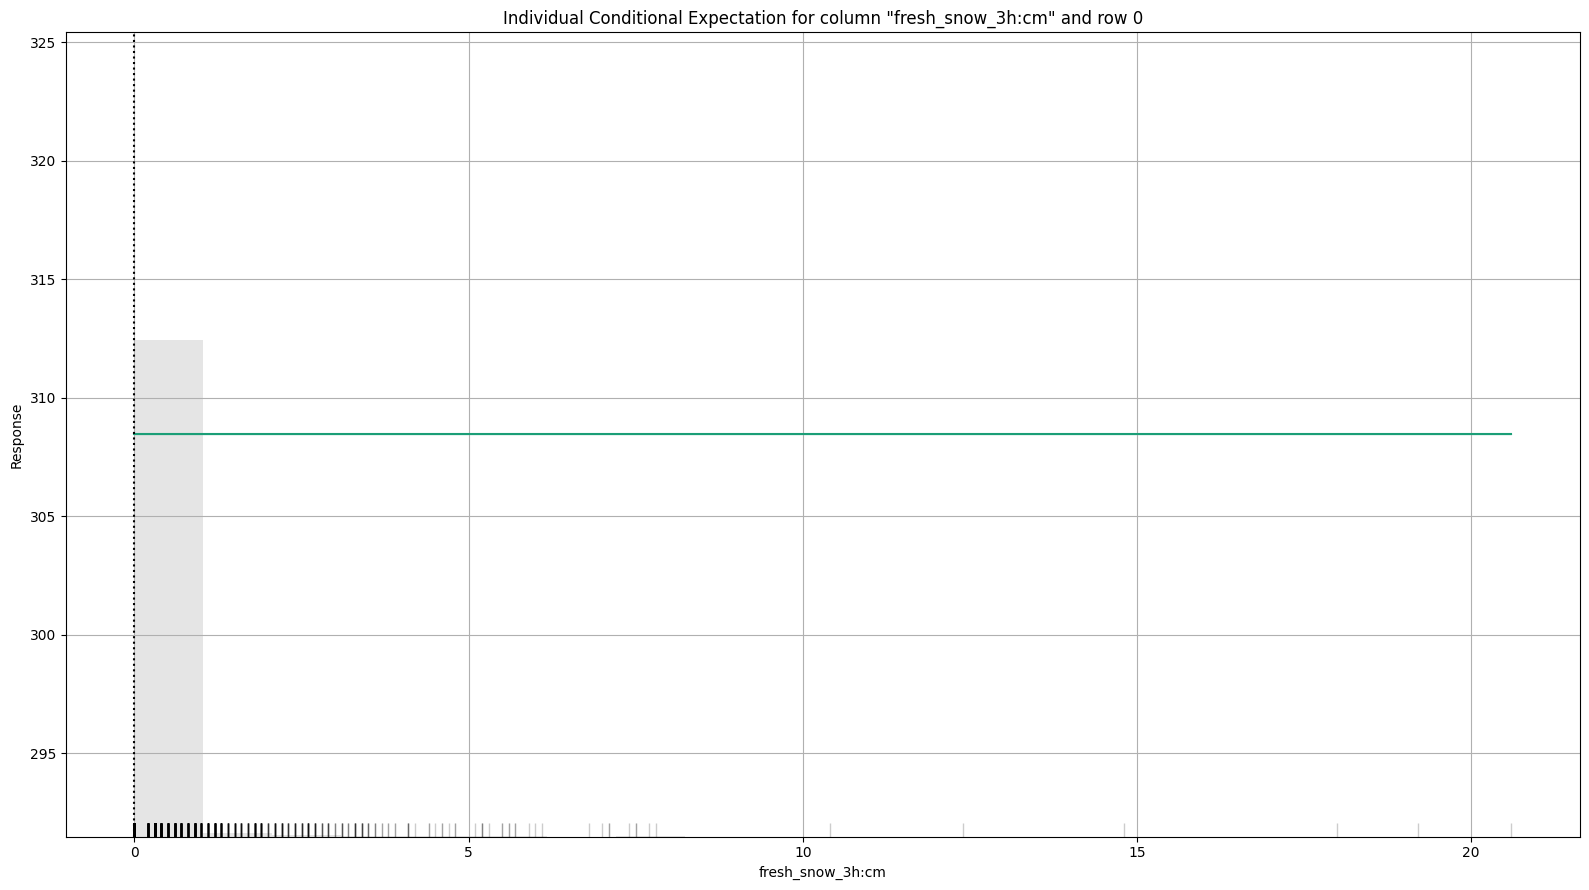

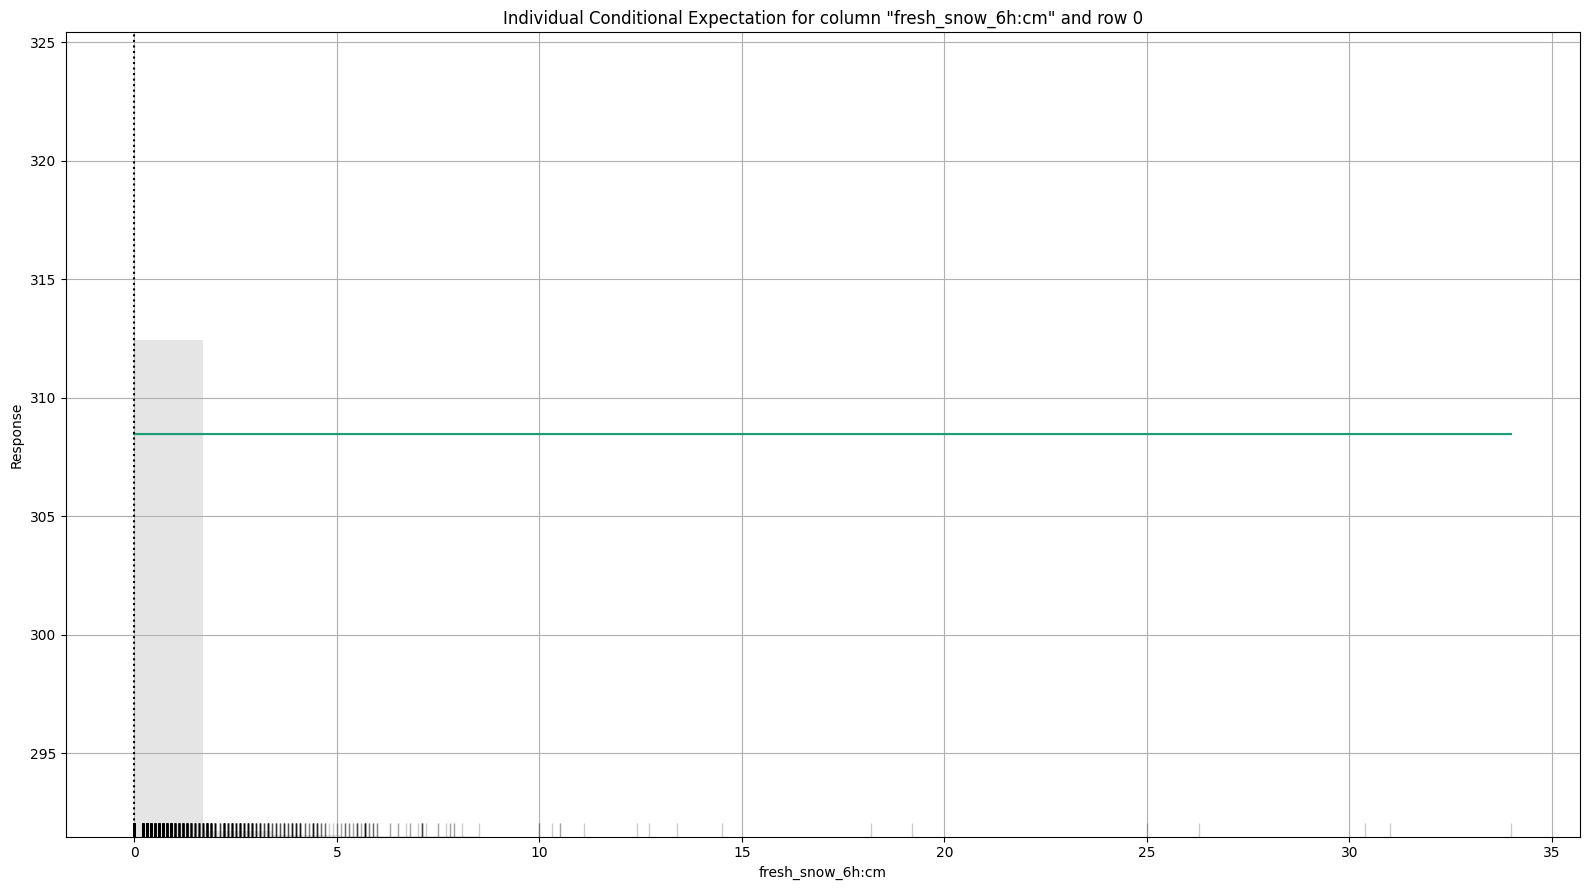

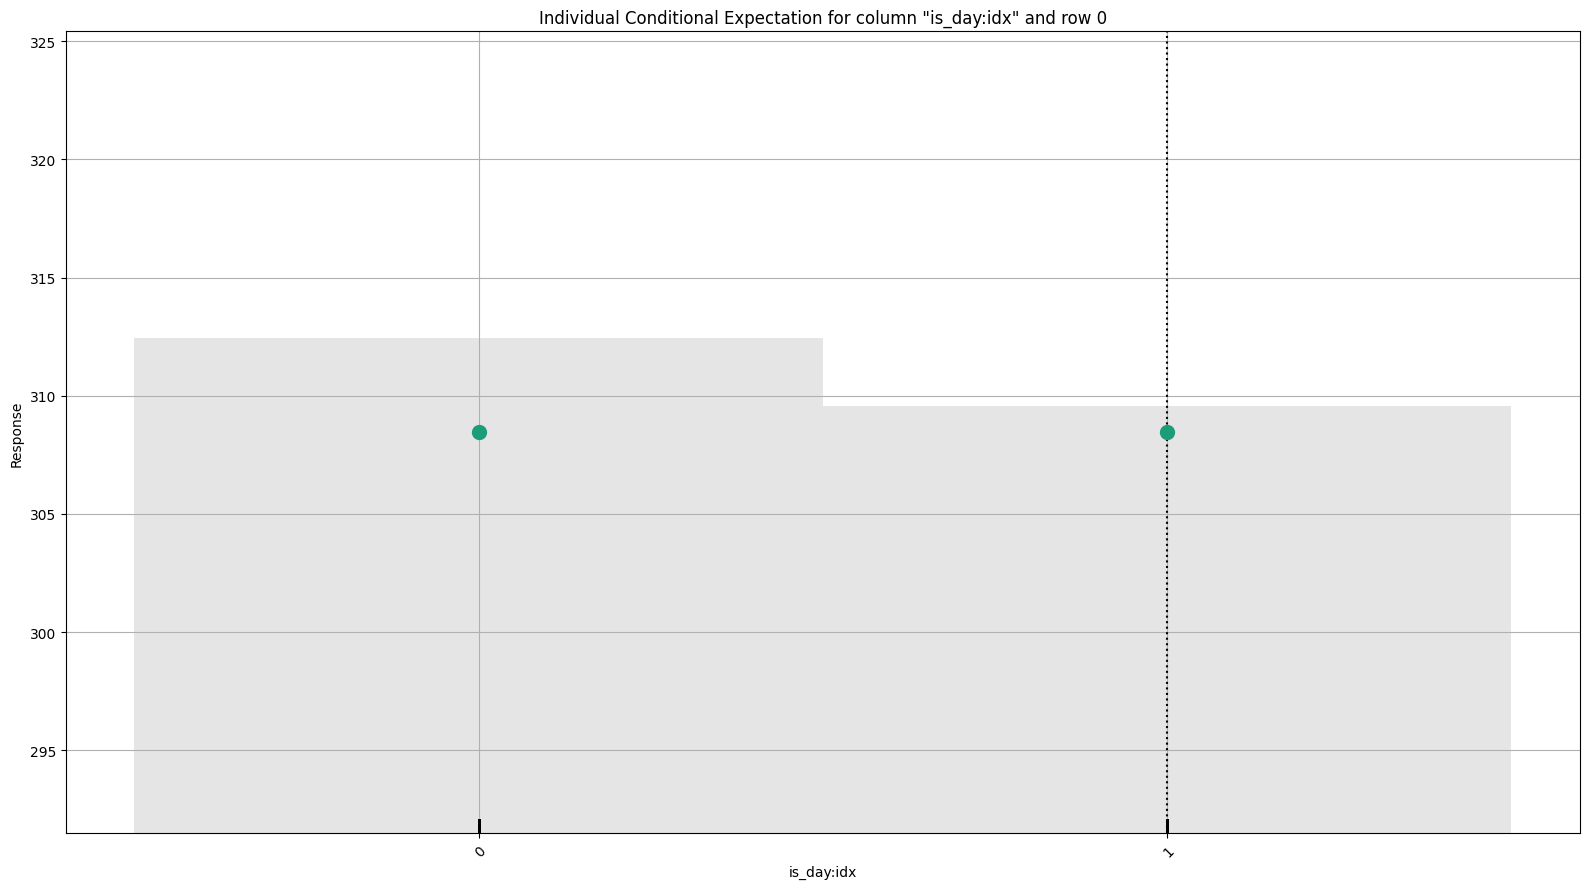

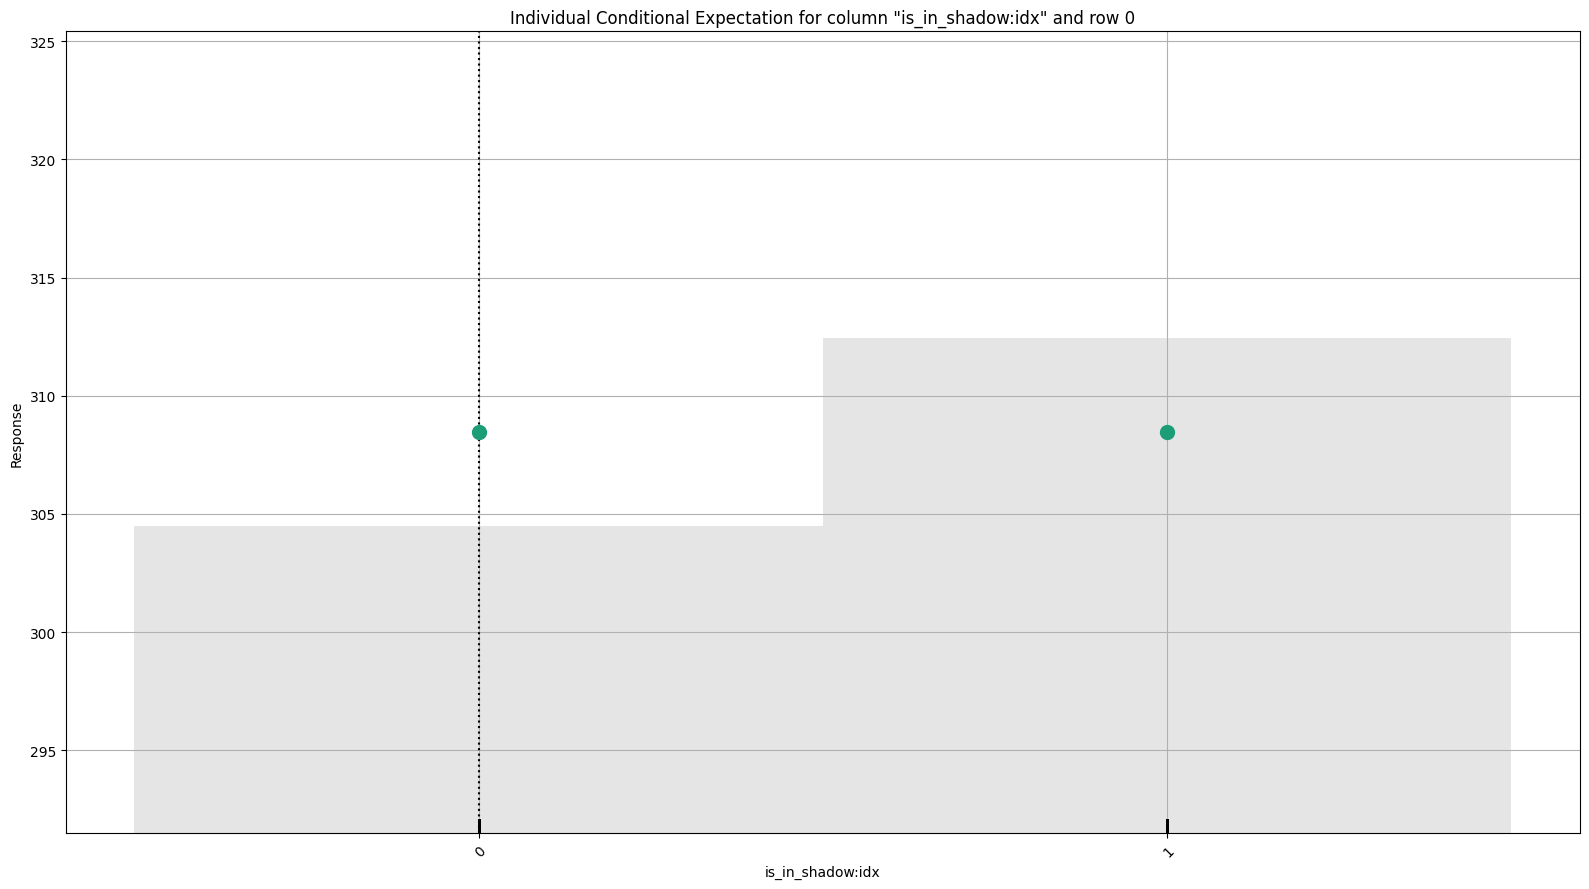

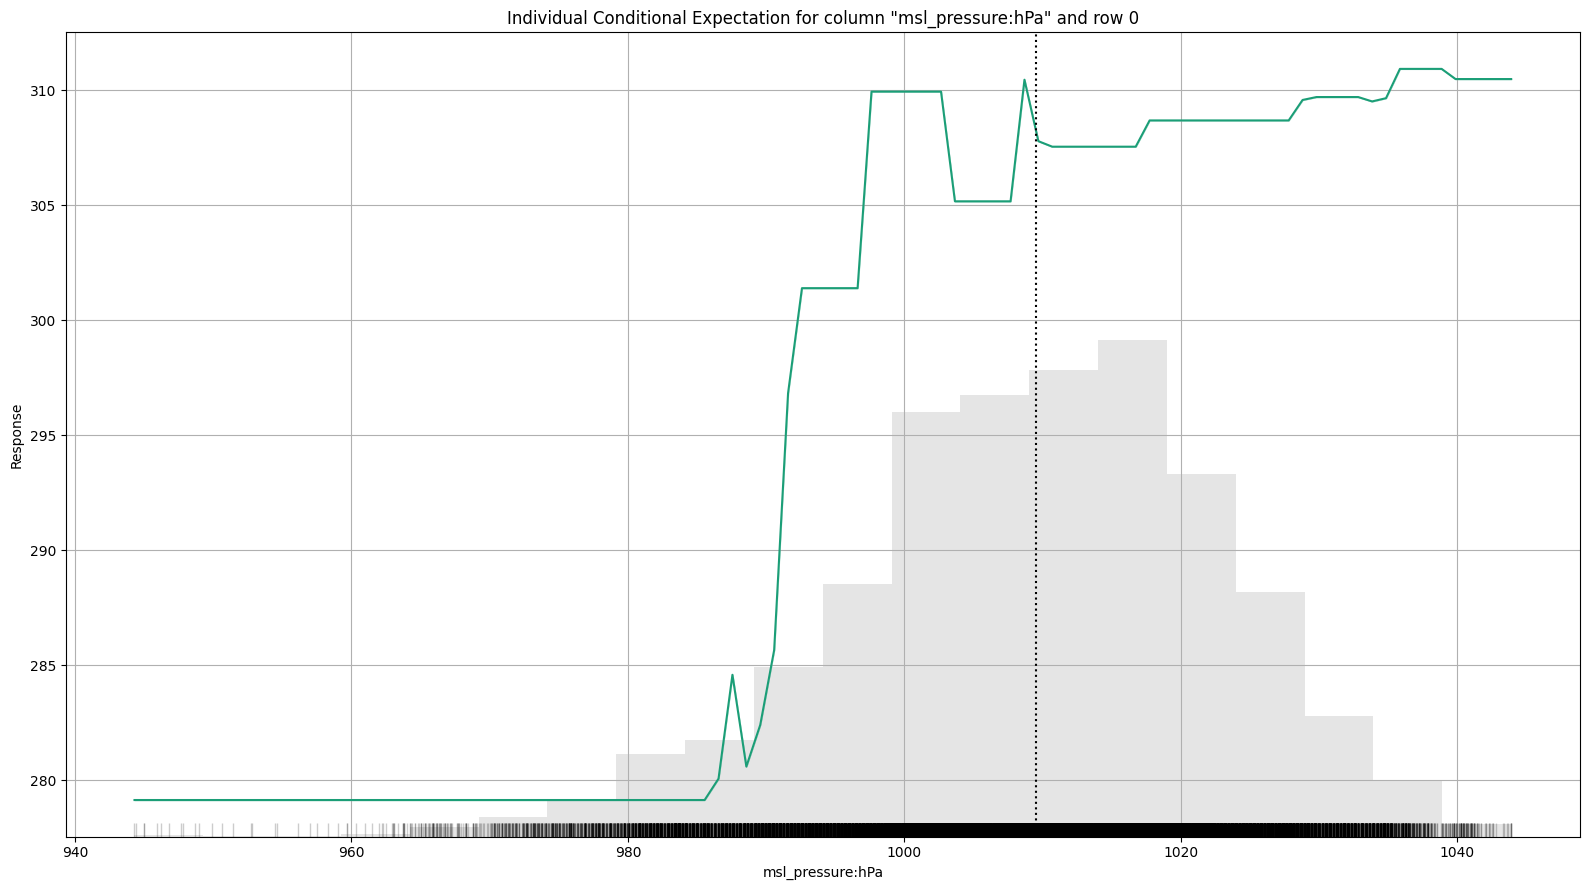

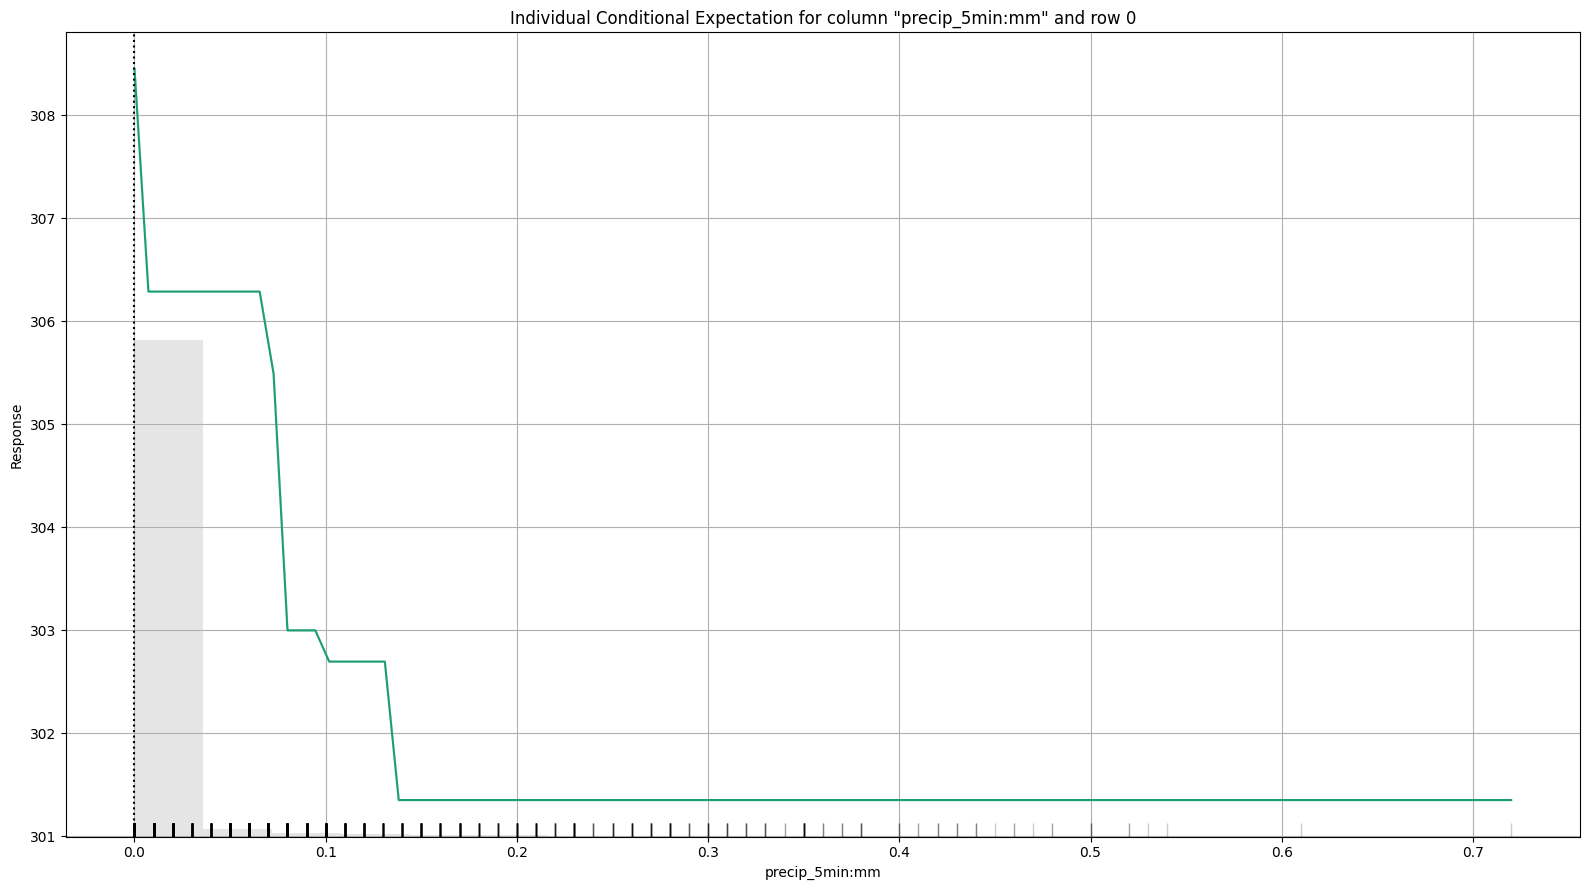

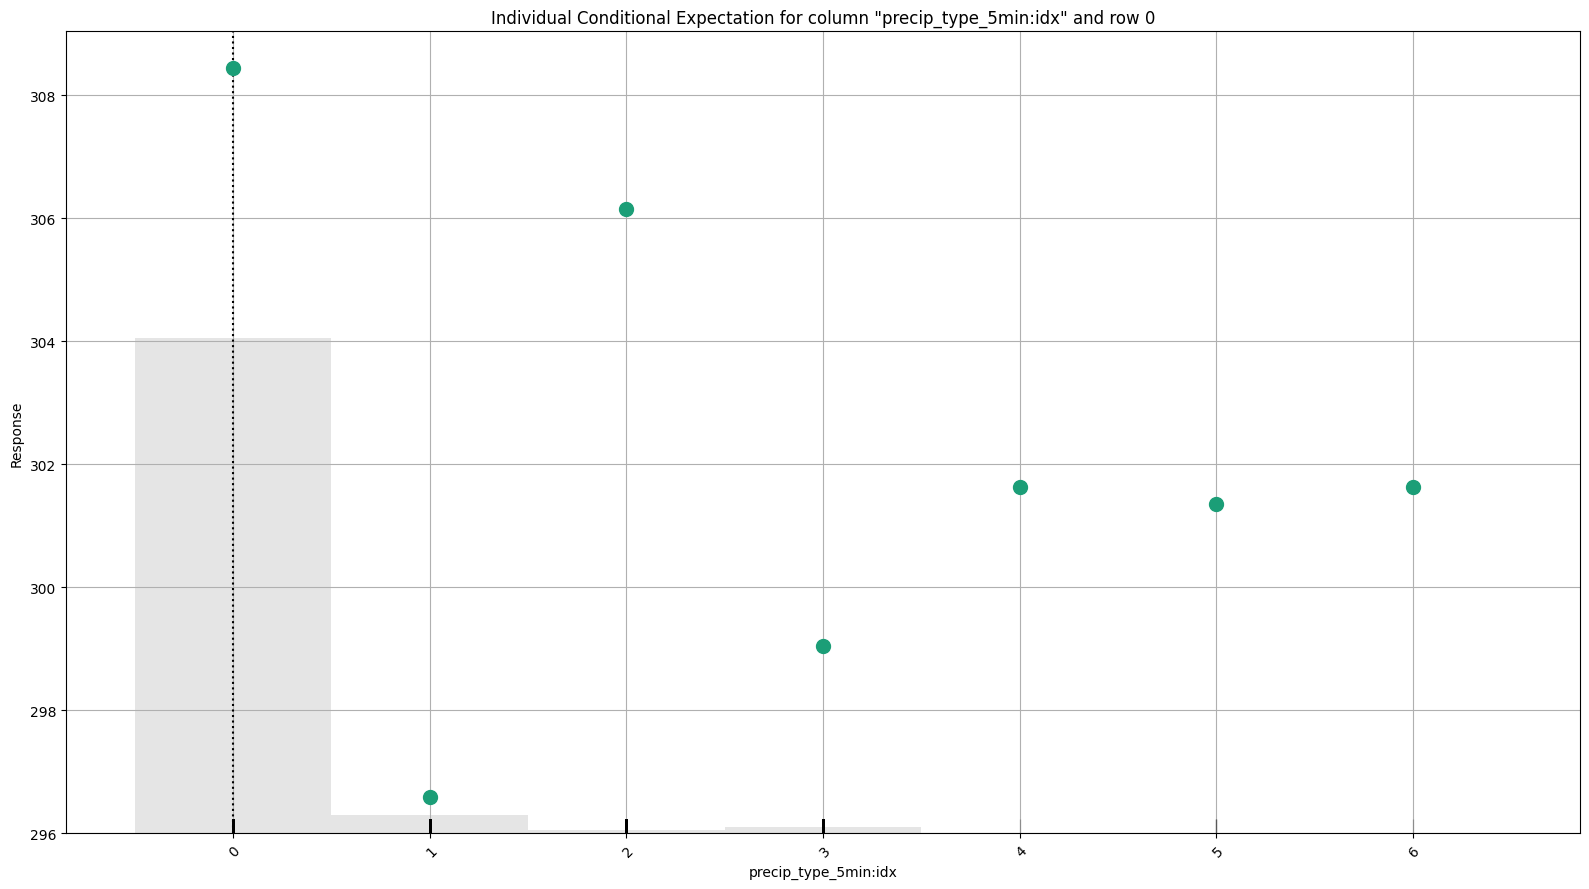

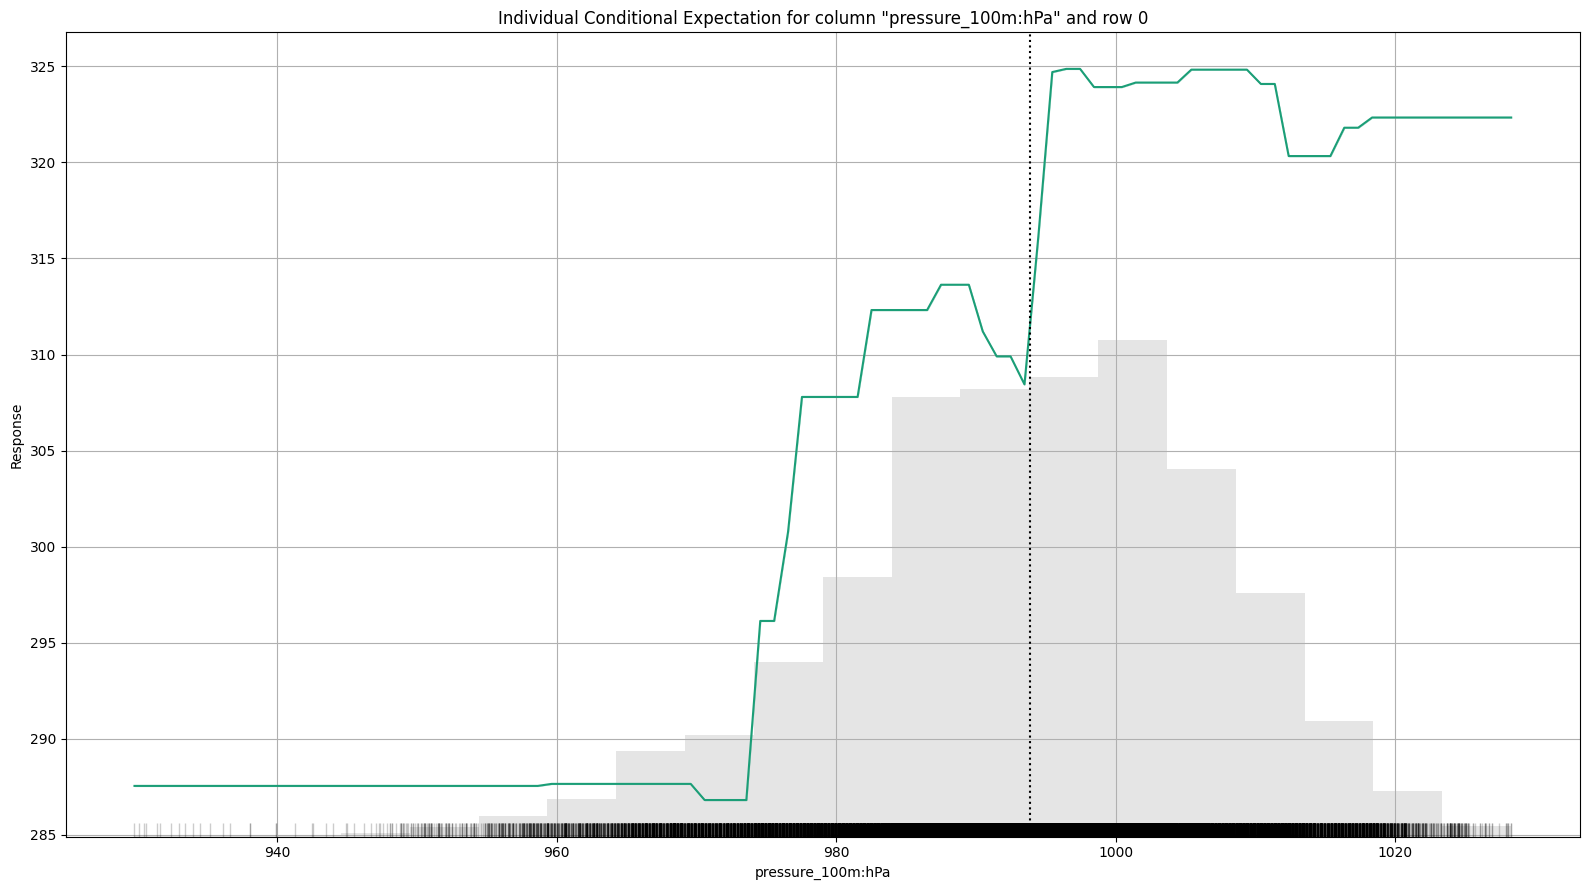

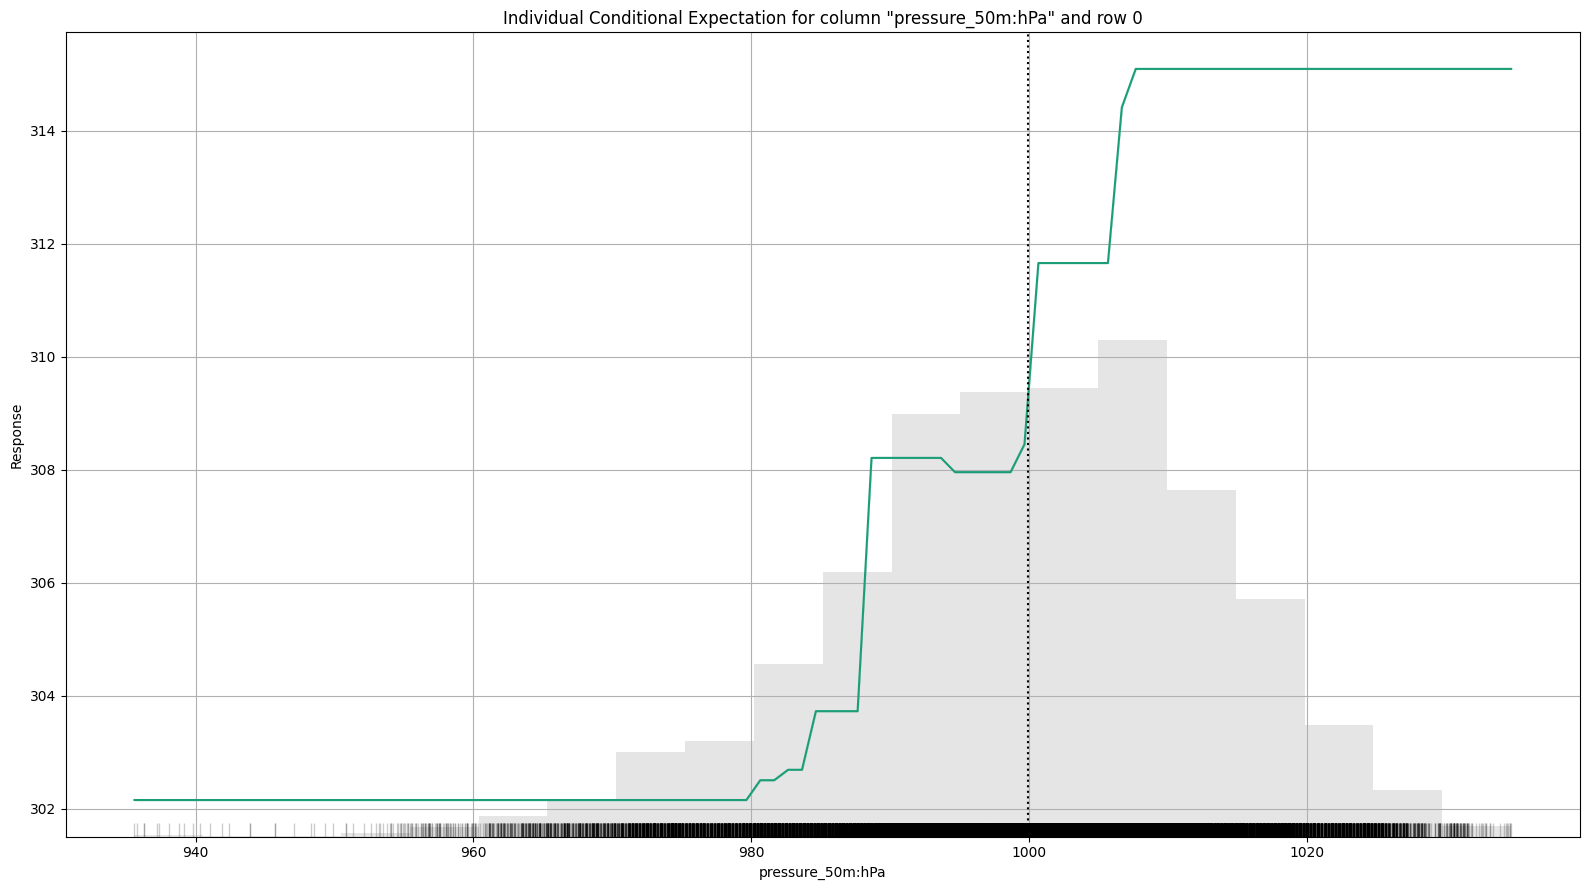

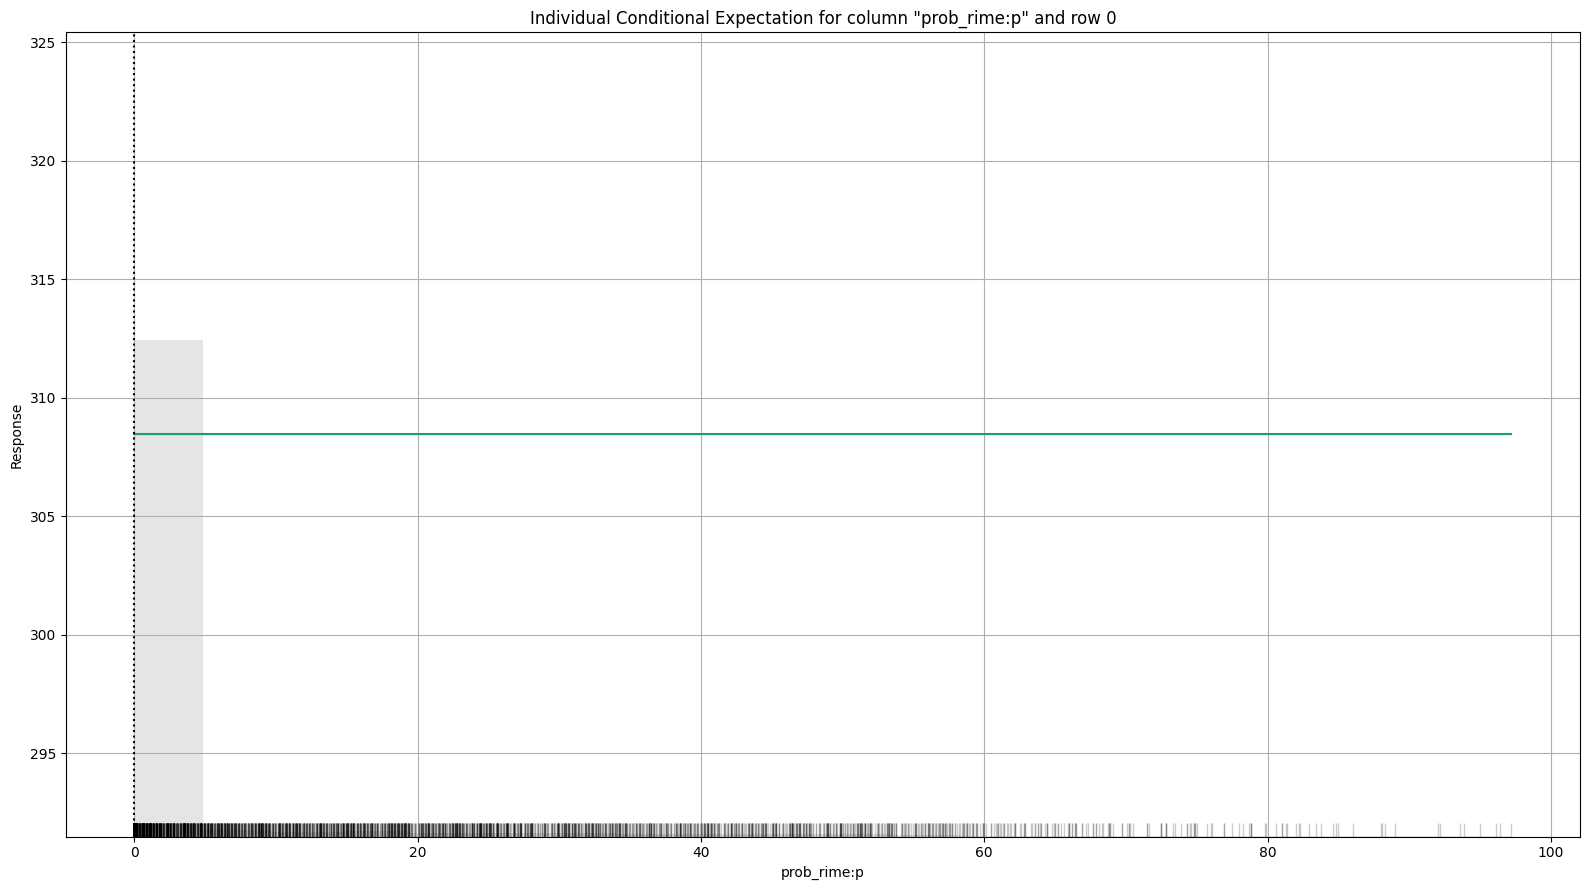

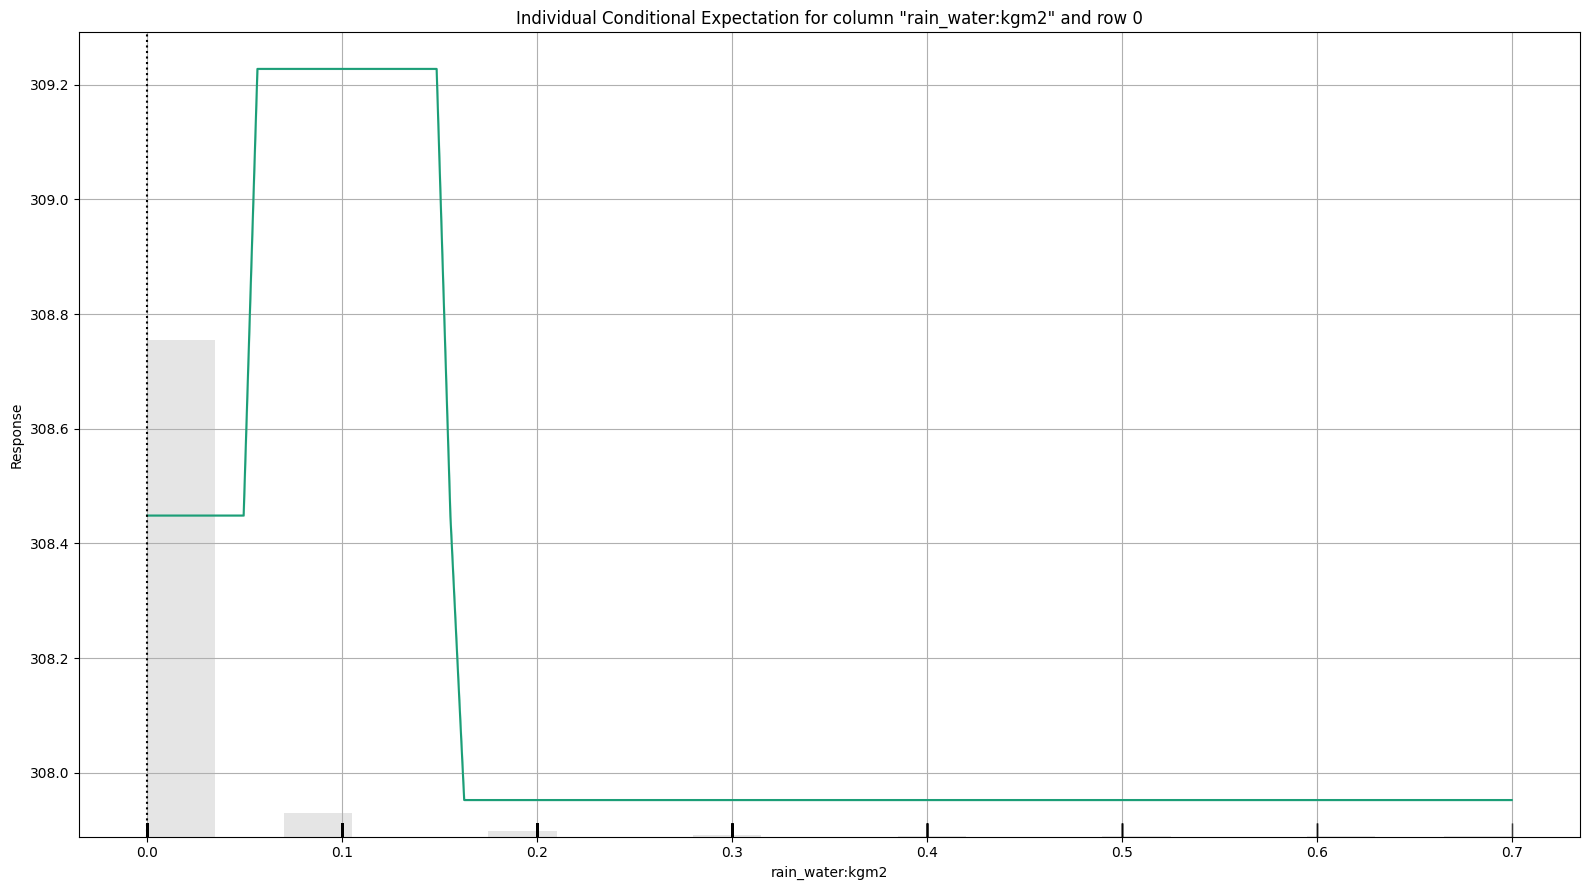

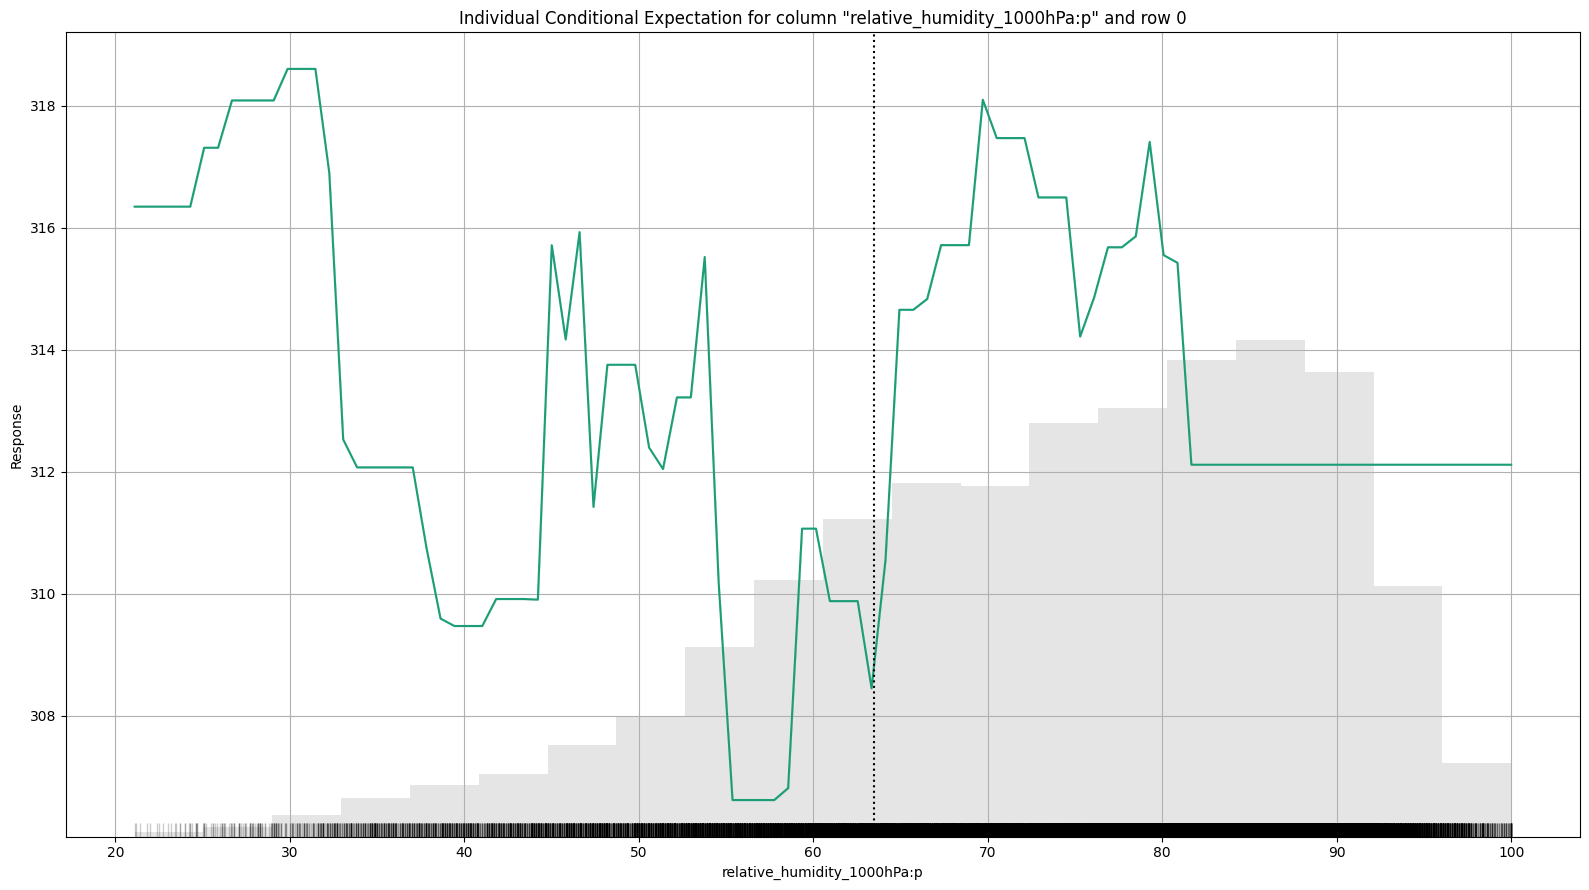

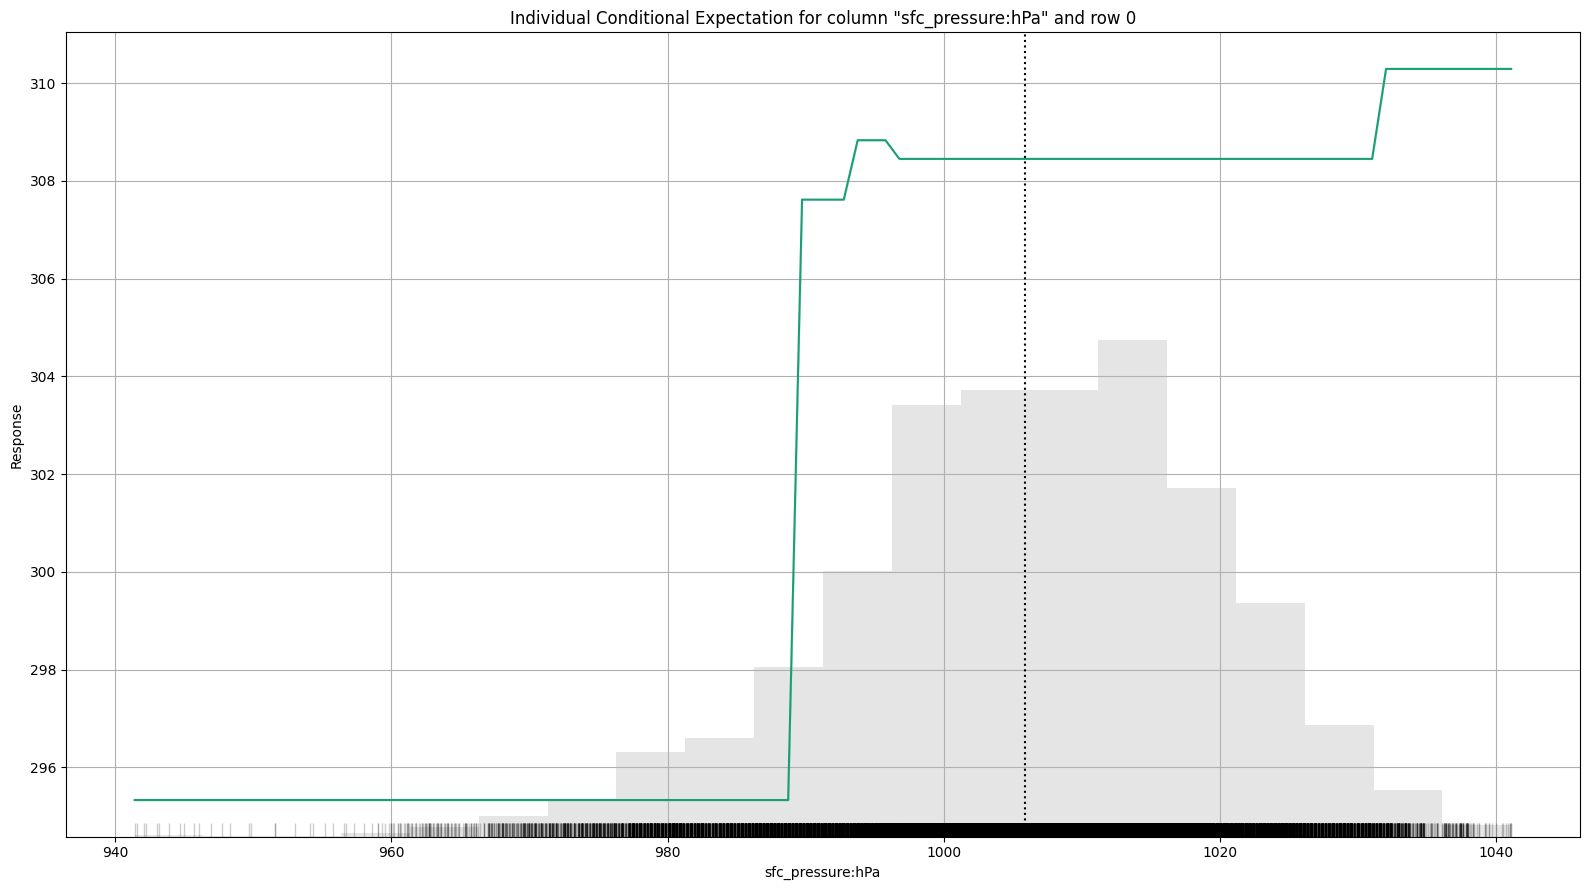

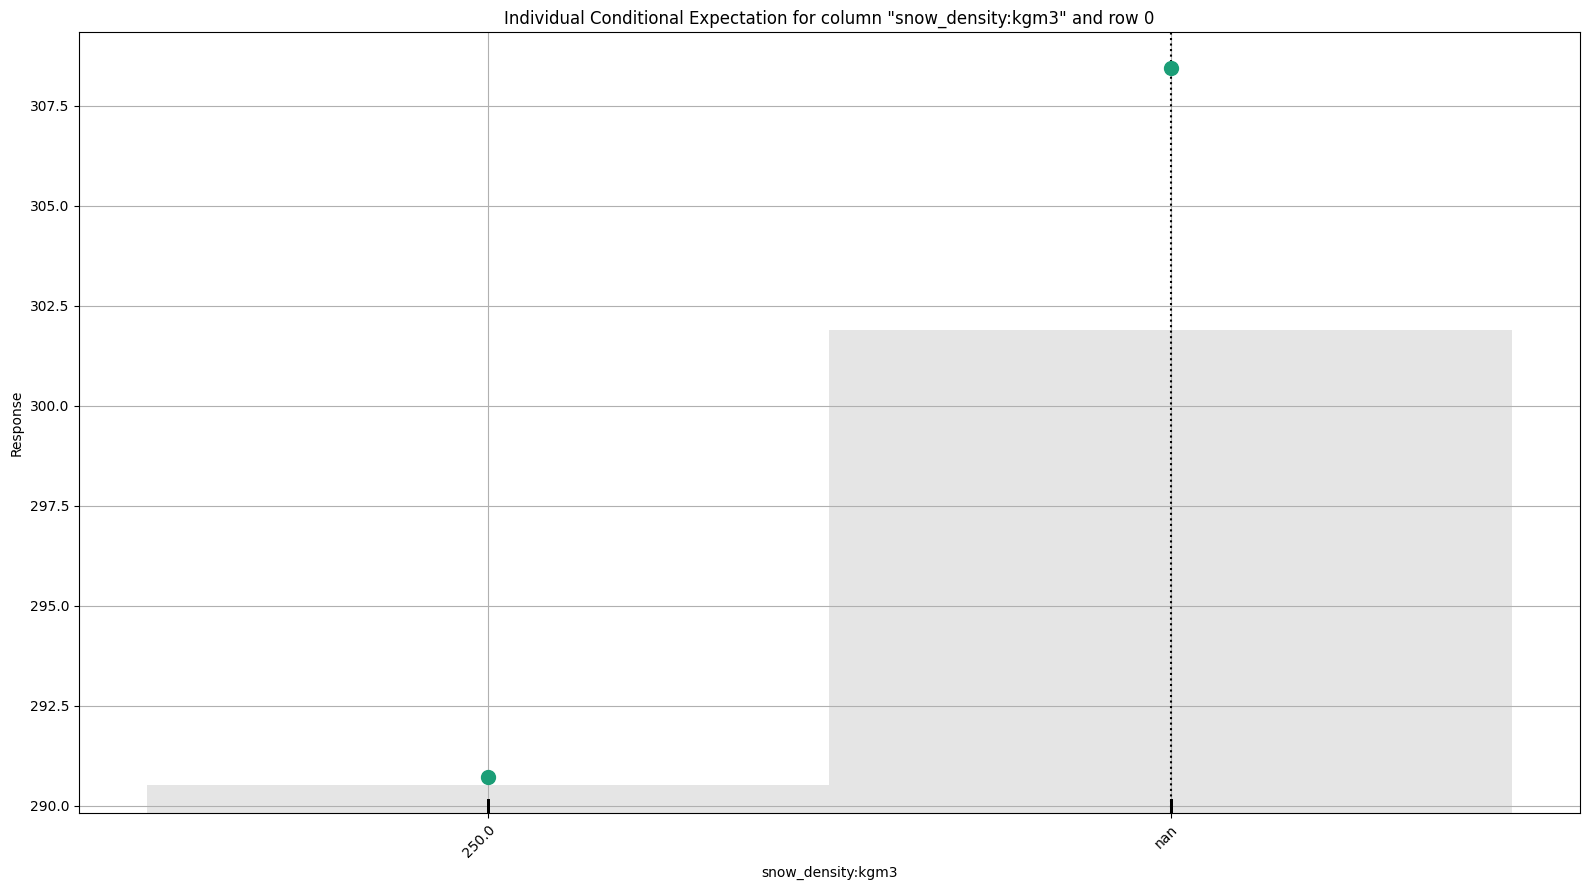

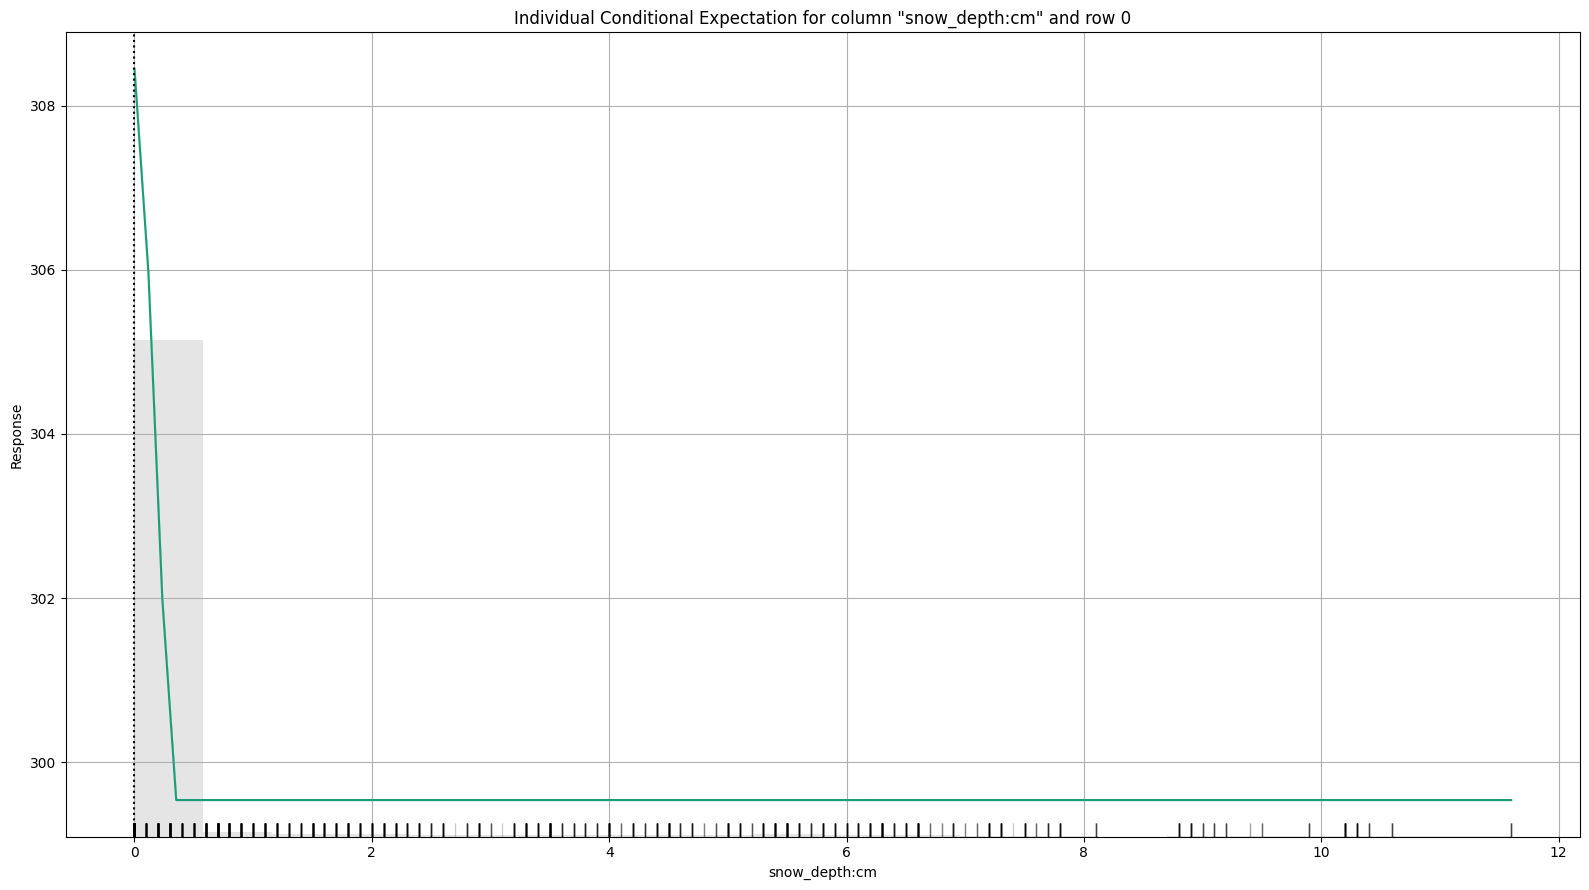

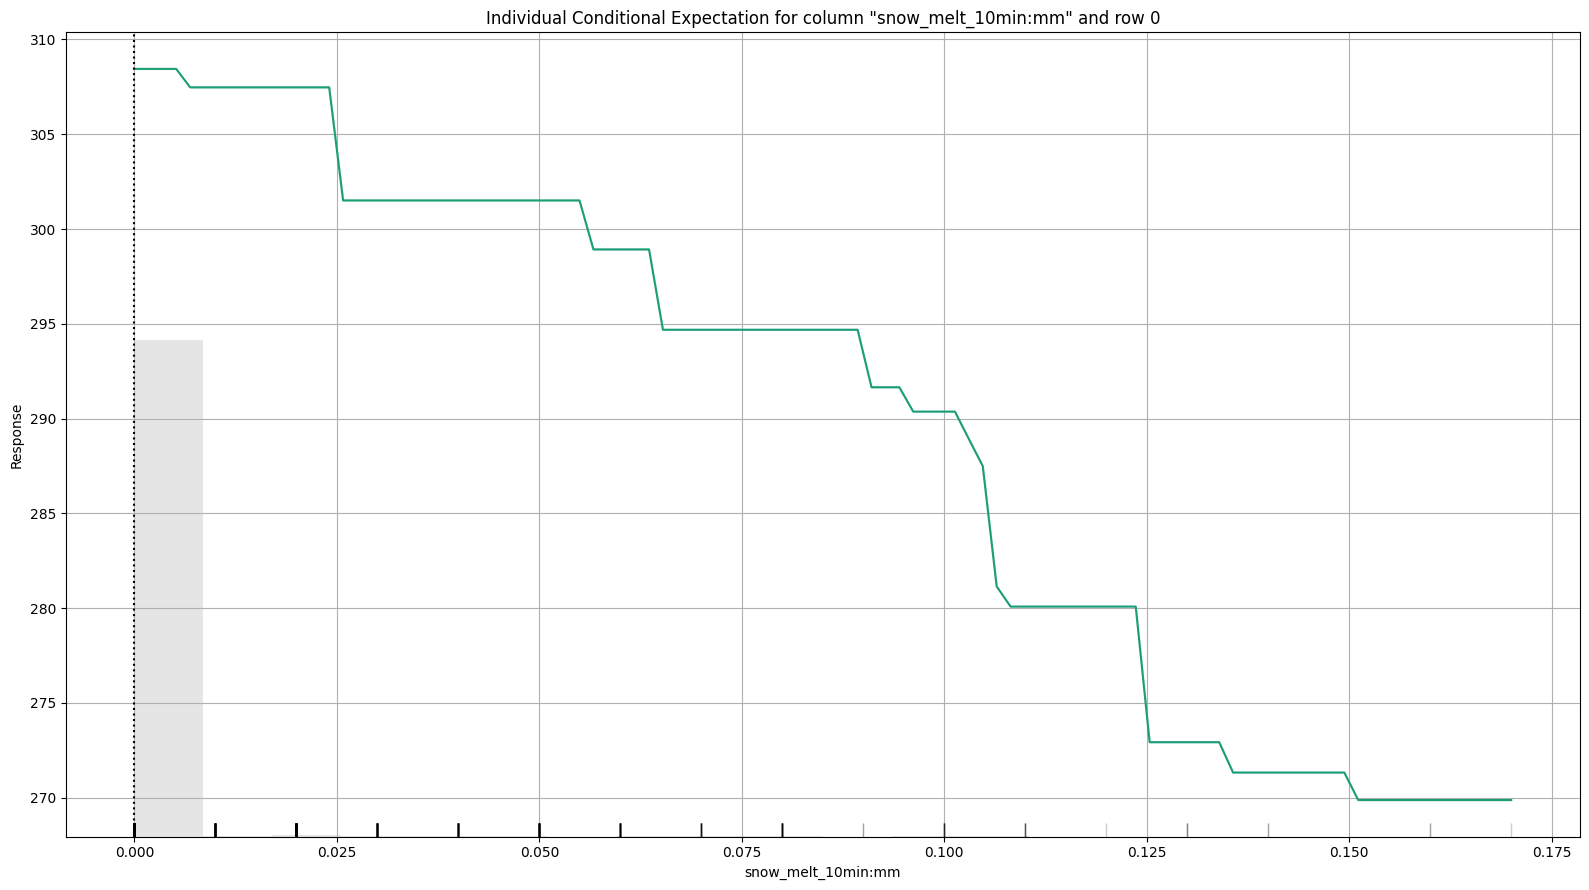

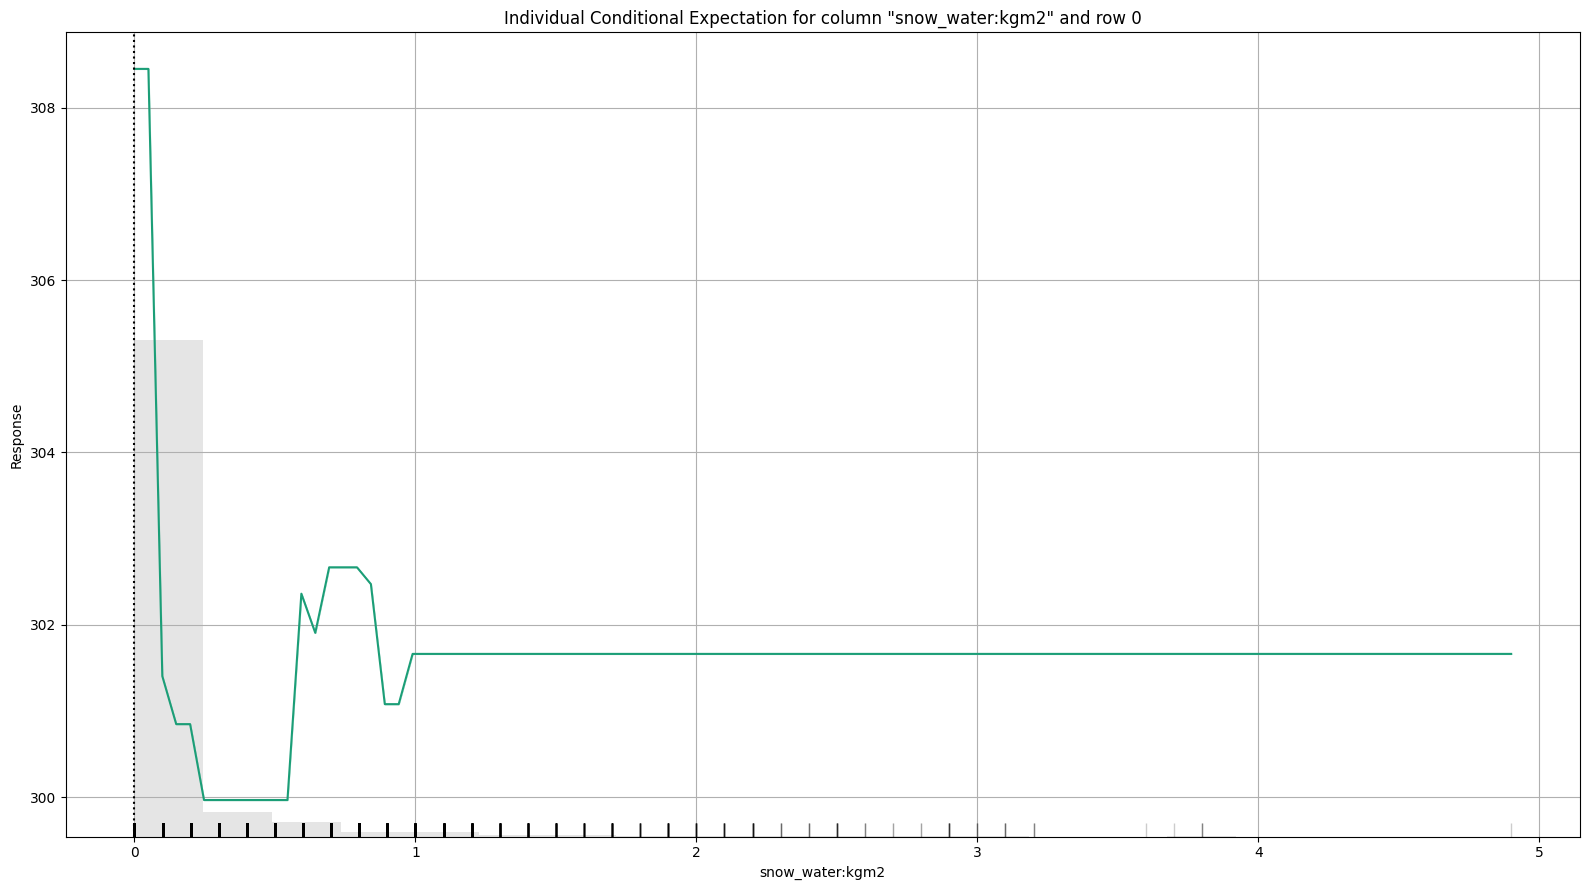

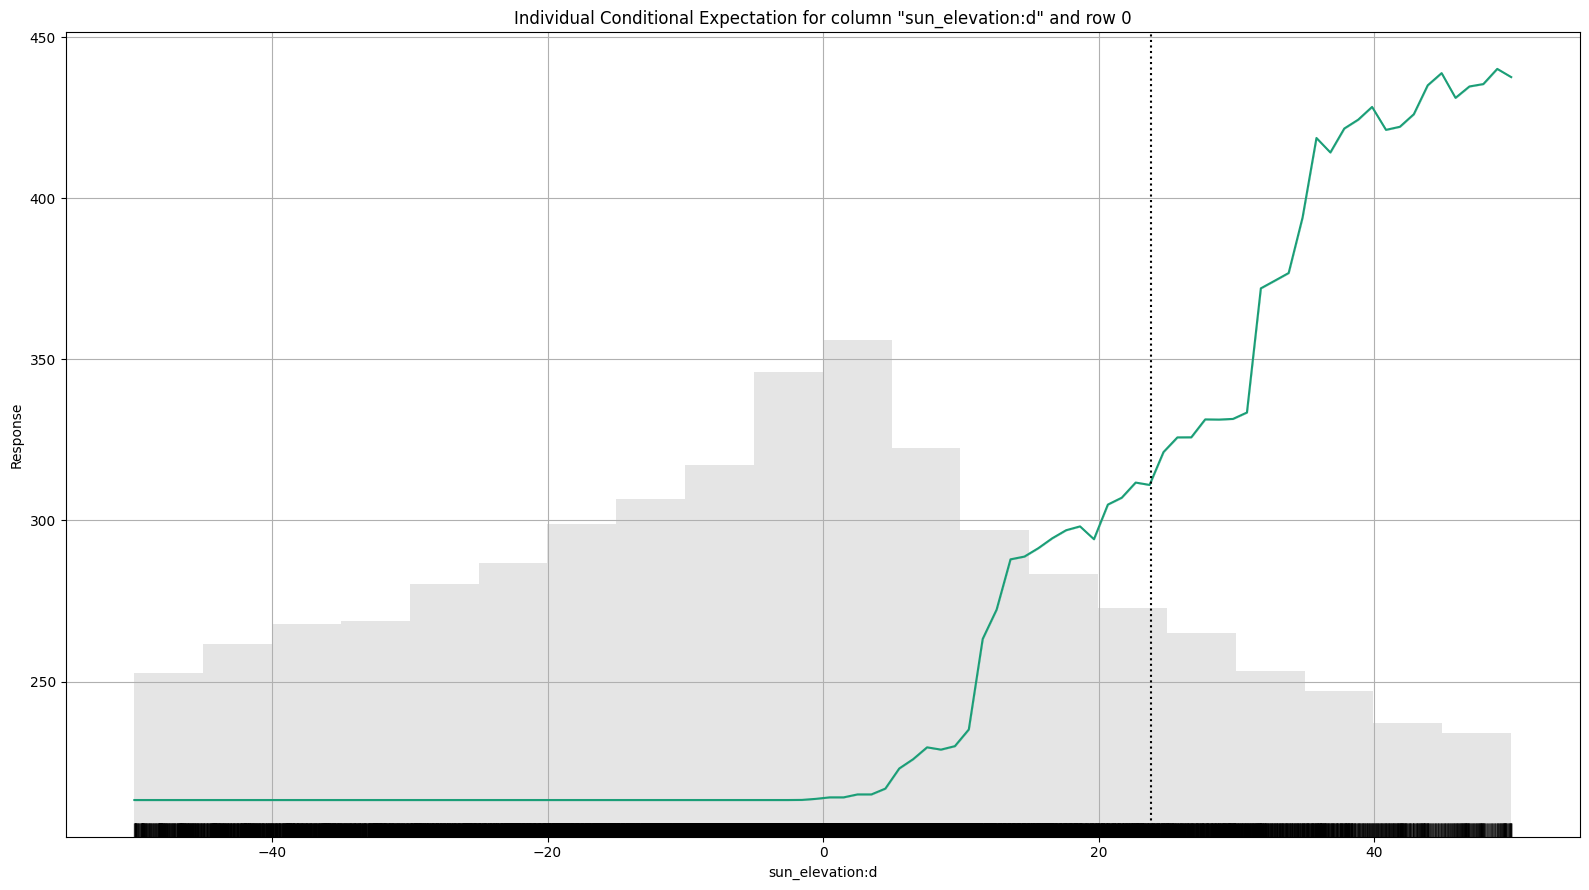

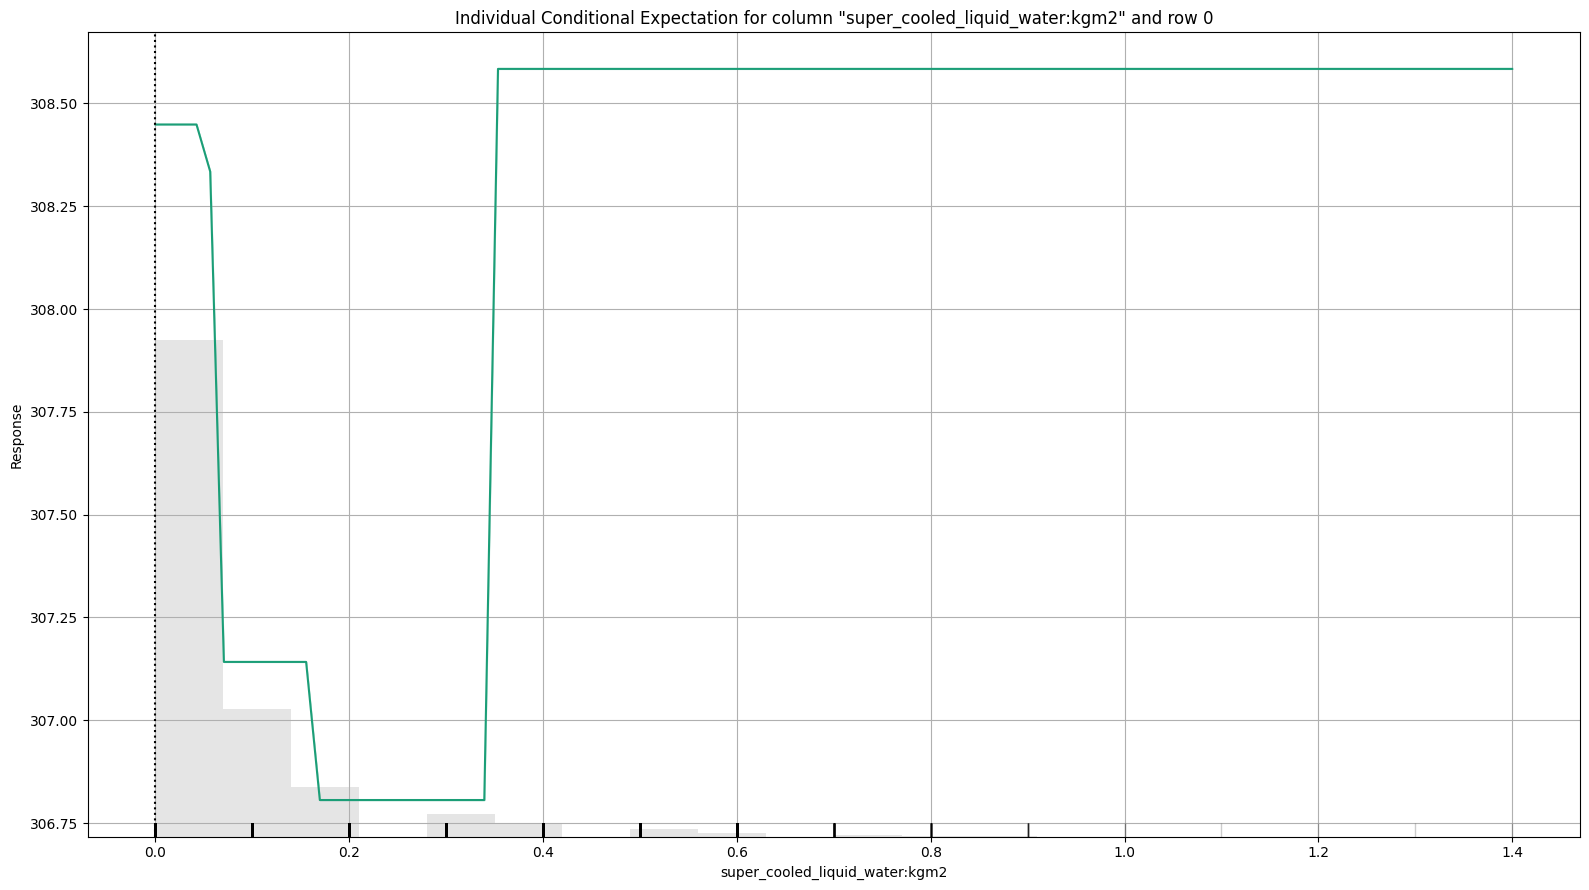

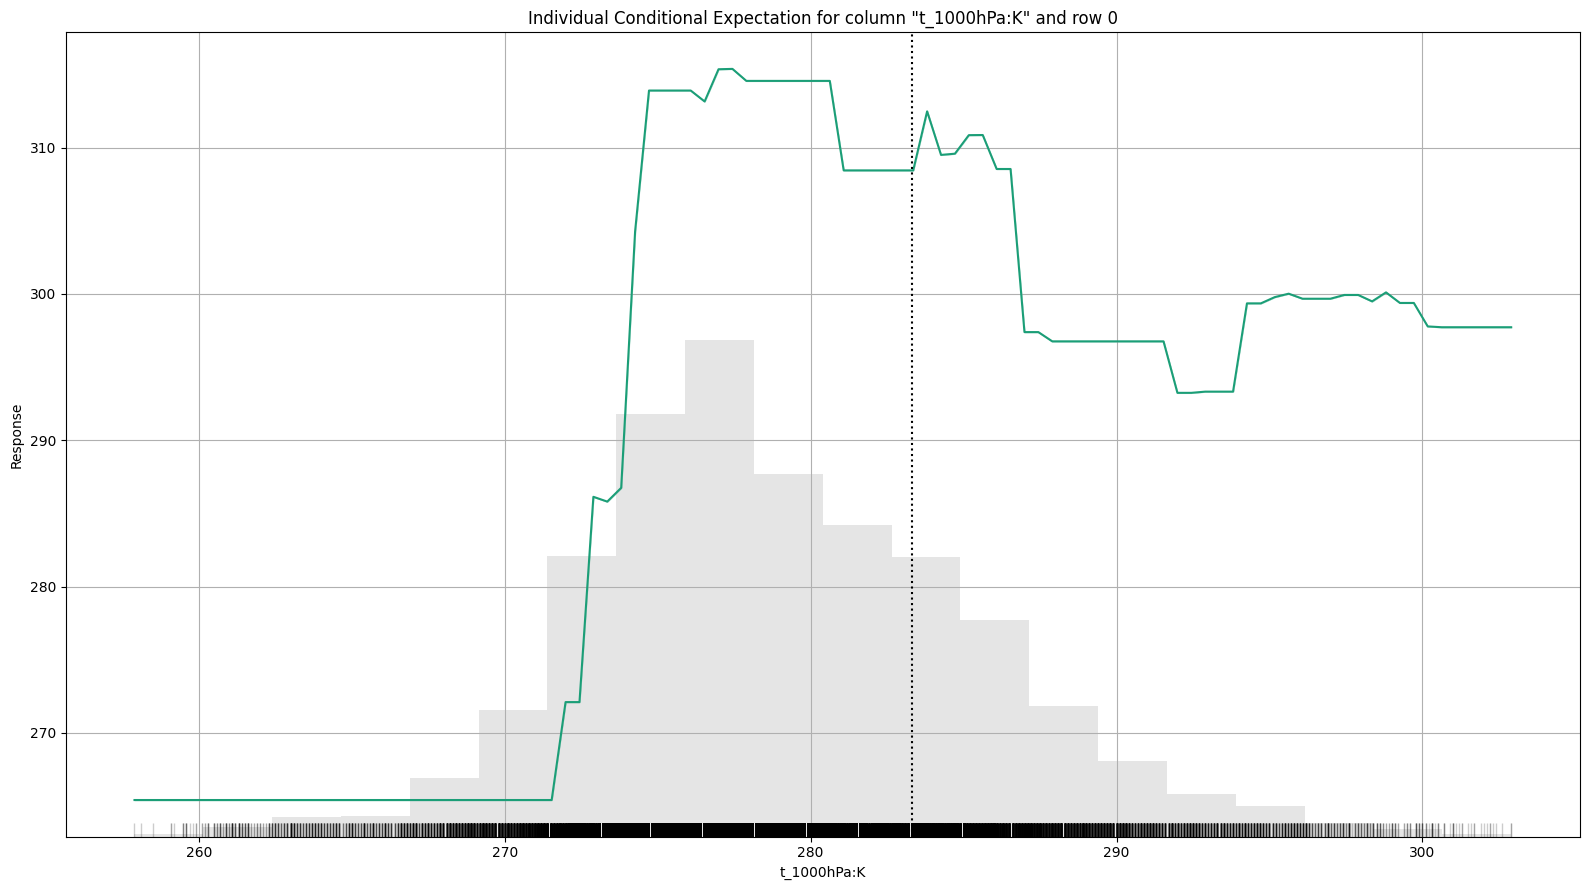

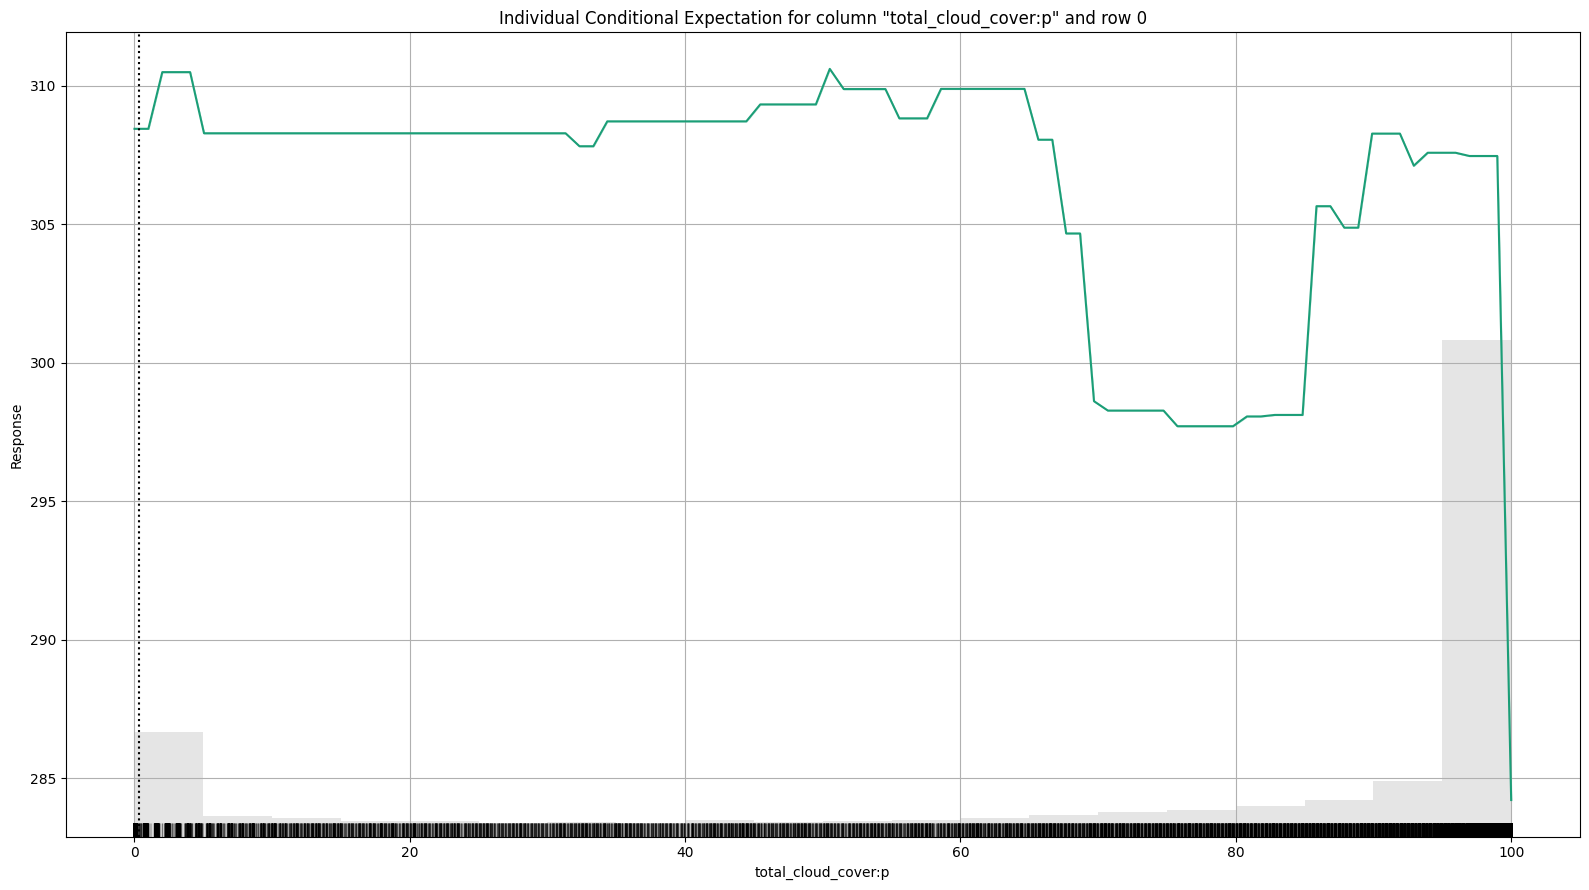

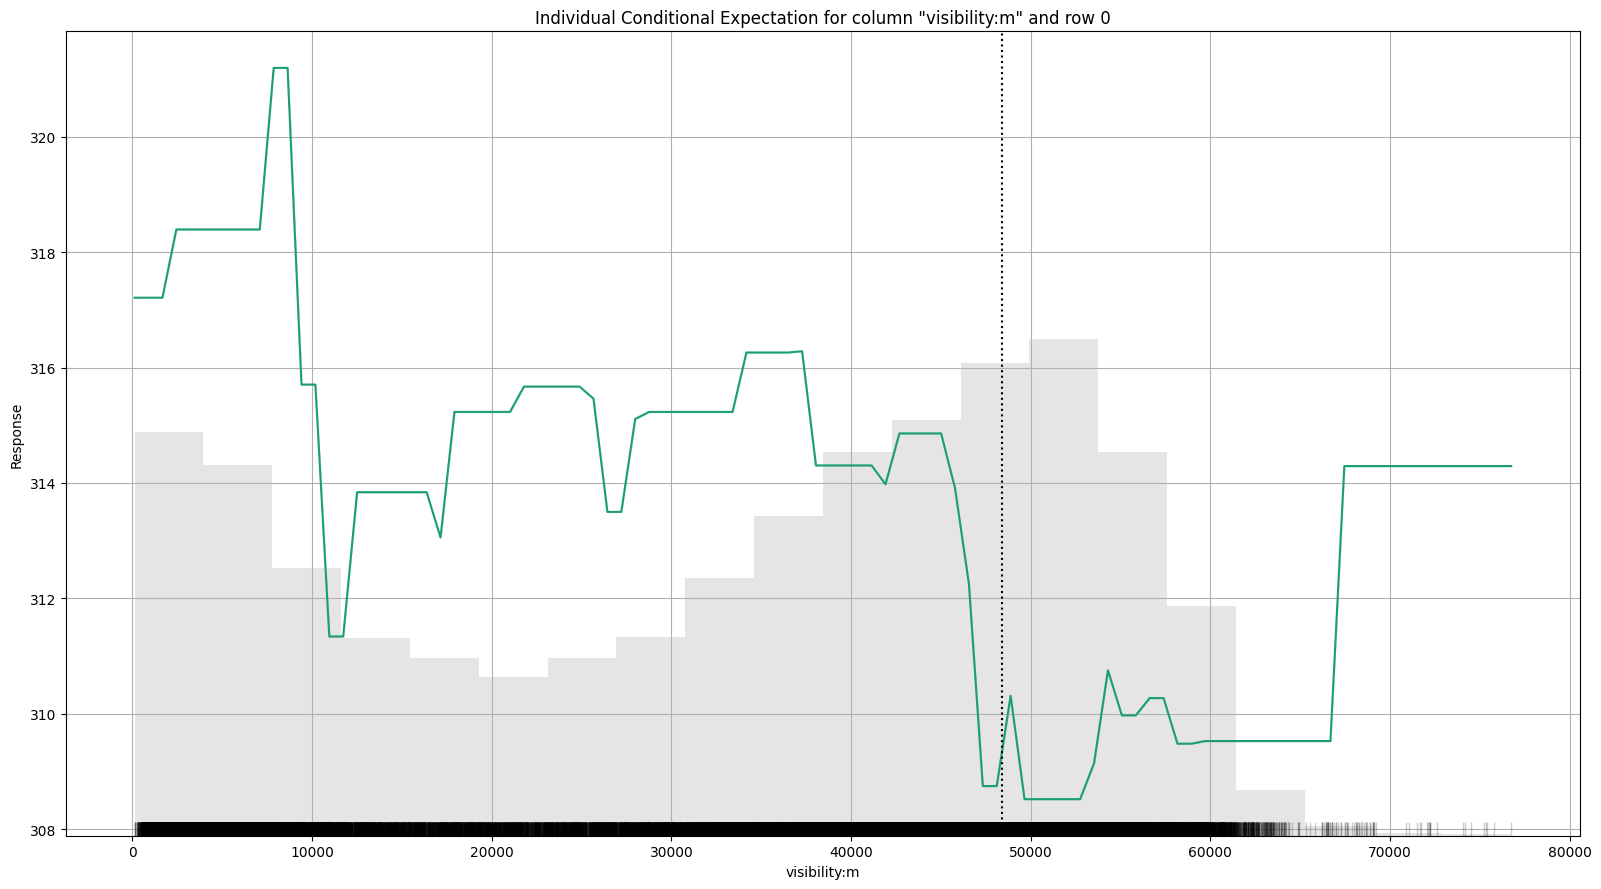

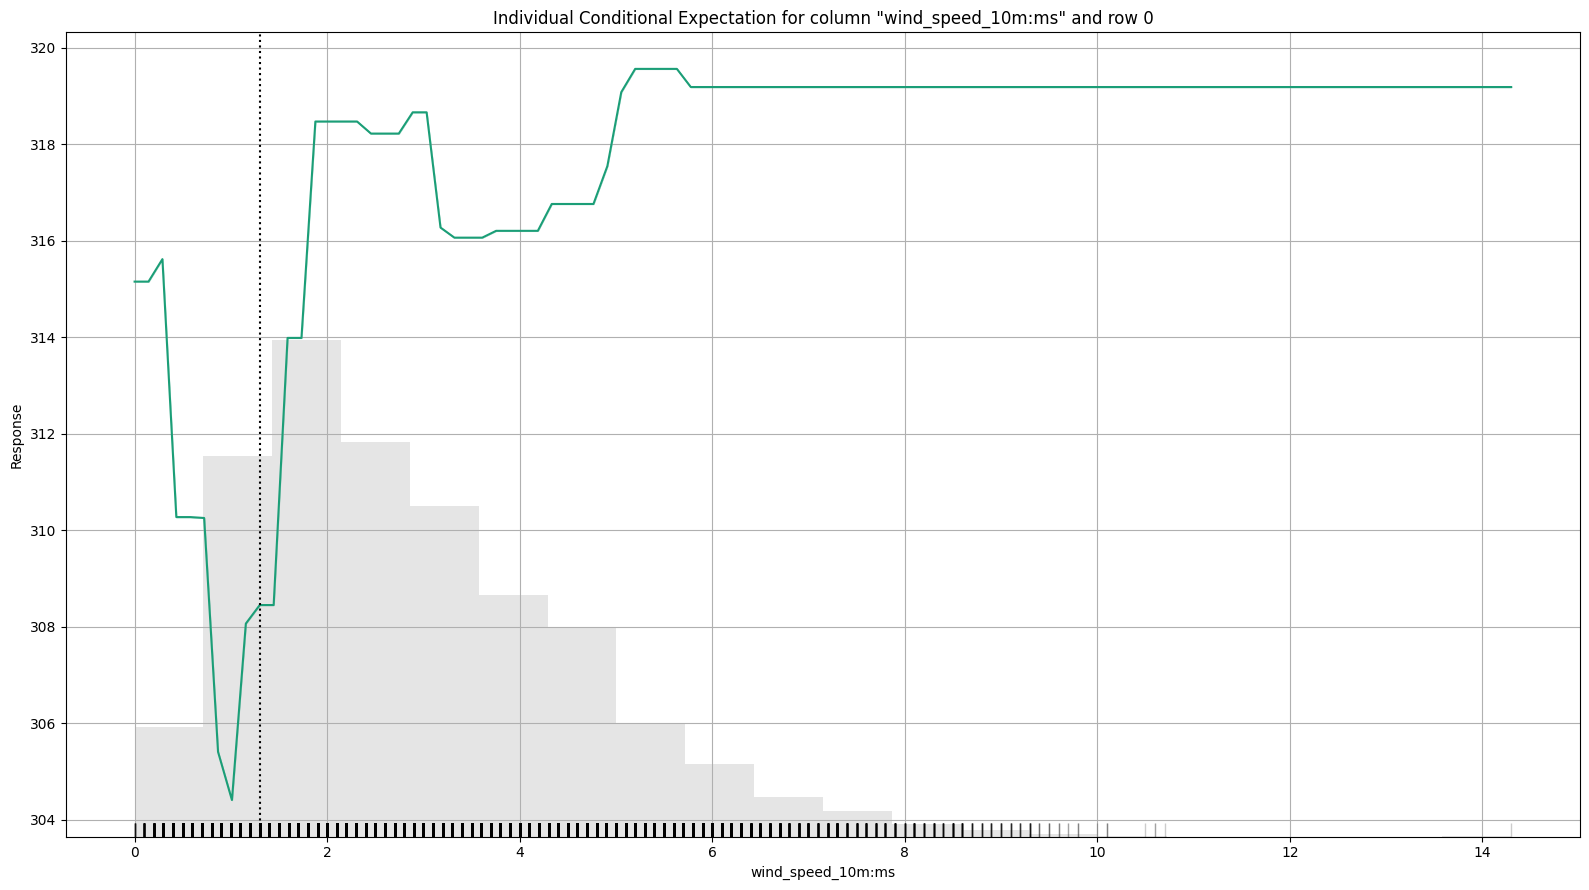

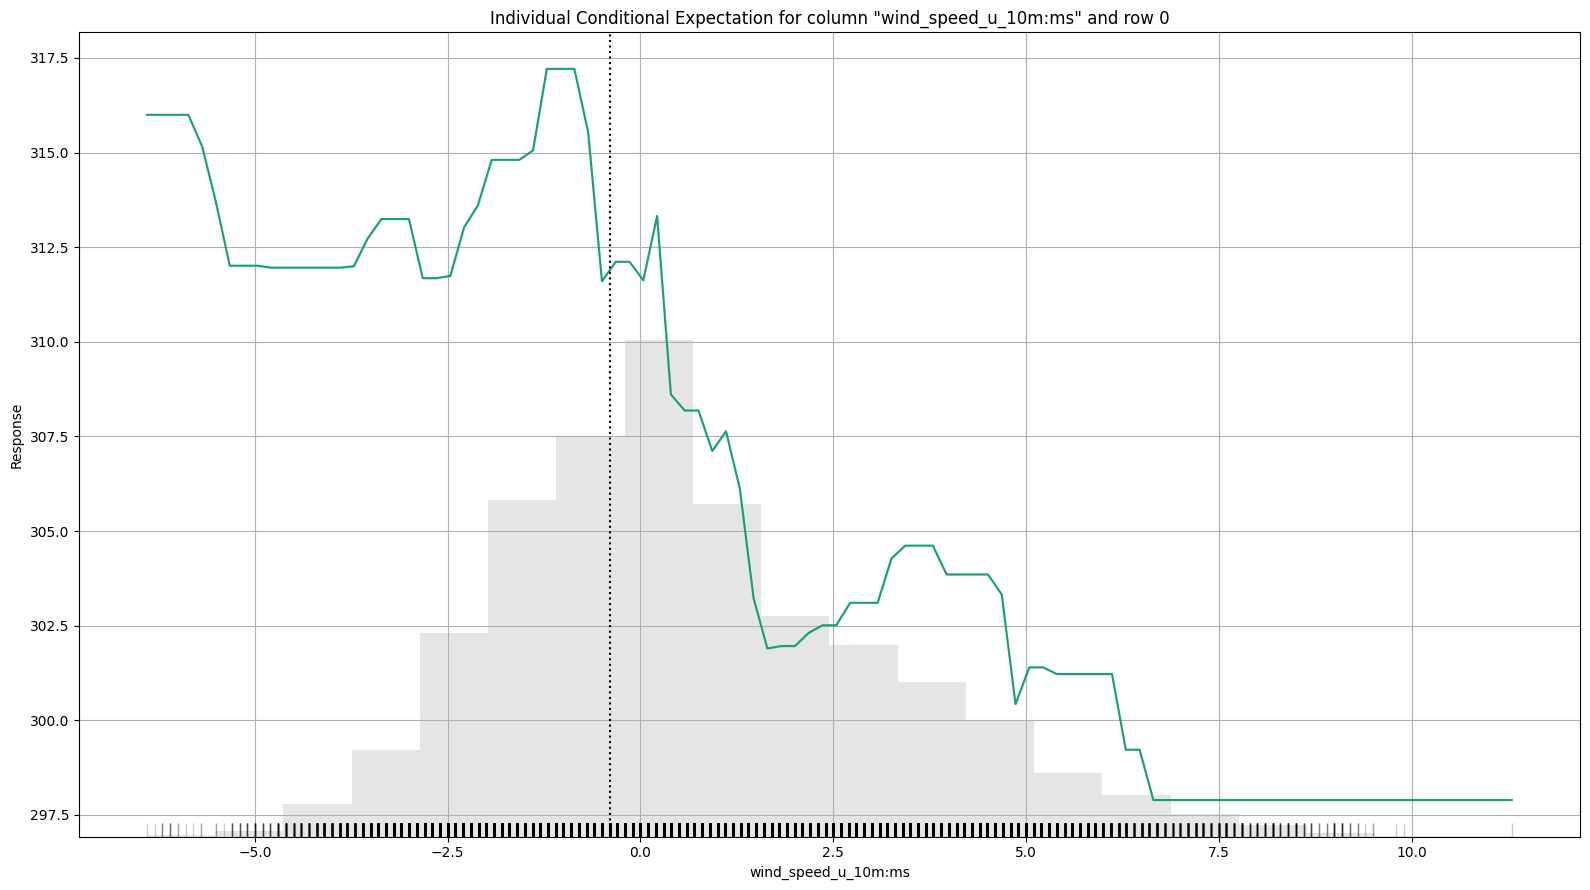

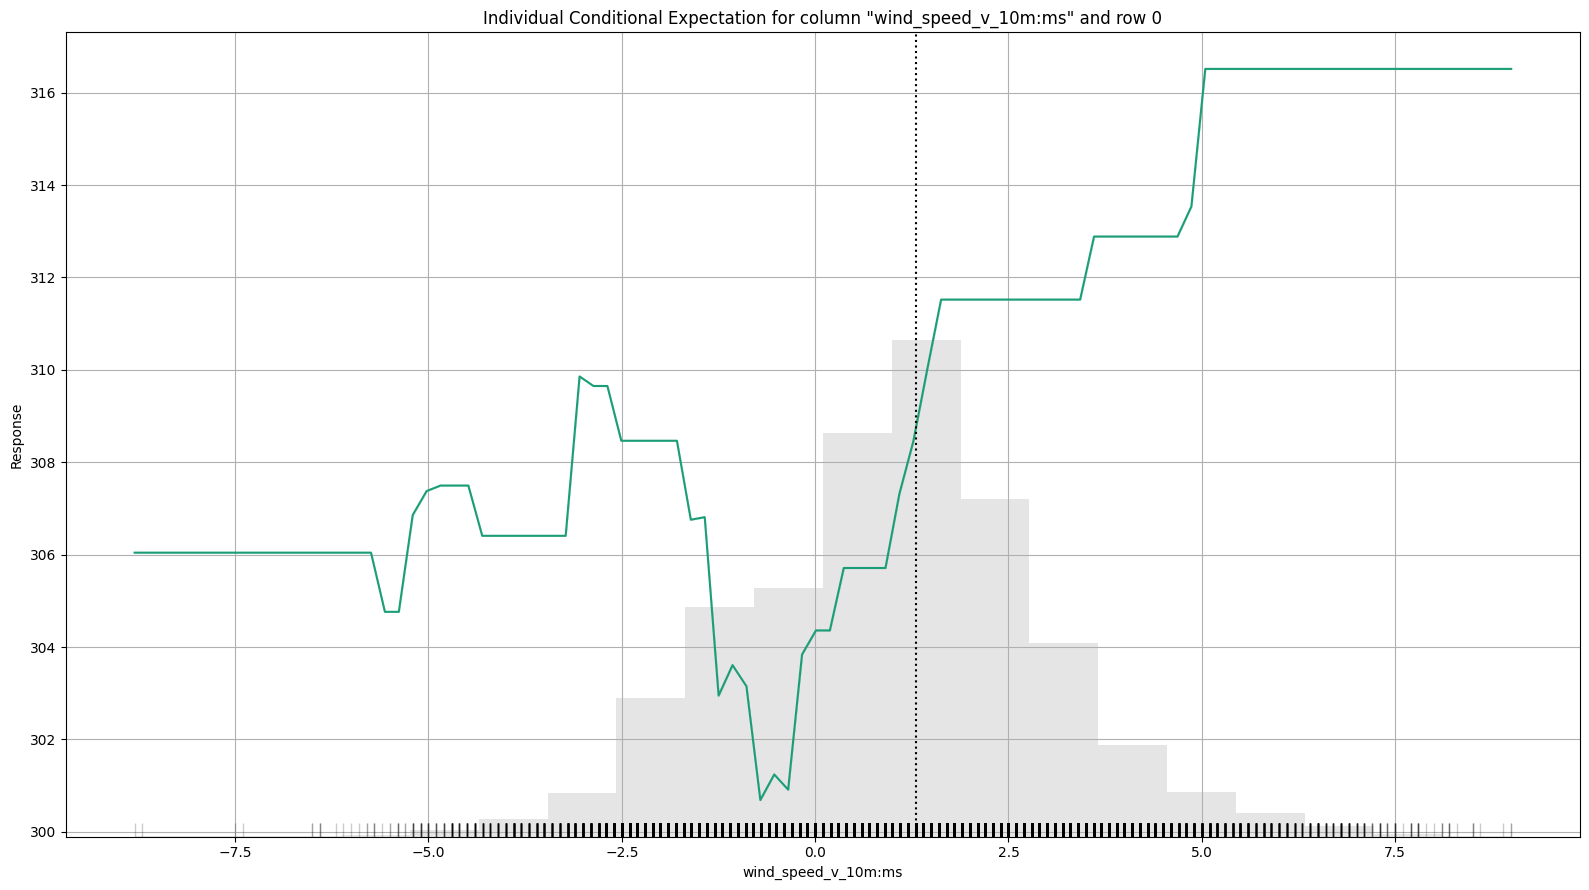

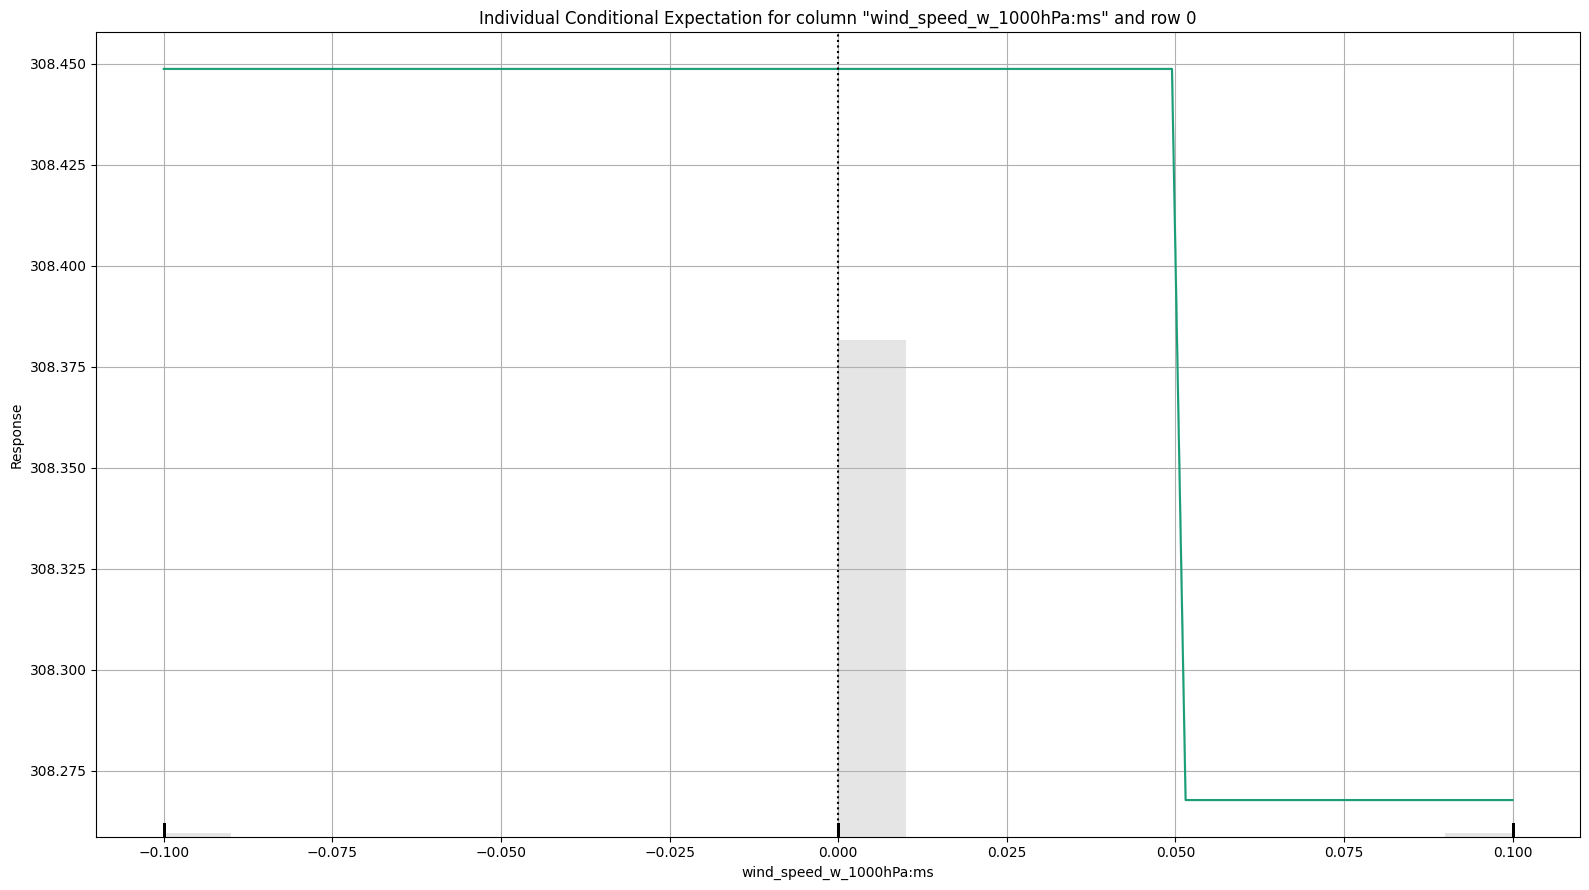

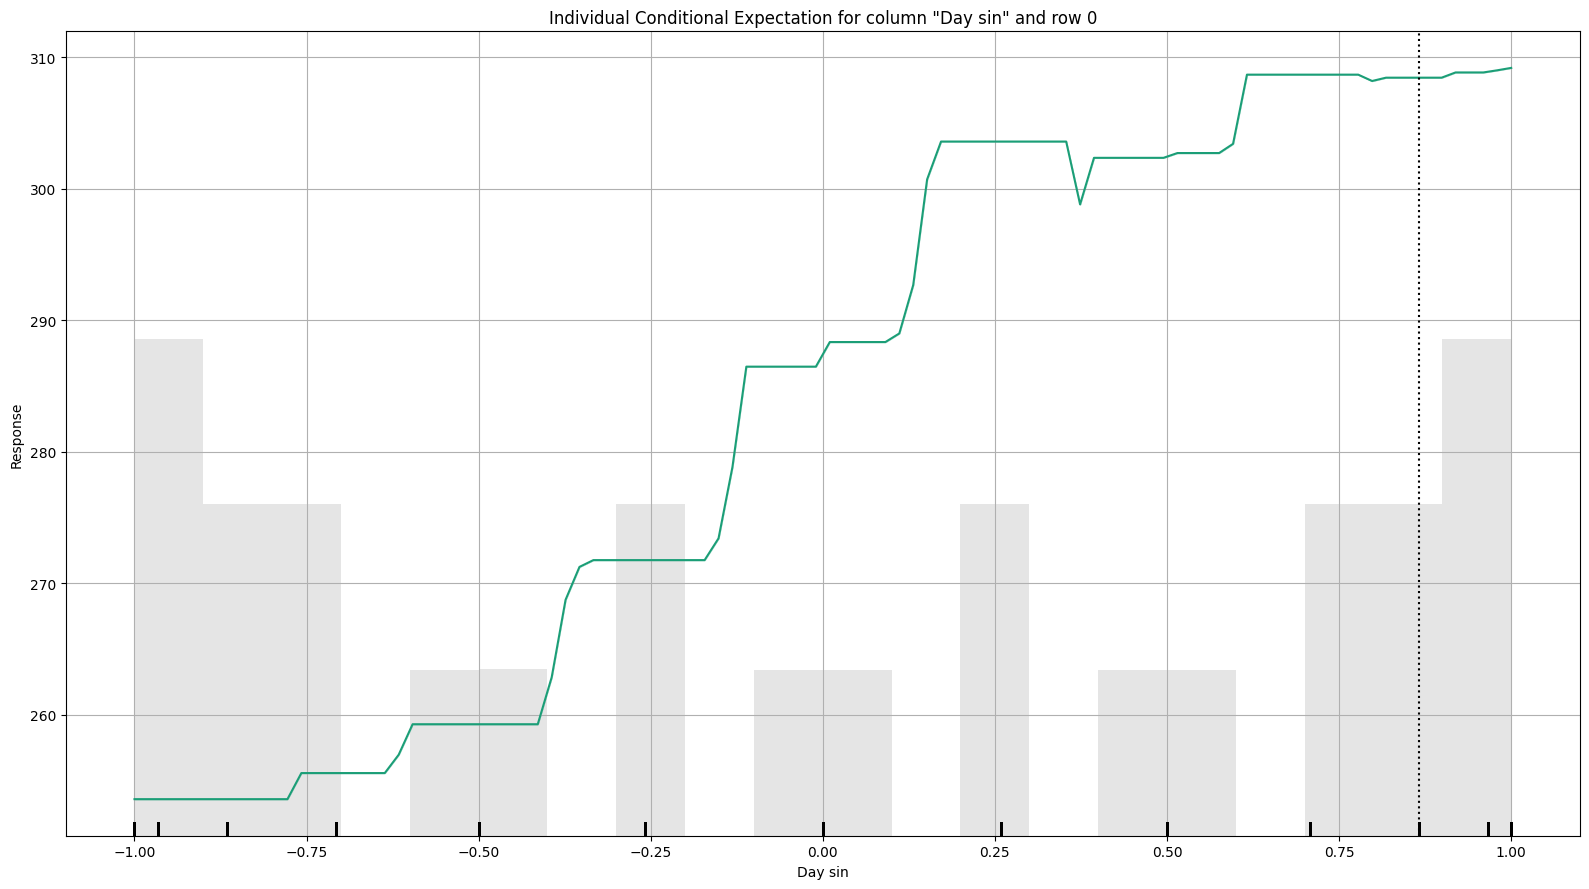

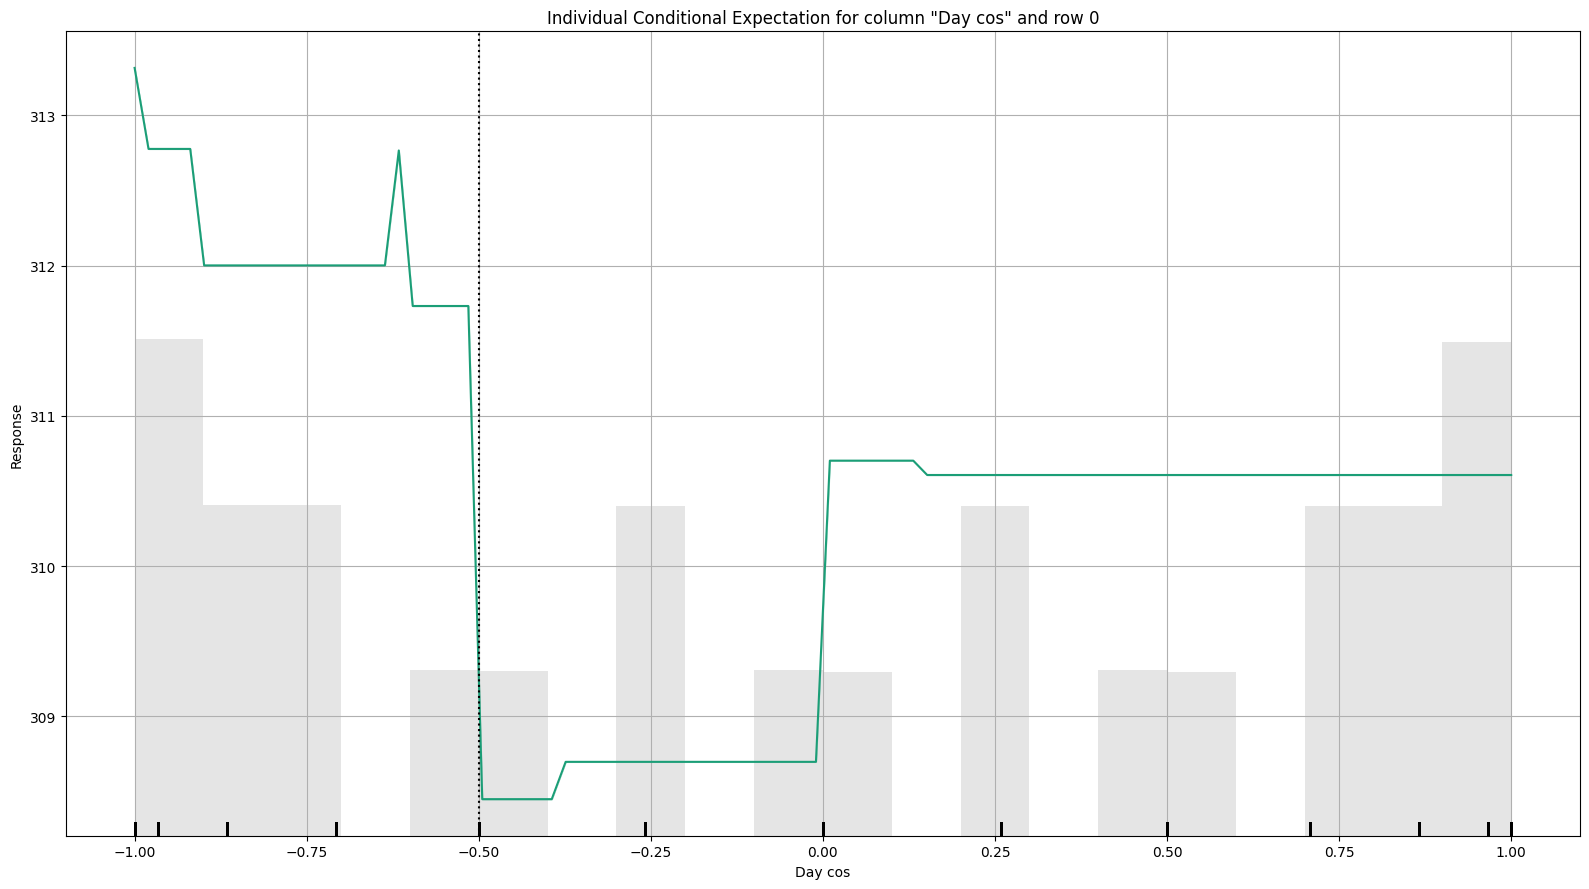

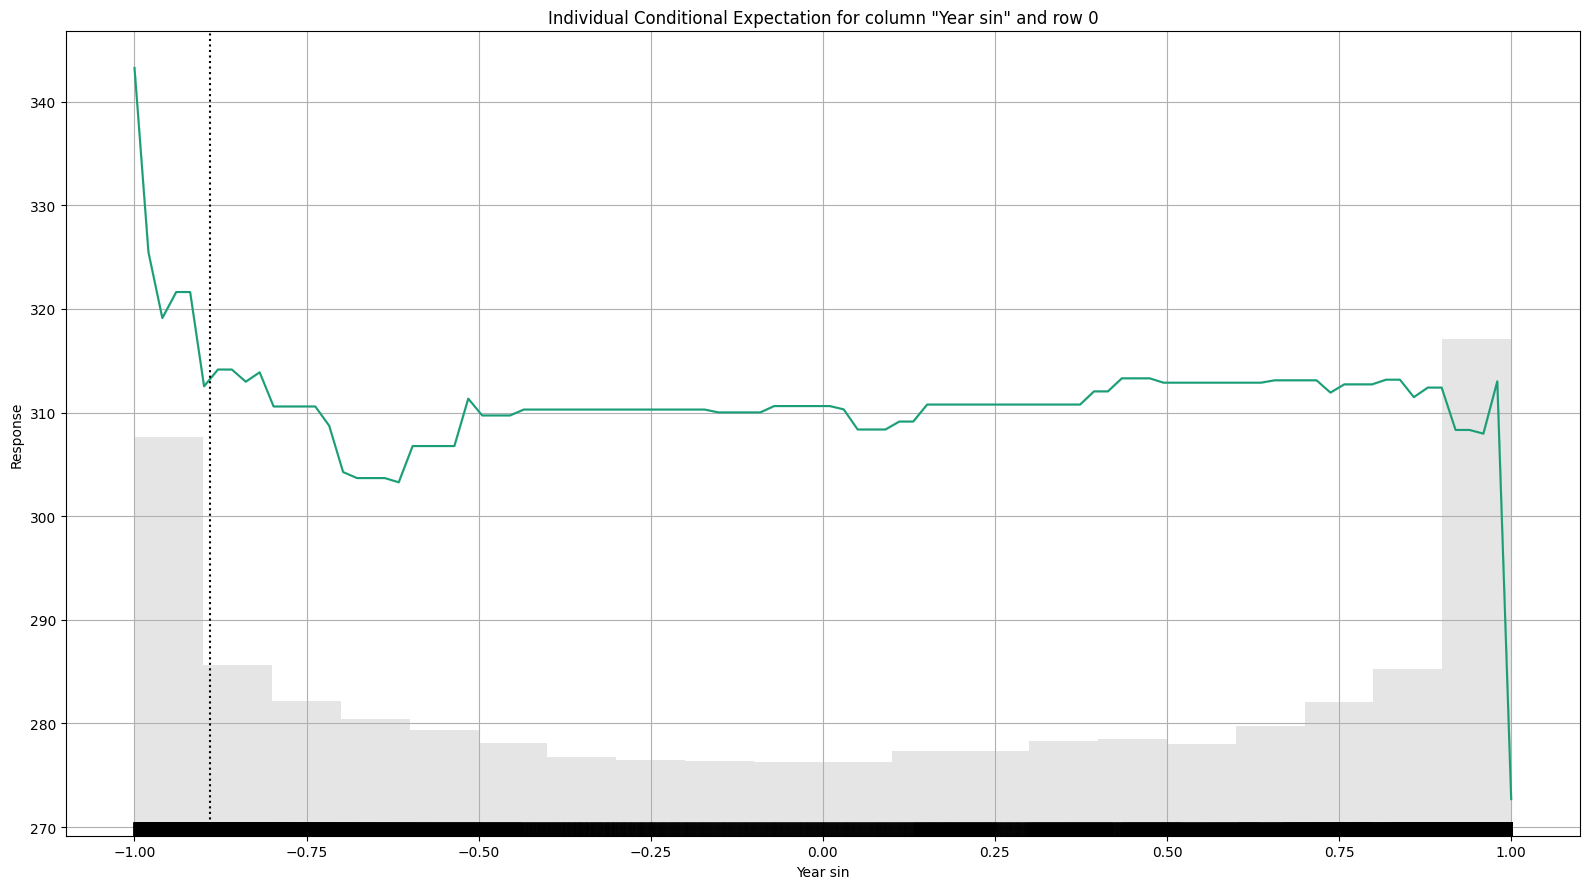

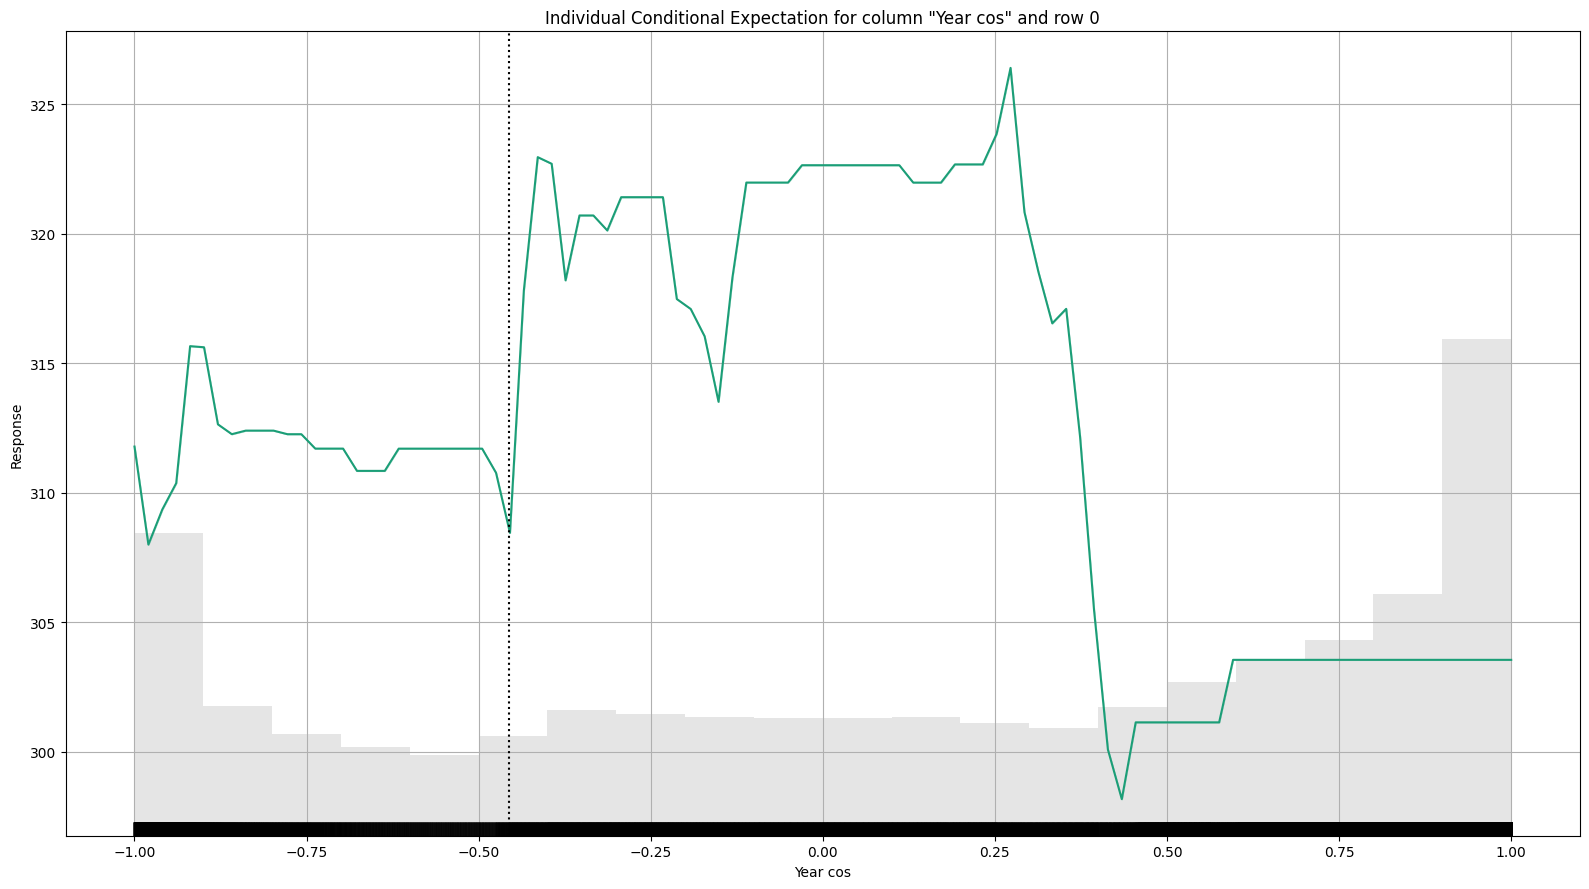

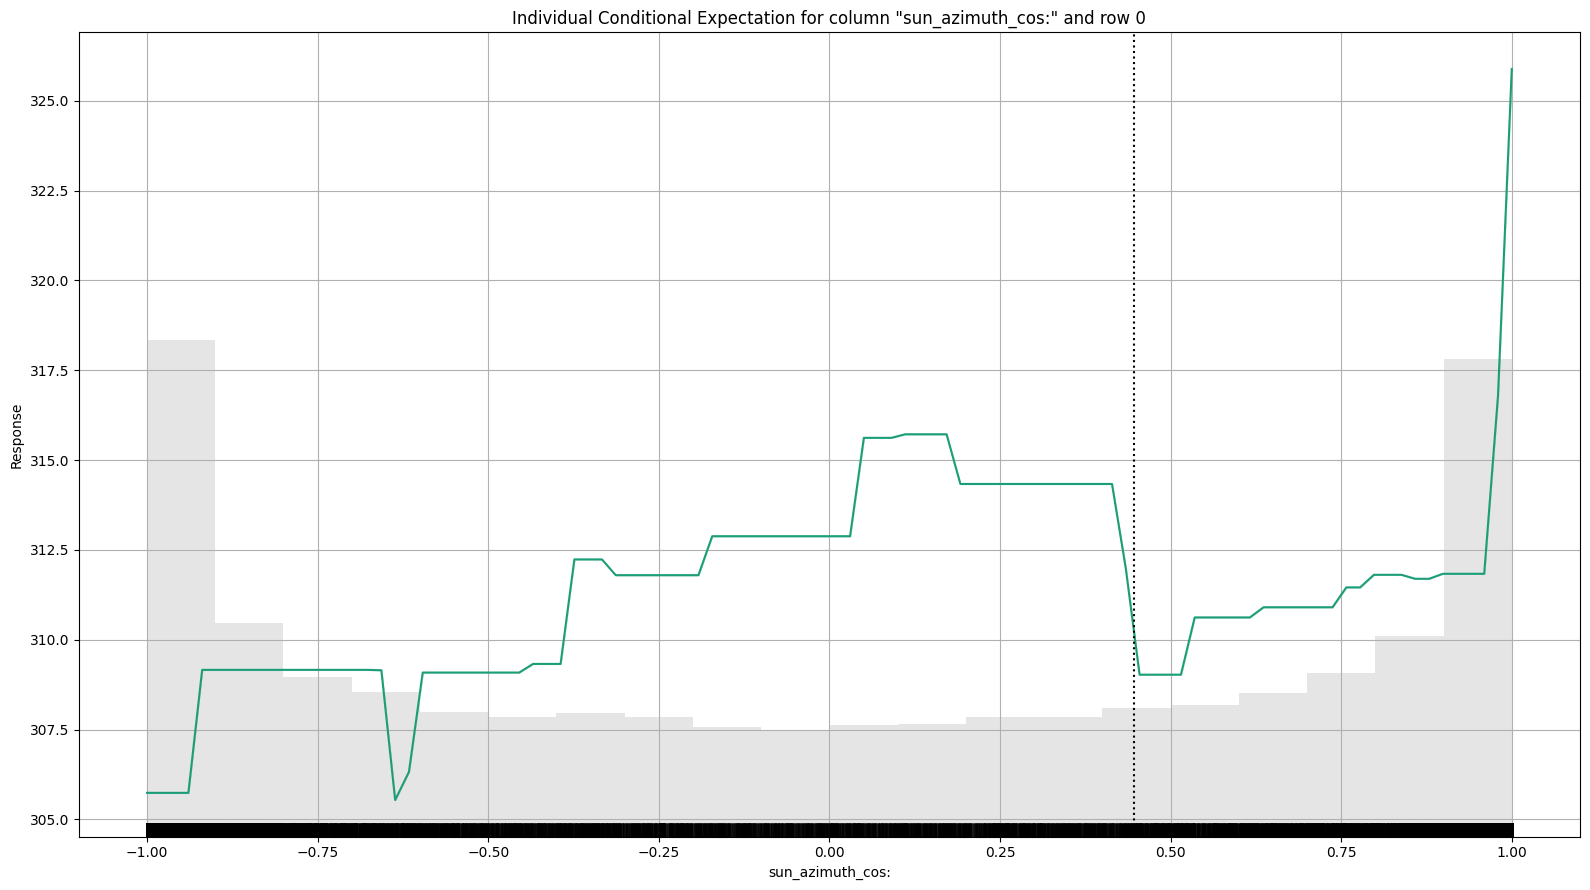

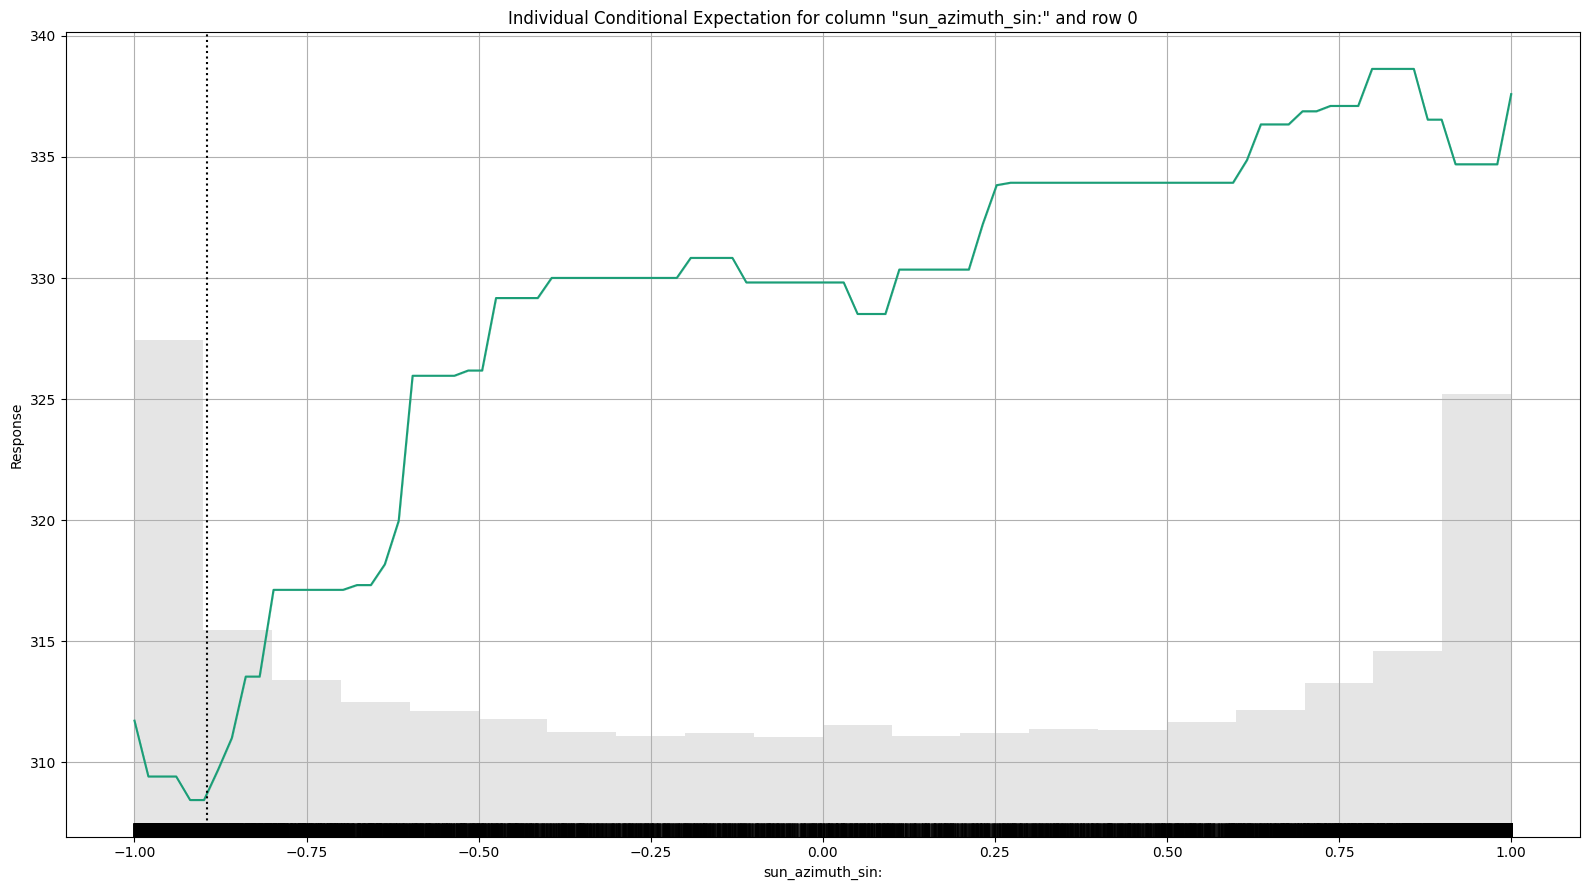

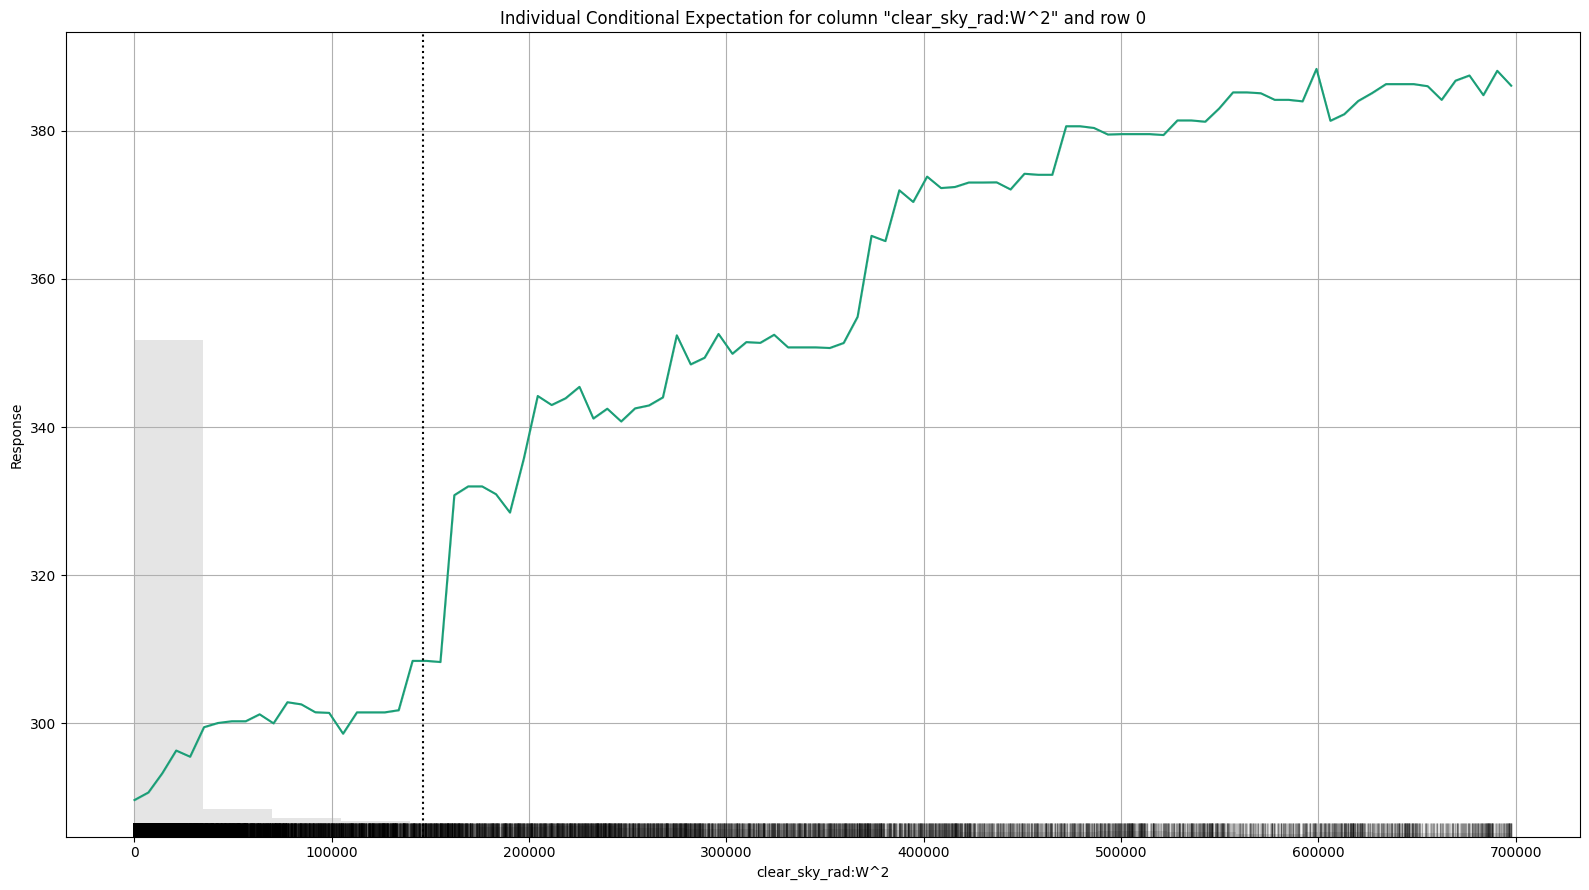

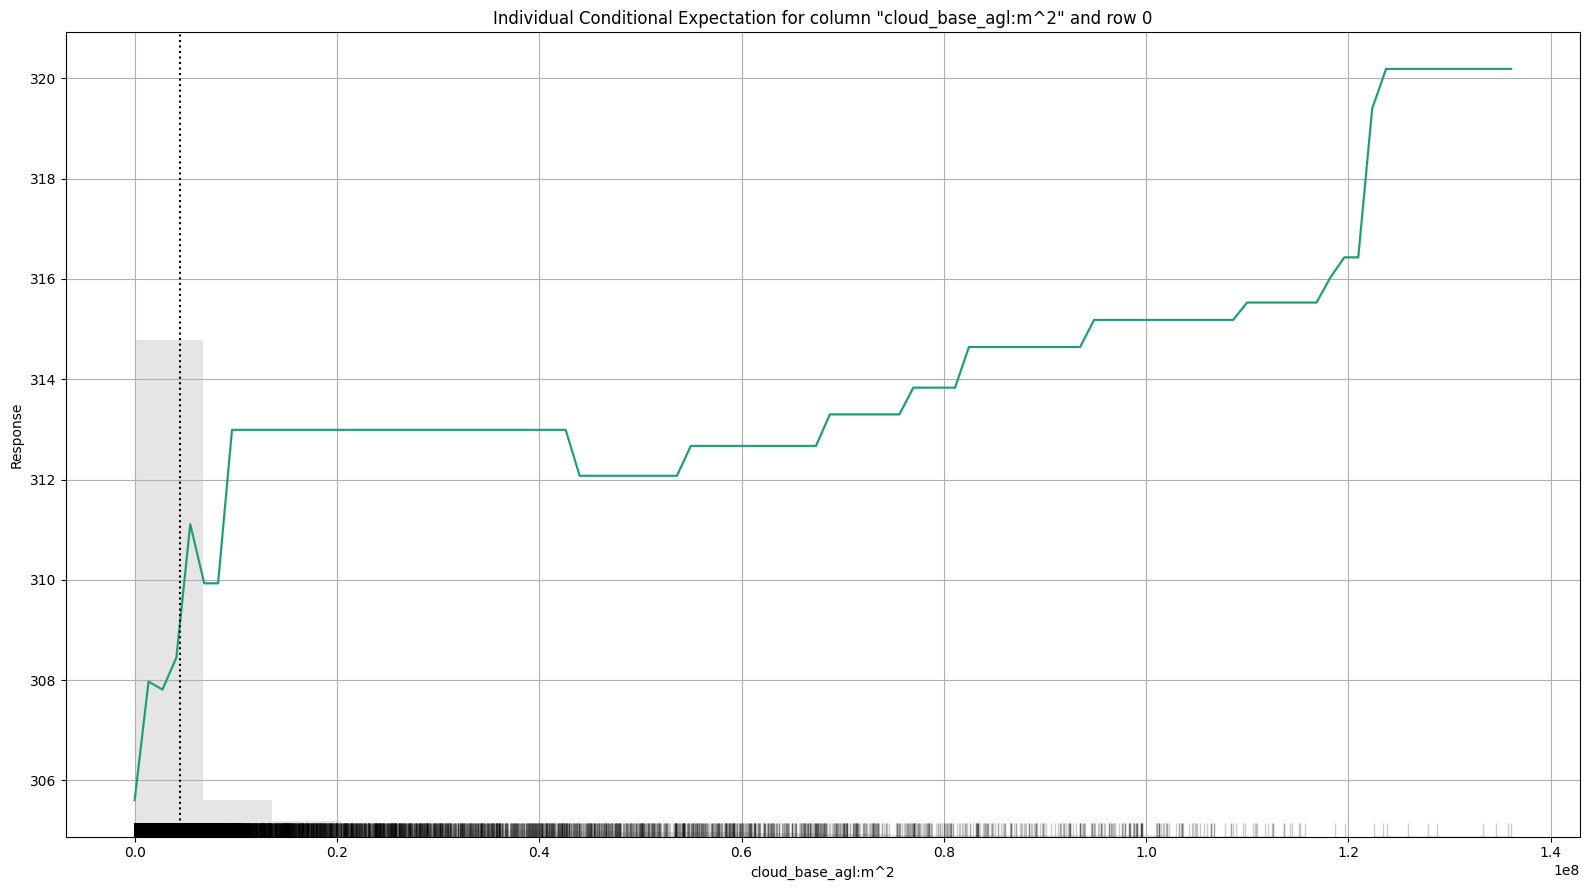

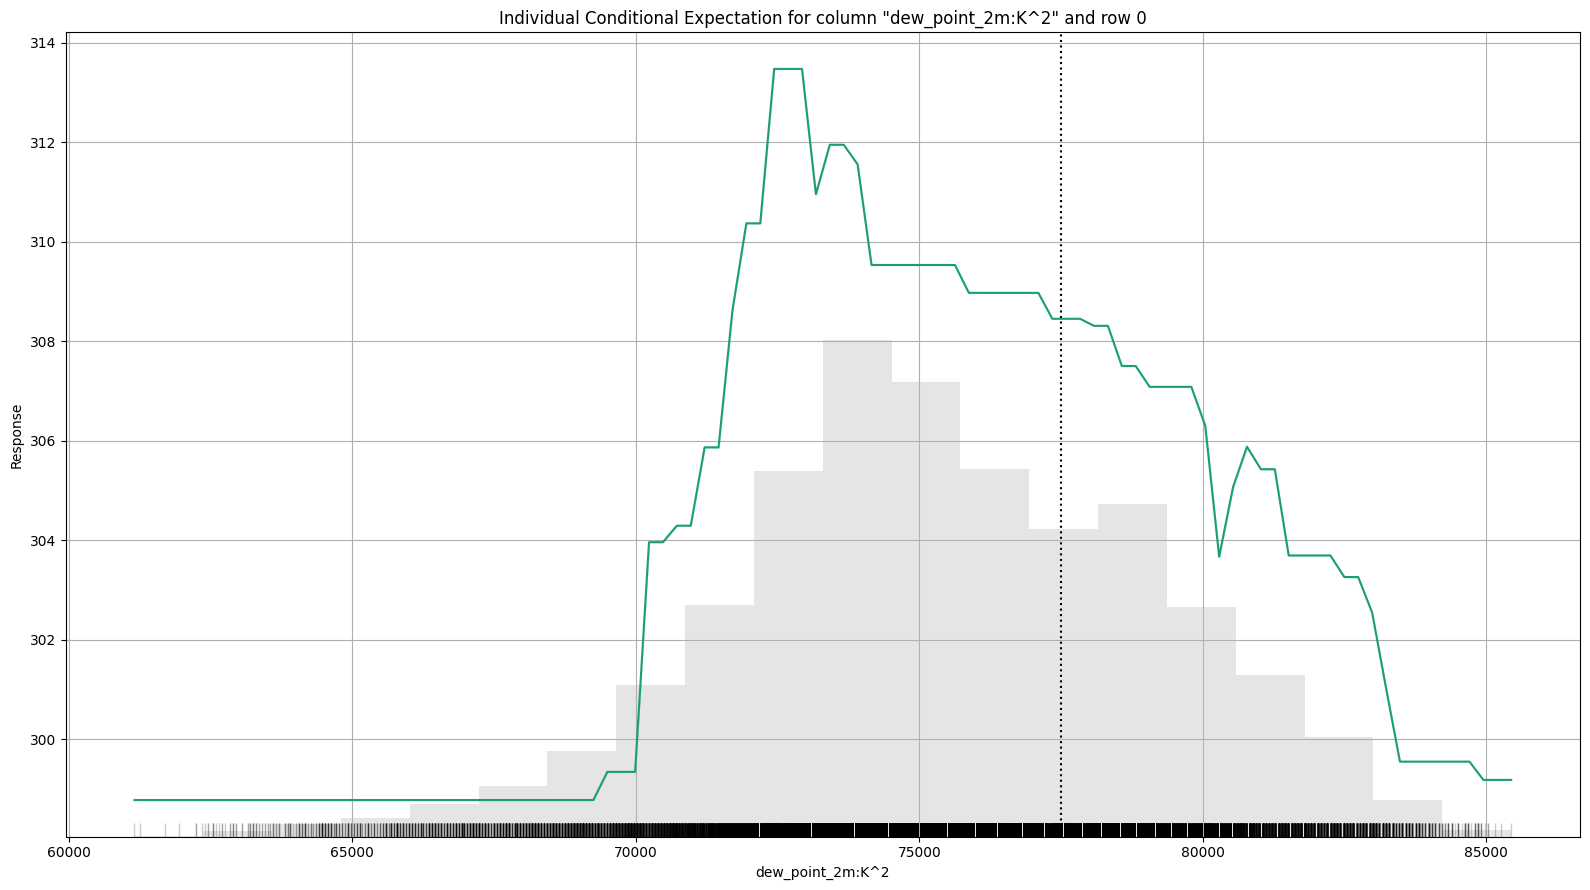

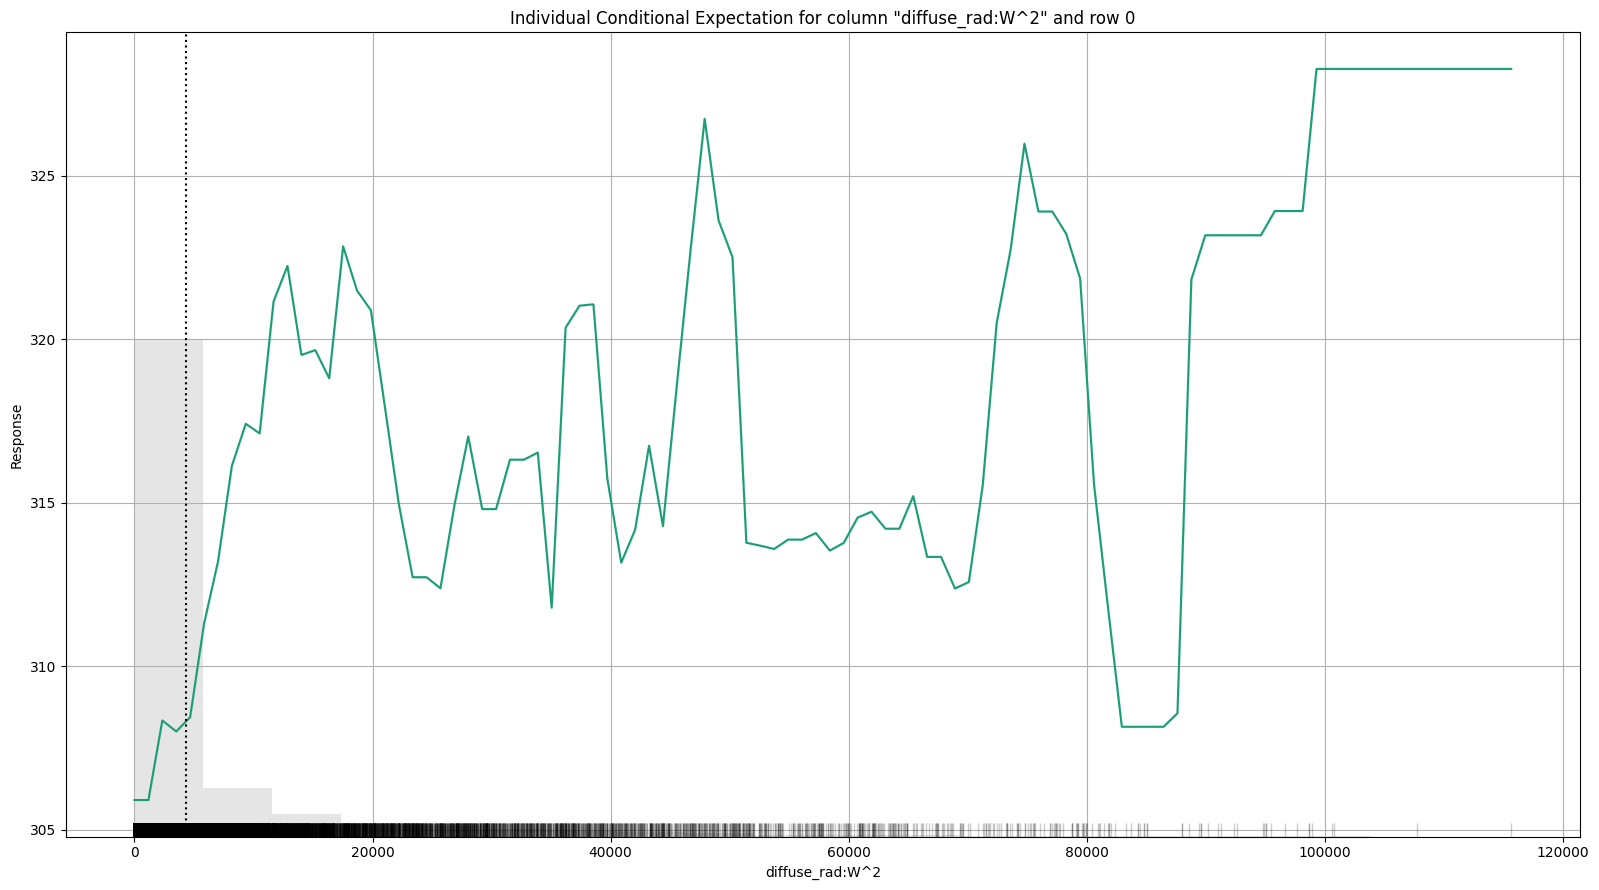

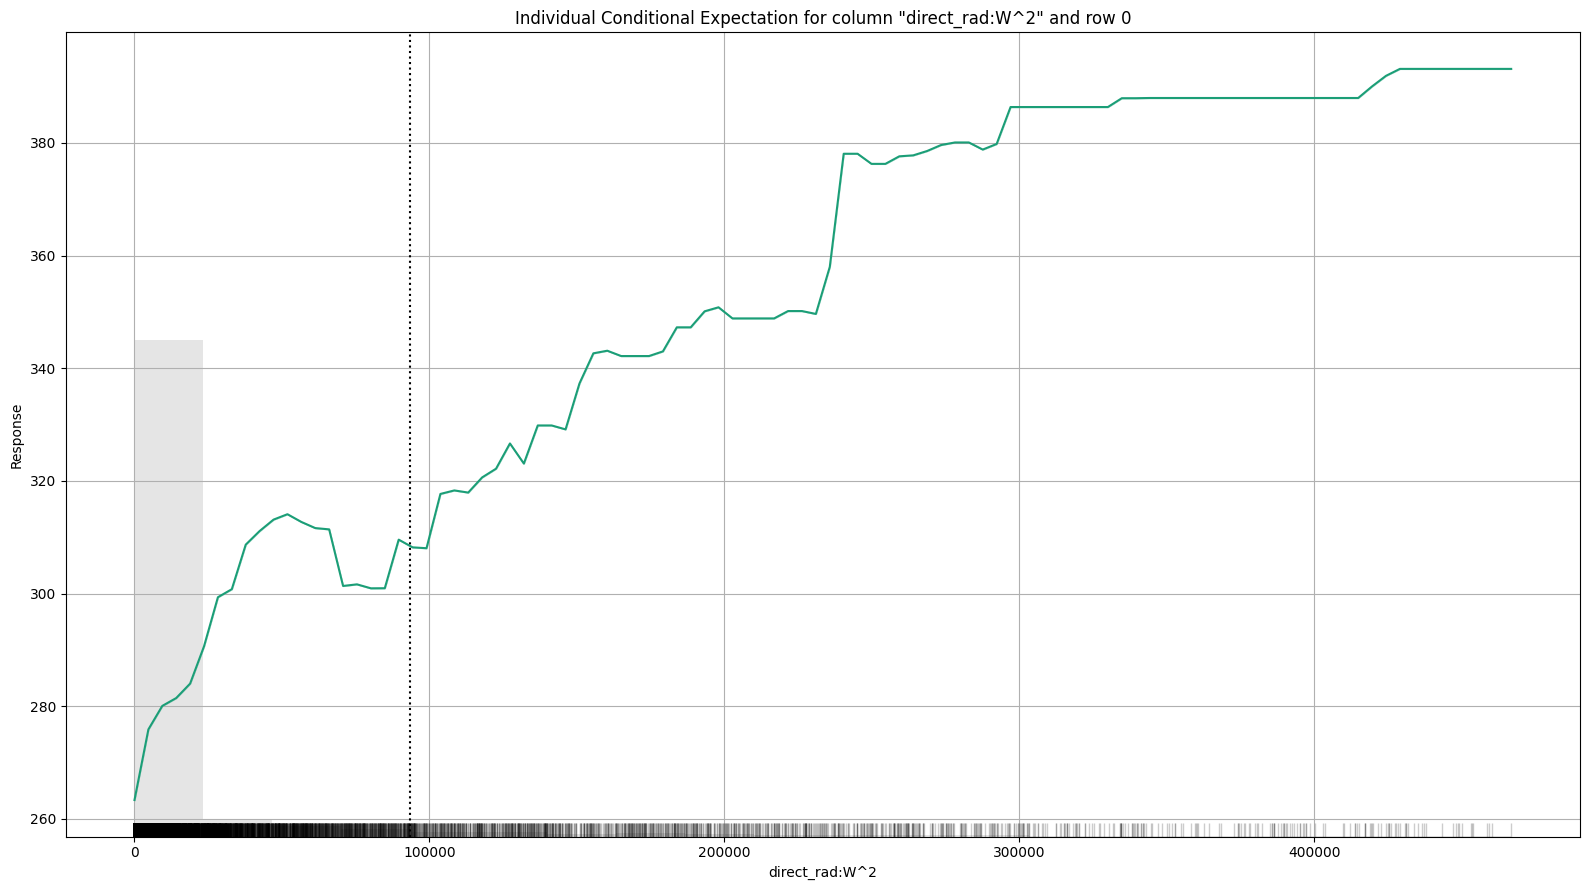

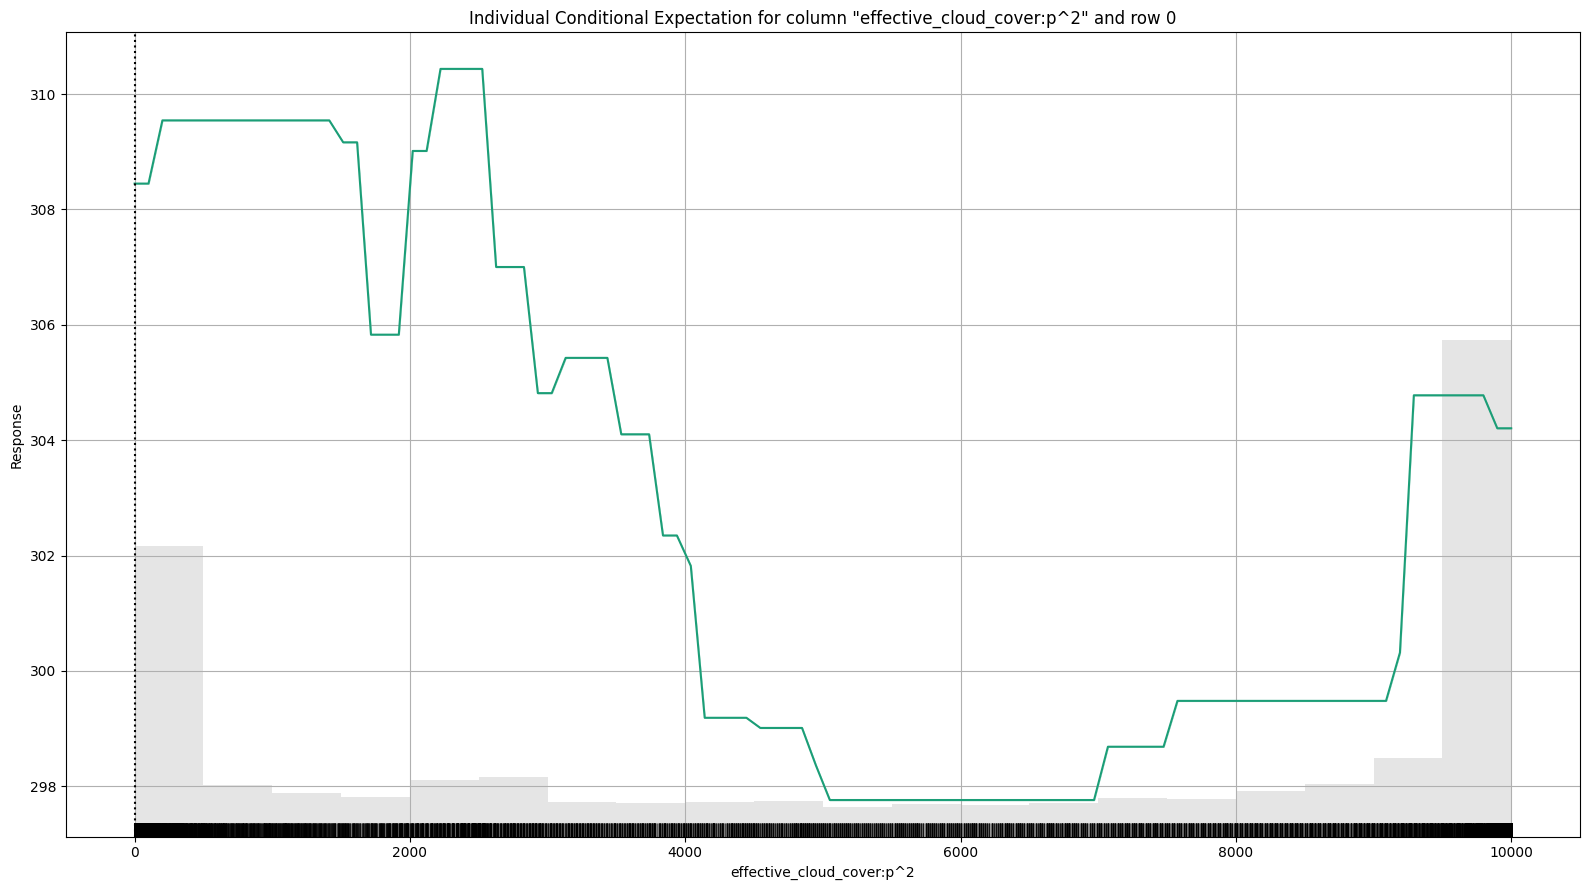

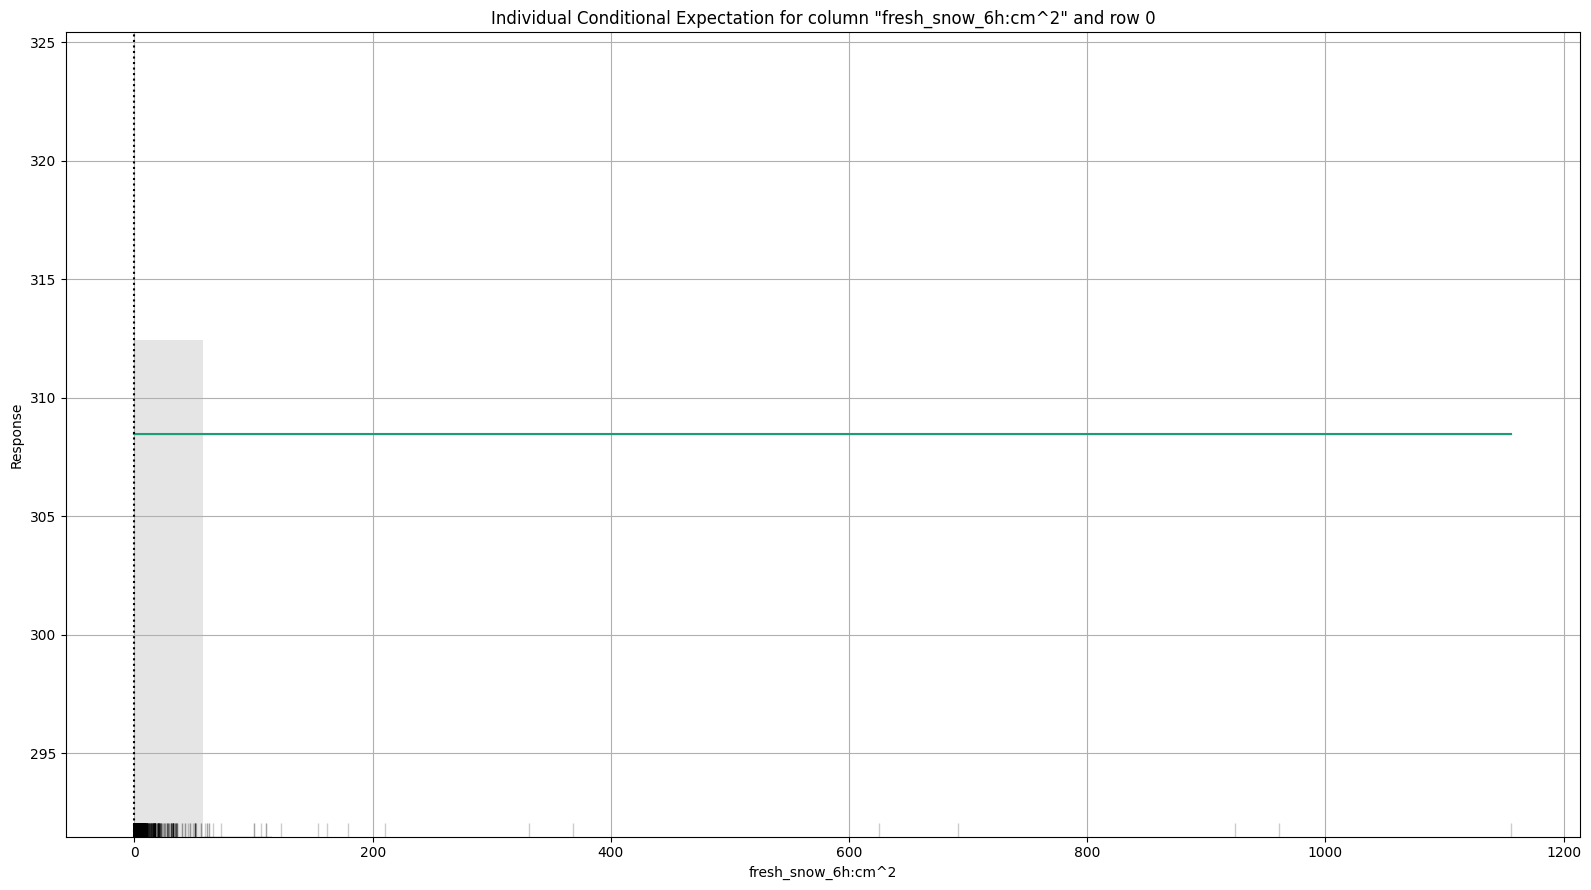

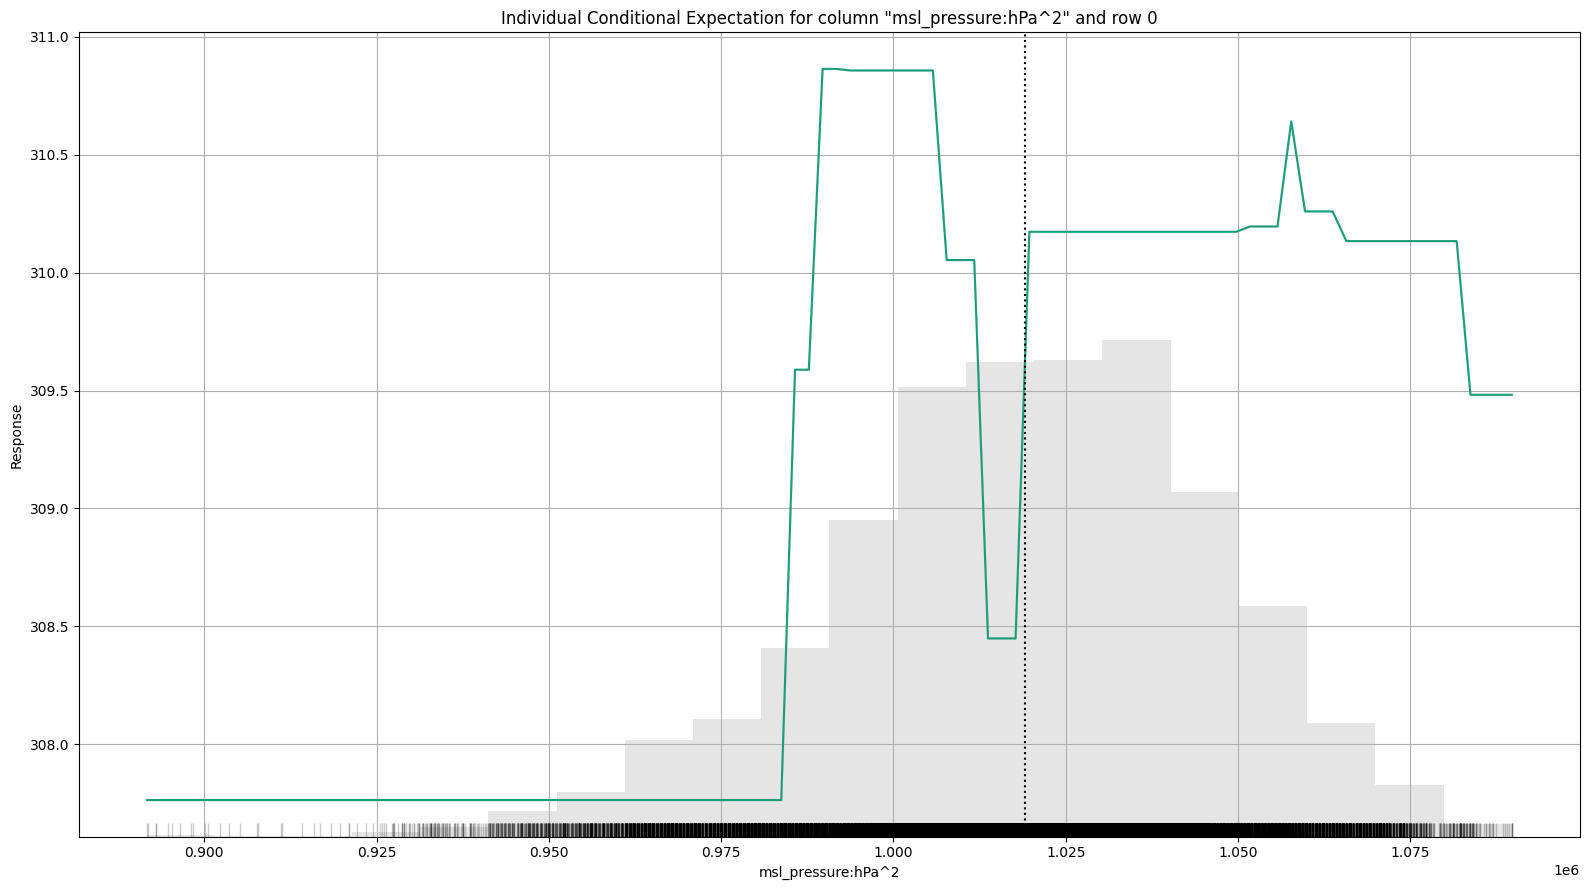

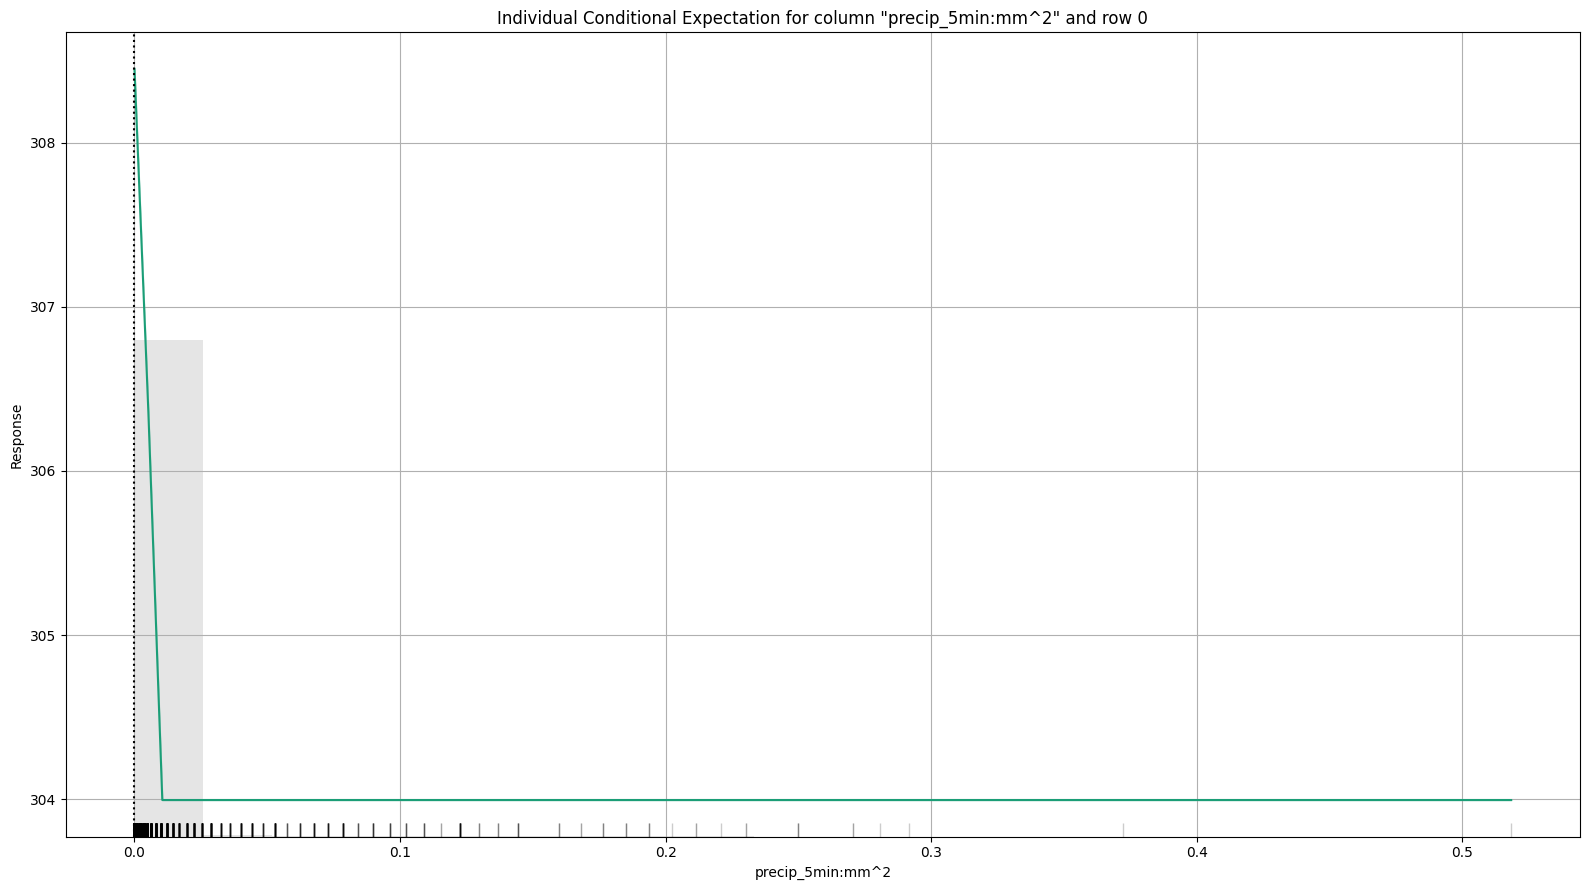

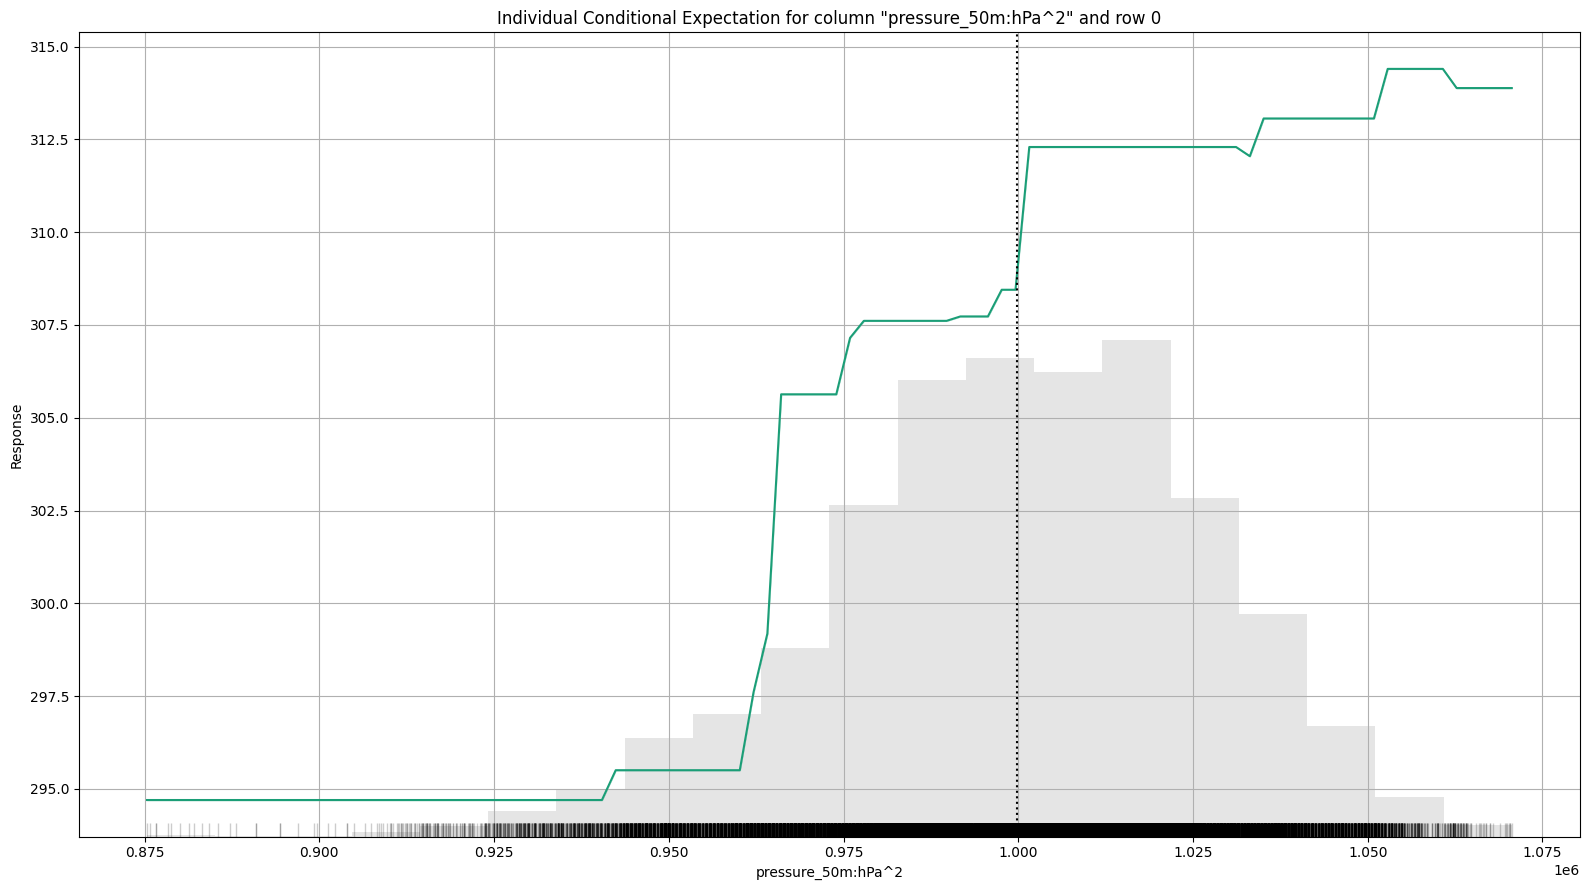

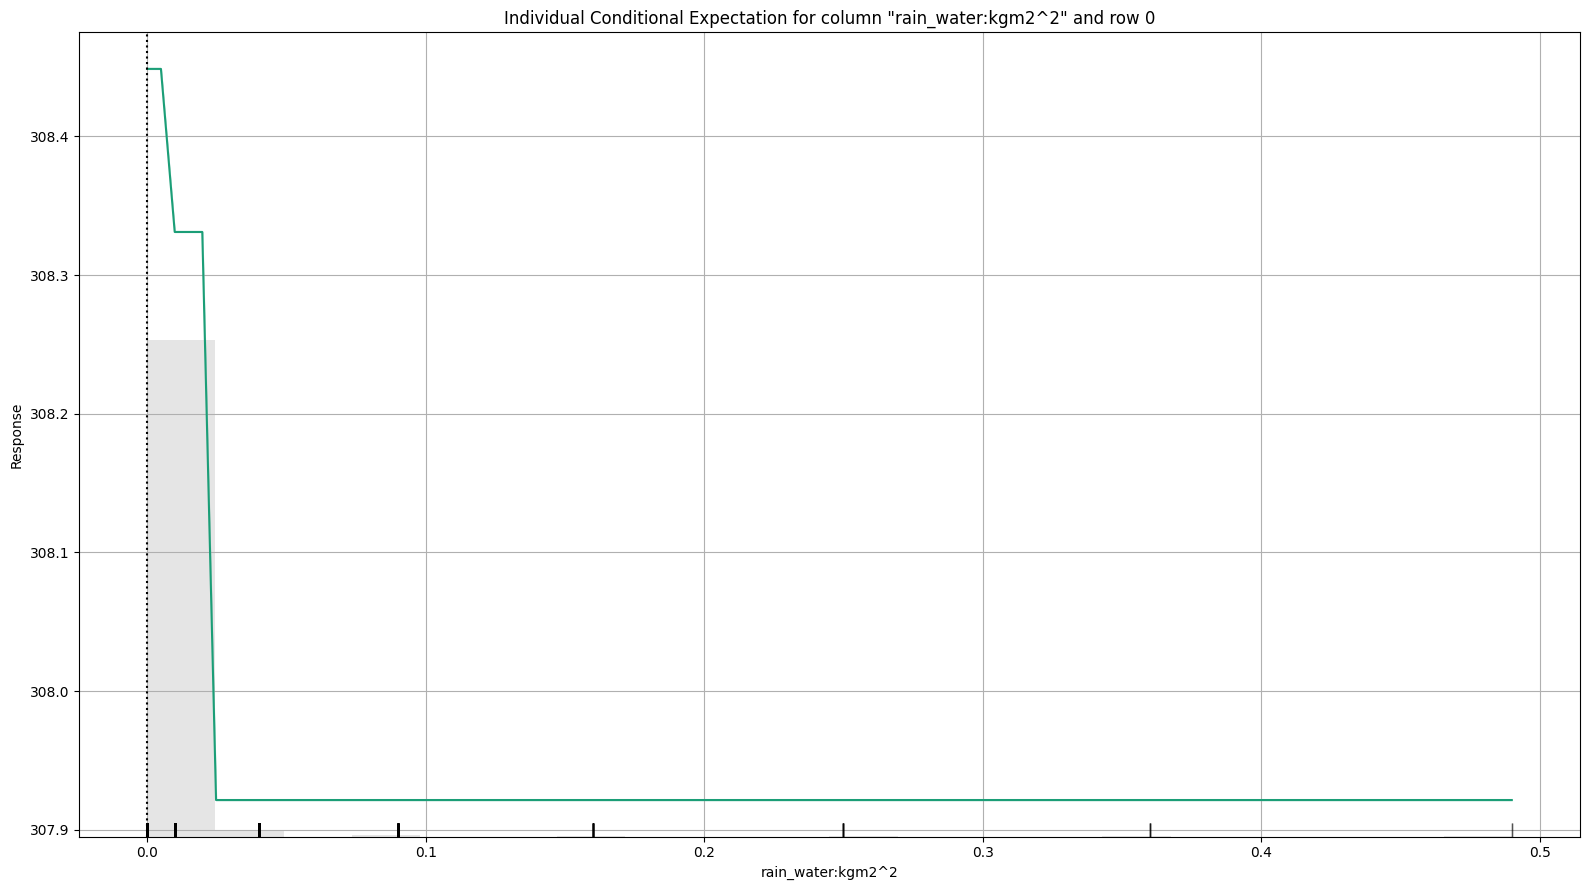

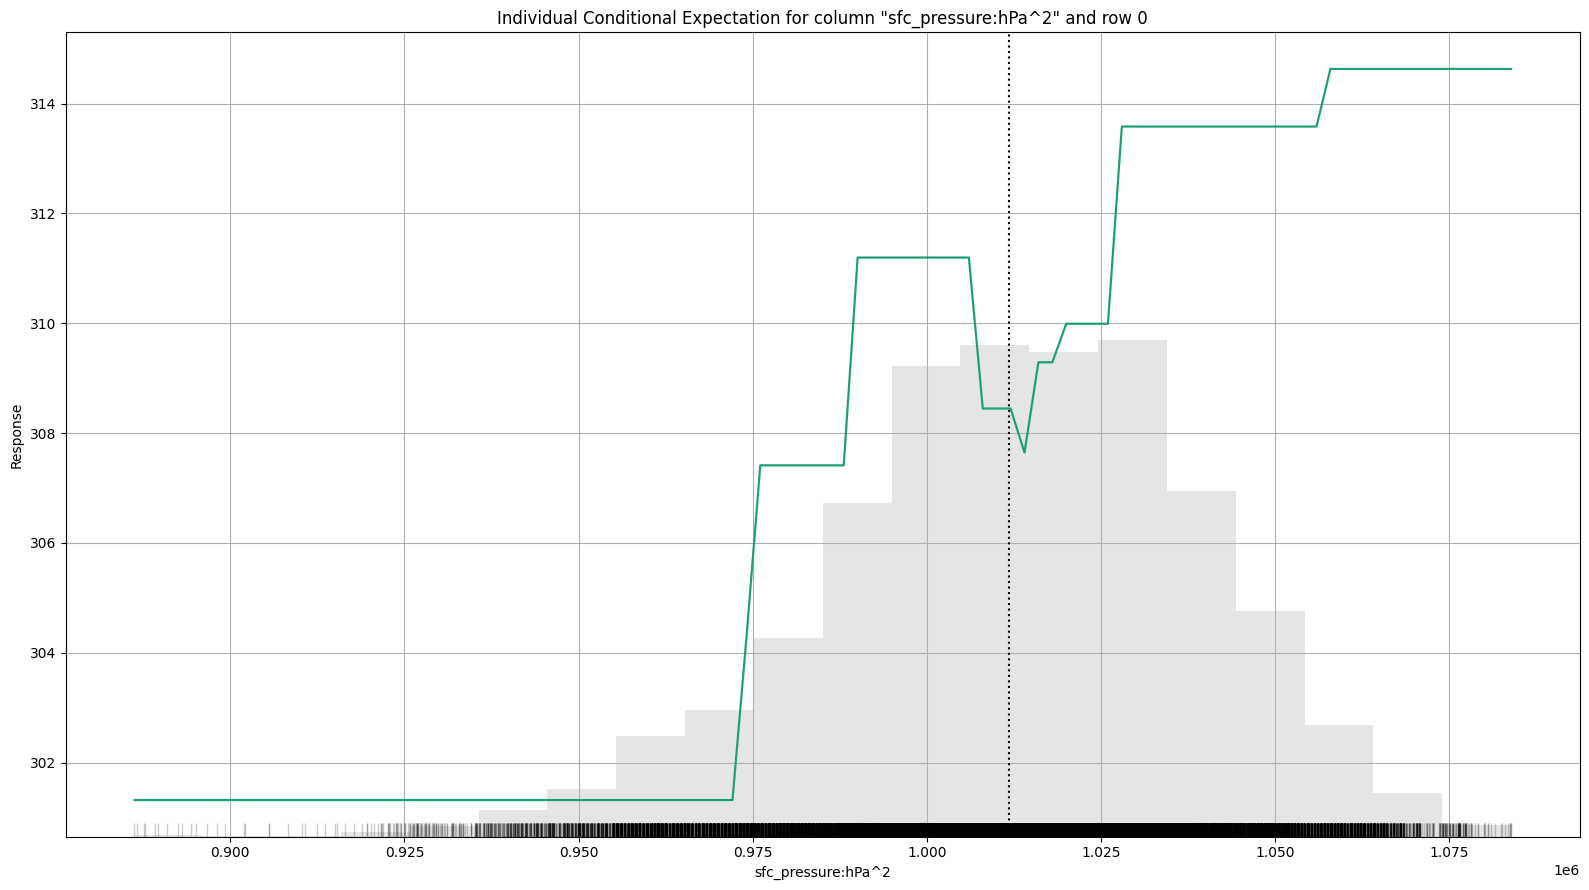

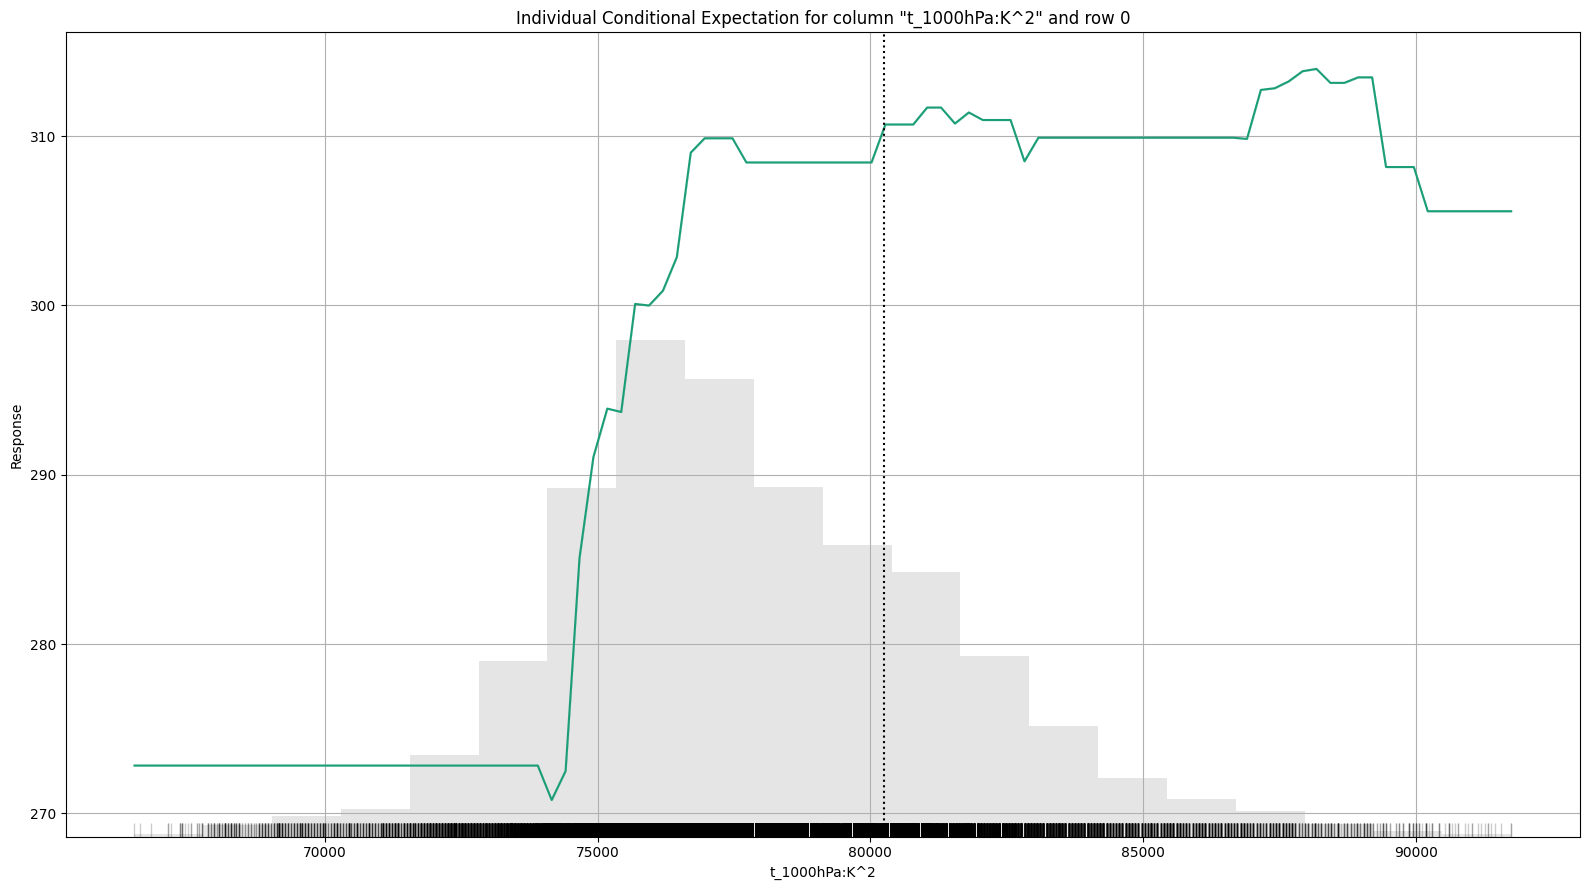

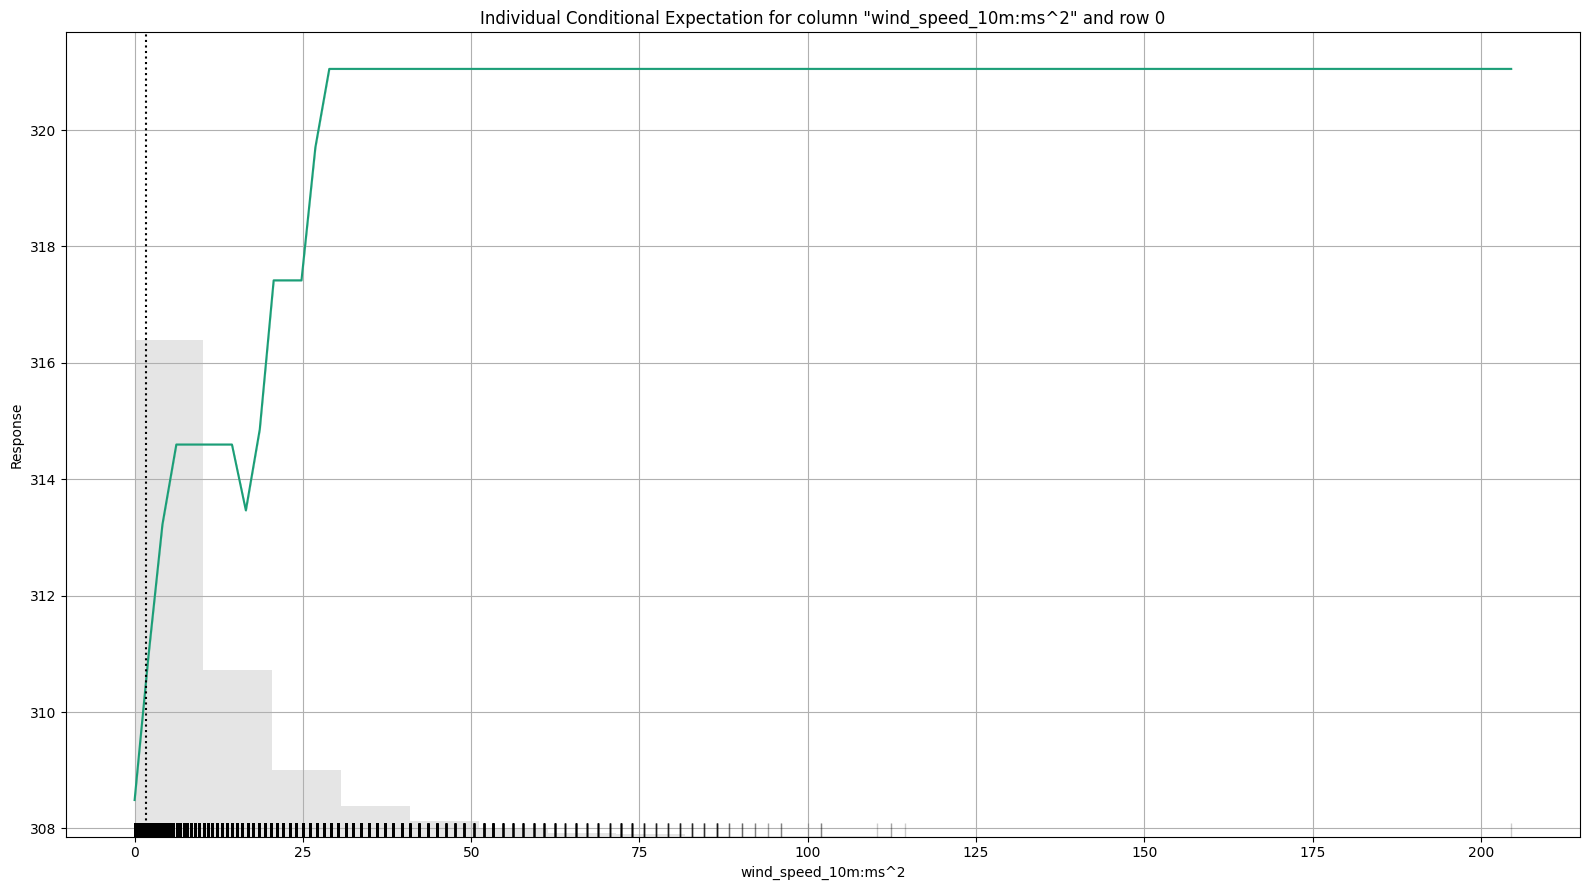

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

In [41]:
aml.leader.explain_row(df_train_c, row_index=0)

# Gather the predictions

In [ ]:
df_pred_total = pd.concat([df_pred_a, df_pred_b, df_pred_c], axis = 0)
df_pred_final = pd.DataFrame({'id' : [i for i in range(2160)], 'prediction' : df_pred_total['prediction'].to_numpy()})
#df_pred_total
df_pred_final[0:1000]

id  prediction
0      0    0.000000
1      1    0.000000
2      2    0.000000
3      3   45.240170
4      4  307.730949
..   ...         ...
995  995  473.915536
996  996  314.140514
997  997  265.527121
998  998  184.088674
999  999  124.858548

[1000 rows x 2 columns]

In [ ]:
df_pred_final.to_csv('submission_23.csv', index=False)

In [ ]:
df_pred_a.to_csv('A.csv')